Data is for three kinds of real state all Located in Riyadh (Region) not city: 

1- Land

2- Villas

3- Apartments

## Land's Dataset Columns and Meaning:

1. **Kind (نوع):** Defines the type whether it's a land / Villa / Apartment **(Categorical Nominal)**
> - Only **Land / أرض** will show in this dataset, since the other two have their own dataset.

2. **Purpose (الغرض):** To live or for commercial use or both? **(Categorical Nominal)**

3. **City (المدينة):** Defines what City the land is located  **(Categorical Nominal)**

> - **Maybe** + Needs a ton of cleaning!

4. **Neighborhood (الحي):** Which Neighborhood the Land is located in. **(Categorical Nominal)**

5. **Frontier (الواجهة):** How many streets does the land face? or which side does it face?  **(Categorical Nominal)**

> - **Maybe**

6. **Area (المساحة):** Area of the land **(Numerical Continuous)**

7. **Price per Meter (السعر بالمتر):** In Riyals **(Numerical Continuous)**

8. **Total Price (السعر الاجمالي):** In Riyals **(Numerical Continuous)**

Villas Columns and meaning: 

In [549]:
%pip install arabic_reshaper python-bidi


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [551]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we will import this library to handle how the arabic characters display 
import arabic_reshaper 
# this function helps us in ordering the text as arabic lan is RTL
from bidi.algorithm import get_display

import matplotlib.ticker as ticker

pd.set_option('display.max_columns', 20)

In [553]:
# for handling arabic text 
def arabic_text(text):
    # reshaping here means that the input text for ex: ة ب ط ر ق will be taken and reshap the characters to be قرطبة
    reshaped_text = arabic_reshaper.reshape(text)
    # and here it will deal with the direction of the displaying arabic text as RTL
    bidi_text = get_display(reshaped_text)
    return bidi_text

In [555]:
df_apartments = pd.read_csv(r"C:\Users\almal\Desktop\Riyadh_Aqqar_Apartments.csv")
df_villas = pd.read_csv(r"C:\Users\almal\Desktop\Riyadh_Aqqar_Villas.csv")
df_land = pd.read_csv(r"C:\Users\almal\Desktop\Riyadh_Aqqar_land.csv")
#df_apartments = pd.read_csv('datasets/Riyadh_Aqqar_Apartments.csv')
#df_villas = pd.read_csv('datasets/Riyadh_Aqqar_Villas.csv')
#df_land = pd.read_csv('datasets/Riyadh_Aqqar_land.csv')

In [557]:
df_apartments.head()

نوع العقار   المدينة           الحي       الواجهة  عدد الغرف  عدد الصالات  \
0        شقة   الرياض      حي المروج         جنوبية          4          1.0   
1        شقة   الرياض      حي العارض   شمالية غربية          3          1.0   
2        شقة   الرياض      حي النرجس            NaN          3          1.0   
3        شقة   الرياض      حي النرجس         شمالية          3          1.0   
4        شقة   الرياض    حي الياسمين          شرقية          4          1.0   

  عدد الحمامات  المساحة  مطبخ  مدخل سيارة  مصعد الدور  عمر العقار  مؤثثة  \
0            3      249     1           0     1     3         0.0      0   
1            3      199     0           0     1  علوي         0.0      0   
2            3      145     1           0     1  أرضي         2.0      0   
3            3      101     1           0     0  أرضي         0.0      1   
4            3      147     1           0     1  علوي         2.0      1   

   السعر الاجمالي  
0         1434000  
1          980000  
2         1050000  
3         1200000  
4         1200000

In [559]:
df_apartments.columns = ['Property_Type', 'City', 'Neighborhood', 'Facade', 'Bedrooms','Living_Rooms',
                          'Baths','Area', 'Kitchen', 'Car_Entrance', 'Elevator', 'Floor', 'Age',
                           'furnished', 'Total_Price']

In [561]:
df_apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Type  551 non-null    object 
 1   City           551 non-null    object 
 2   Neighborhood   551 non-null    object 
 3   Facade         389 non-null    object 
 4   Bedrooms       551 non-null    int64  
 5   Living_Rooms   541 non-null    float64
 6   Baths          551 non-null    object 
 7   Area           551 non-null    int64  
 8   Kitchen        551 non-null    int64  
 9   Car_Entrance   551 non-null    int64  
 10  Elevator       551 non-null    int64  
 11  Floor          477 non-null    object 
 12  Age            550 non-null    float64
 13  furnished      551 non-null    int64  
 14  Total_Price    551 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 64.7+ KB


In [563]:
df_villas.head()

نوع العقار   المدينة         الحي الواجهة عدد الغرف عدد الصالات  \
0       فيلا   الرياض    حي العارض   جنوبية         6           3   
1       فيلا   الرياض    حي العارض   جنوبية         6           4   
2       فيلا   الرياض    حي العارض   جنوبية         3           2   
3       فيلا   الرياض    حي النرجس   جنوبية         4           4   
4       فيلا   الرياض    حي العارض    غربية         4           1   

  عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  غرفة خادمة  غرفة سائق  \
0           5+         NaN    244.0         1     1           1          1   
1           5+         NaN    322.0         1     1           1          1   
2           5+         NaN    350.0         1     0           1          0   
3            4         NaN    350.0         1     1           1          0   
4           5+         NaN    270.0         1     1           1          1   

   ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  السعر الاجمالي  
0     0    1     0    0           1     1         2300000  
1     1    1     0    0           1     1         3000000  
2     1    0     0    1           1     1         2600000  
3     0    1     0    1           1     1         2600000  
4     0    0     0    0           1     0         2800000

In [565]:
df_villas.columns = ['Property_Type', 'City', 'Neighborhood', 'Facade', 'Bedrooms','Living_Rooms',
                          'Baths','street width', 'Area', 'Living_Room_Stairs','Kitchen',
                          "Maid_Room", 'Drivers_Room', 'Annex', 'Yard','Swimming_Pool', 'Basement',                           
                           'Car_Entrance', 'Elevator', 'Total_Price']
                           

In [567]:
df_villas.head()

Property_Type      City Neighborhood  Facade Bedrooms Living_Rooms Baths  \
0          فيلا   الرياض    حي العارض   جنوبية        6            3    5+   
1          فيلا   الرياض    حي العارض   جنوبية        6            4    5+   
2          فيلا   الرياض    حي العارض   جنوبية        3            2    5+   
3          فيلا   الرياض    حي النرجس   جنوبية        4            4     4   
4          فيلا   الرياض    حي العارض    غربية        4            1    5+   

   street width   Area  Living_Room_Stairs  Kitchen  Maid_Room  Drivers_Room  \
0           NaN  244.0                   1        1          1             1   
1           NaN  322.0                   1        1          1             1   
2           NaN  350.0                   1        0          1             0   
3           NaN  350.0                   1        1          1             0   
4           NaN  270.0                   1        1          1             1   

   Annex  Yard  Swimming_Pool  Basement  Car_Entrance  Elevator  Total_Price  
0      0     1              0         0             1         1      2300000  
1      1     1              0         0             1         1      3000000  
2      1     0              0         1             1         1      2600000  
3      0     1              0         1             1         1      2600000  
4      0     0              0         0             1         0      2800000

In [569]:
df_villas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Property_Type       1090 non-null   object 
 1   City                1090 non-null   object 
 2   Neighborhood        1090 non-null   object 
 3   Facade              1059 non-null   object 
 4   Bedrooms            993 non-null    object 
 5   Living_Rooms        967 non-null    object 
 6   Baths               993 non-null    object 
 7   street width        465 non-null    float64
 8   Area                1059 non-null   float64
 9   Living_Room_Stairs  1090 non-null   int64  
 10  Kitchen             1090 non-null   int64  
 11  Maid_Room           1090 non-null   int64  
 12  Drivers_Room        1090 non-null   int64  
 13  Annex               1090 non-null   int64  
 14  Yard                1090 non-null   int64  
 15  Swimming_Pool       1090 non-null   int64  
 16  Baseme

In [571]:
df_land.head()

نوع العقار الغرض              المدينة                الحي     الواجهة  \
0        أرض   NaN   امارة منطقة الرياض             الرياض        غربية   
1        أرض   NaN              الرياض           حي غرناطة       شمالية   
2        أرض  سكني              الرياض           حي غرناطة   ثلاث شوارع   
3        أرض  سكني              الرياض          حي اليرموك   ثلاث شوارع   
4        أرض  سكني              الرياض    حي النسيم الغربي        غربية   

   المساحة  سعر المتر  السعر الإجمالي  
0      375     2900.0         1087500  
1      800     4800.0         3840000  
2     1650     4800.0         7920000  
3     1650     4800.0         7920000  
4      750     3200.0         2400000

In [573]:
df_land.columns = ['Property_Type', 'Purpose', 'City', 'Neighborhood', 'Facade', 
                    'Area', 'Price_per_Meter', 'Total_Price']

In [575]:
df_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Property_Type    2155 non-null   object 
 1   Purpose          2106 non-null   object 
 2   City             2155 non-null   object 
 3   Neighborhood     2155 non-null   object 
 4   Facade           2155 non-null   object 
 5   Area             2155 non-null   int64  
 6   Price_per_Meter  2155 non-null   float64
 7   Total_Price      2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


In [577]:
df_apartments['Property_Type'].value_counts().sort_values(ascending=False)

Property_Type
شقة    551
Name: count, dtype: int64

In [579]:
df_villas['Property_Type'].value_counts().sort_values(ascending=False)

Property_Type
فيلا    1090
Name: count, dtype: int64

In [581]:
df_apartments.head()

Property_Type      City   Neighborhood        Facade  Bedrooms  \
0           شقة   الرياض      حي المروج         جنوبية         4   
1           شقة   الرياض      حي العارض   شمالية غربية         3   
2           شقة   الرياض      حي النرجس            NaN         3   
3           شقة   الرياض      حي النرجس         شمالية         3   
4           شقة   الرياض    حي الياسمين          شرقية         4   

   Living_Rooms Baths  Area  Kitchen  Car_Entrance  Elevator Floor  Age  \
0           1.0     3   249        1             0         1     3  0.0   
1           1.0     3   199        0             0         1  علوي  0.0   
2           1.0     3   145        1             0         1  أرضي  2.0   
3           1.0     3   101        1             0         0  أرضي  0.0   
4           1.0     3   147        1             0         1  علوي  2.0   

   furnished  Total_Price  
0          0      1434000  
1          0       980000  
2          0      1050000  
3          1      1200000  
4          1      1200000

In [583]:
df_villas.head()

Property_Type      City Neighborhood  Facade Bedrooms Living_Rooms Baths  \
0          فيلا   الرياض    حي العارض   جنوبية        6            3    5+   
1          فيلا   الرياض    حي العارض   جنوبية        6            4    5+   
2          فيلا   الرياض    حي العارض   جنوبية        3            2    5+   
3          فيلا   الرياض    حي النرجس   جنوبية        4            4     4   
4          فيلا   الرياض    حي العارض    غربية        4            1    5+   

   street width   Area  Living_Room_Stairs  Kitchen  Maid_Room  Drivers_Room  \
0           NaN  244.0                   1        1          1             1   
1           NaN  322.0                   1        1          1             1   
2           NaN  350.0                   1        0          1             0   
3           NaN  350.0                   1        1          1             0   
4           NaN  270.0                   1        1          1             1   

   Annex  Yard  Swimming_Pool  Basement  Car_Entrance  Elevator  Total_Price  
0      0     1              0         0             1         1      2300000  
1      1     1              0         0             1         1      3000000  
2      1     0              0         1             1         1      2600000  
3      0     1              0         1             1         1      2600000  
4      0     0              0         0             1         0      2800000

In [585]:
df_land.head()

Property_Type Purpose                 City        Neighborhood      Facade  \
0           أرض     NaN   امارة منطقة الرياض             الرياض        غربية   
1           أرض     NaN              الرياض           حي غرناطة       شمالية   
2           أرض    سكني              الرياض           حي غرناطة   ثلاث شوارع   
3           أرض    سكني              الرياض          حي اليرموك   ثلاث شوارع   
4           أرض    سكني              الرياض    حي النسيم الغربي        غربية   

   Area  Price_per_Meter  Total_Price  
0   375           2900.0      1087500  
1   800           4800.0      3840000  
2  1650           4800.0      7920000  
3  1650           4800.0      7920000  
4   750           3200.0      2400000

In [587]:
df_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Property_Type    2155 non-null   object 
 1   Purpose          2106 non-null   object 
 2   City             2155 non-null   object 
 3   Neighborhood     2155 non-null   object 
 4   Facade           2155 non-null   object 
 5   Area             2155 non-null   int64  
 6   Price_per_Meter  2155 non-null   float64
 7   Total_Price      2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


In [589]:
df_land['Property_Type'].value_counts().sort_values(ascending=False)

Property_Type
أرض    2155
Name: count, dtype: int64

In [591]:
df_land['Purpose'].value_counts().sort_values(ascending=False)

Purpose
سكني           1440
تجاري وسكني     462
تجاري           204
Name: count, dtype: int64

In [593]:
df_land[df_land['City'] == '13843']

Property_Type Purpose   City          Neighborhood        Facade  Area  \
194            أرض   تجاري  13843   امارة منطقة الرياض         شمالية   750   
1058           أرض    سكني  13843   امارة منطقة الرياض         شمالية   750   
1059           أرض    سكني  13843   امارة منطقة الرياض         شمالية   750   
1060           أرض    سكني  13843   امارة منطقة الرياض   شمالية شرقية  2237   
1061           أرض    سكني  13843   امارة منطقة الرياض   شمالية غربية  2250   
1062           أرض    سكني  13843   امارة منطقة الرياض   شمالية غربية  2237   
1063           أرض    سكني  13843   امارة منطقة الرياض         شمالية  2250   
1064           أرض    سكني  13843   امارة منطقة الرياض         شمالية  1650   
1065           أرض    سكني  13843   امارة منطقة الرياض          غربية  2250   
1066           أرض    سكني  13843   امارة منطقة الرياض          غربية   900   

      Price_per_Meter  Total_Price  
194             600.0       450000  
1058            600.0       450000  
1059            600.0       450000  
1060            600.0      1342200  
1061            600.0      1350000  
1062            600.0      1342200  
1063            600.0      1350000  
1064           8000.0     13200000  
1065            888.0      1998000  
1066            888.0       799200

### Dania: 

- [ ] Descriptive Analysis 

- [x] 1- Reliability

- [x] 2- Timeliness 

- [x] 3- Consistency 

- [x] 4- Relevance 

In [601]:
# Dania Work: 

## 1- Reliability

In [604]:
# The data is from Kaggle, and there is no specific source. However, since our objective is for learning, we can use it.

## 2- Timeliness

In [607]:
# It is up-to-date since the last update link in kaggle was a year ago.

## 3- Consistency 

In [610]:
df_land.head()

Property_Type Purpose                 City        Neighborhood      Facade  \
0           أرض     NaN   امارة منطقة الرياض             الرياض        غربية   
1           أرض     NaN              الرياض           حي غرناطة       شمالية   
2           أرض    سكني              الرياض           حي غرناطة   ثلاث شوارع   
3           أرض    سكني              الرياض          حي اليرموك   ثلاث شوارع   
4           أرض    سكني              الرياض    حي النسيم الغربي        غربية   

   Area  Price_per_Meter  Total_Price  
0   375           2900.0      1087500  
1   800           4800.0      3840000  
2  1650           4800.0      7920000  
3  1650           4800.0      7920000  
4   750           3200.0      2400000

In [612]:
# here it gave an error so i used apply map:
# the error was: 'DataFrame' object has no attribute 'map'
# write what you did here and why
df_land = df_land.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_villas = df_villas.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_apartments = df_apartments.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\almal\AppData\Local\Temp\ipykernel_6968\3666040981.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_land = df_land.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\almal\AppData\Local\Temp\ipykernel_6968\3666040981.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_villas = df_villas.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\almal\AppData\Local\Temp\ipykernel_6968\3666040981.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_apartments = df_apartments.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [614]:
df_land['City'].value_counts().sort_values(ascending=False)

City
الرياض                1498
امارة منطقة الرياض     332
حريملاء                252
الدرعية                 28
13843                   10
حي عريض                  8
رماح                     5
الجبيلة                  3
                         3
حي الرمال                3
حي قرطبة                 2
العيينة                  2
ضرما                     2
حي المهدية               2
حي ظهرة لبن              1
حي العارض                1
حي السلي                 1
حي القيروان              1
الخرج                    1
Name: count, dtype: int64

In [616]:
# 
df_land['Neighborhood'].replace('طريق سعيد ابن زيد', 'حي قرطبة', inplace=True)
df_land.loc[df_land['City'] == "حي قرطبة", 'City'] = "الرياض"

df_land['Neighborhood'].replace('شارع سعيد بن عبدالله باقشير',
                                                  'حي المهدية', inplace=True)
df_land.loc[df_land['City'] == 'حي المهدية', 'City'] = "الرياض"

C:\Users\almal\AppData\Local\Temp\ipykernel_6968\3631001077.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_land['Neighborhood'].replace('طريق سعيد ابن زيد', 'حي قرطبة', inplace=True)
C:\Users\almal\AppData\Local\Temp\ipykernel_6968\3631001077.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [618]:
df_land.loc[df_land['City'] == "حي الرمال", 'Neighborhood'] = "حي الرمال"
df_land.loc[df_land['City'] == "حي الرمال", 'City'] = "الرياض"

df_land.loc[df_land['City'] == "حي ظهرة لبن", 'Neighborhood'] = "حي ظهرة لبن"
df_land.loc[df_land['City'] == "حي ظهرة لبن", 'City'] = "الرياض"

df_land.loc[df_land['City'] == "حي العارض", 'Neighborhood'] = "حي العارض"
df_land.loc[df_land['City'] == "حي العارض", 'City'] = "الرياض"

df_land.loc[df_land['City'] == "حي السلي", 'Neighborhood'] = "حي السلي"
df_land.loc[df_land['City'] == "حي السلي", 'City'] = "الرياض"

df_land.loc[df_land['City'] == "حي القيروان", 'Neighborhood'] = "حي القيروان"
df_land.loc[df_land['City'] == "حي القيروان", 'City'] = "الرياض"

df_land.loc[df_land['City'] == 'حي عريض', 'Neighborhood'] = 'حي عريض'
df_land.loc[df_land['City'] == 'حي عريض', 'City'] = "الرياض"

df_land['City'].value_counts().sort_values(ascending=False)

City
الرياض                1517
امارة منطقة الرياض     332
حريملاء                252
الدرعية                 28
13843                   10
رماح                     5
الجبيلة                  3
                         3
العيينة                  2
ضرما                     2
الخرج                    1
Name: count, dtype: int64

In [620]:
df_villas['City'].value_counts().sort_values(ascending=False)

City
الرياض                 972
امارة منطقة الرياض      93
الدرعية                 13
حي قرطبة                 5
حي العريجاء الغربية      3
حي الازدهار              2
حريملاء                  1
حي النخيل                1
Name: count, dtype: int64

In [622]:
# 
df_villas.loc[df_villas['City'] == 'حي قرطبة', 'Neighborhood'] = 'حي قرطبة'
df_villas.loc[df_villas['City'] == 'حي قرطبة', 'City'] = "الرياض"

df_villas.loc[df_villas['City'] == 'حي الازدهار', 'Neighborhood'] = 'حي الازدهار'
df_villas.loc[df_villas['City'] == 'حي الازدهار', 'City'] = "الرياض"

df_villas.loc[df_villas['City'] == 'حي النخيل', 'Neighborhood'] = 'حي النخيل'
df_villas.loc[df_villas['City'] == 'حي النخيل', 'City'] = "الرياض"

df_villas.loc[df_villas['City'] == 'حي العريجاء الغربية', 'Neighborhood'] = 'حي العريجاء الغربية'
df_villas.loc[df_villas['City'] == 'حي العريجاء الغربية', 'City'] = "الرياض"

df_villas['City'].value_counts().sort_values(ascending=False)

City
الرياض                983
امارة منطقة الرياض     93
الدرعية                13
حريملاء                 1
Name: count, dtype: int64

In [624]:
df_villas[df_villas["Neighborhood"] == "حي الملقا7541"]

Property_Type    City   Neighborhood  Facade Bedrooms Living_Rooms Baths  \
180          فيلا  الرياض  حي الملقا7541  شمالية        3            1     3   

     street width   Area  Living_Room_Stairs  Kitchen  Maid_Room  \
180          21.0  252.0                   1        1          0   

     Drivers_Room  Annex  Yard  Swimming_Pool  Basement  Car_Entrance  \
180             0      0     0              0         0             0   

     Elevator  Total_Price  
180         1      3200000

In [626]:
# 
df_villas.loc[df_villas['Neighborhood'] == "حي الملقا7541", 'Neighborhood'] = "حي الملقا"

In [628]:
df_apartments['City'].value_counts().sort_values(ascending=False)

City
الرياض                478
منطقة الرياض           44
امارة منطقة الرياض     28
حي العارض               1
Name: count, dtype: int64

In [630]:
# 
df_apartments .loc[df_apartments ['City'] == "حي العارض", 'Neighborhood'] = "حي العارض"
df_apartments .loc[df_apartments ['City'] == "حي العارض", 'City'] = "الرياض"
df_apartments['City'].value_counts().sort_values(ascending=False)

City
الرياض                479
منطقة الرياض           44
امارة منطقة الرياض     28
Name: count, dtype: int64

## 4- Relevance 

In [633]:
# The available data is consistent with the objectives of the analysis 
# All columns is useful and relevant to our analysis except one column.

In [635]:
# write what you did here and why
df_apartments.drop('Property_Type', axis=1, inplace=True)
df_land.drop('Property_Type', axis=1, inplace=True)
df_villas.drop('Property_Type', axis=1, inplace=True)

In [637]:
df_apartments.head()

City Neighborhood        Facade  Bedrooms  Living_Rooms Baths  Area  \
0  الرياض    حي المروج        جنوبية         4           1.0     3   249   
1  الرياض    حي العارض  شمالية غربية         3           1.0     3   199   
2  الرياض    حي النرجس           NaN         3           1.0     3   145   
3  الرياض    حي النرجس        شمالية         3           1.0     3   101   
4  الرياض  حي الياسمين         شرقية         4           1.0     3   147   

   Kitchen  Car_Entrance  Elevator Floor  Age  furnished  Total_Price  
0        1             0         1     3  0.0          0      1434000  
1        0             0         1  علوي  0.0          0       980000  
2        1             0         1  أرضي  2.0          0      1050000  
3        1             0         0  أرضي  0.0          1      1200000  
4        1             0         1  علوي  2.0          1      1200000

### Fahad + Faisal: Land

- [x] 5- Completeness

- [x] 6- Uniqueness 

- [x] 7- Accuracy 

## Starting with df_land: 

## TODO: 

- [ ] Find outliers in: Total Price

- [ ] Find outliers in: Price per Meter

- [ ] Find outliers in: Area

- [x] Change the City column with the Neighborhood thingy

## df_land dataset:


In [650]:
df_land.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Purpose          2106 non-null   object 
 1   City             2155 non-null   object 
 2   Neighborhood     2155 non-null   object 
 3   Facade           2155 non-null   object 
 4   Area             2155 non-null   int64  
 5   Price_per_Meter  2155 non-null   float64
 6   Total_Price      2155 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 118.0+ KB


In [652]:
df_land['Total_Price'] = df_land['Total_Price'].astype(float)

In [654]:
df_land.describe()

Area  Price_per_Meter   Total_Price
count    2155.000000      2155.000000  2.155000e+03
mean     1568.780510      4356.648574  5.050271e+06
std      9757.996967     35214.809640  3.141799e+07
min         1.000000        90.000000  1.400000e+03
25%       413.000000      1365.000000  7.810000e+05
50%       670.000000      2570.000000  1.442000e+06
75%       900.000000      4000.000000  3.150000e+06
max    299684.000000    945000.000000  8.930250e+08

In [656]:
df_land.isna().sum()

Purpose            49
City                0
Neighborhood        0
Facade              0
Area                0
Price_per_Meter     0
Total_Price         0
dtype: int64

In [658]:
df_land[df_land.isna().any(axis=1)] 

Purpose                City      Neighborhood        Facade   Area  \
0        NaN  امارة منطقة الرياض            الرياض         غربية    375   
1        NaN              الرياض         حي غرناطة        شمالية    800   
319      NaN              الرياض       حي القادسية         شرقية    543   
320      NaN              الرياض         حي العارض        جنوبية    432   
321      NaN              الرياض         حي العارض        جنوبية    747   
322      NaN  امارة منطقة الرياض            الرياض        جنوبية    255   
323      NaN  امارة منطقة الرياض            الرياض        شمالية    864   
324      NaN              الرياض         حي النرجس        جنوبية    432   
325      NaN  امارة منطقة الرياض            الرياض         غربية    824   
326      NaN             الدرعية           العيينة        جنوبية    937   
327      NaN  امارة منطقة الرياض            الرياض        جنوبية    750   
328      NaN              الرياض        حي الجزيرة        شمالية    240   
329      NaN             حريملاء            الرياض         شرقية    435   
330      NaN  امارة منطقة الرياض            الرياض  جنوبية غربية    900   
331      NaN              الرياض        حي الجزيرة        شمالية    240   
332      NaN              الرياض        حي الجزيرة        شمالية    240   
333      NaN              الرياض        حي الجزيرة         شرقية    900   
334      NaN              الرياض        حي الشهداء         شرقية    312   
335      NaN              الرياض         حي الملقا         غربية    900   
336      NaN              الرياض         حي النرجس        جنوبية    450   
337      NaN              الرياض       حي الغنامية    ثلاث شوارع   3660   
338      NaN              الرياض         حي النرجس    ثلاث شوارع   3660   
339      NaN              الرياض      حي خشم العان        شمالية    750   
340      NaN              الرياض           حي عرقة         غربية    653   
341      NaN              الرياض        حي المهدية    ثلاث شوارع    450   
342      NaN              الرياض           حي عرقة         غربية    653   
343      NaN              الرياض  حي الدار البيضاء         شرقية   1119   
344      NaN             حريملاء            الرياض        شمالية    375   
345      NaN             حريملاء            الرياض  شمالية غربية   7500   
346      NaN              الرياض      حي المعيزيلة        شمالية   4000   
347      NaN              الرياض        حي المهدية        شمالية    810   
348      NaN              الرياض         حي سلطانة        جنوبية    337   
349      NaN              الرياض       حي المونسية  جنوبية شرقية    252   
350      NaN  امارة منطقة الرياض            الرياض         غربية  23059   
351      NaN              الرياض         حي النهضة        جنوبية    412   
352      NaN              الرياض          حي الندى        جنوبية    412   
353      NaN              الرياض         حي النرجس        شمالية   3493   
354      NaN              الرياض         حي النرجس         شرقية    500   
659      NaN  امارة منطقة الرياض            الرياض        شمالية   1672   
660      NaN              الرياض         حي النرجس  جنوبية غربية   1000   
661      NaN              الرياض        حي المهدية    ثلاث شوارع    450   
662      NaN              الرياض         حي النرجس         غربية    399   
663      NaN              الرياض         حي النرجس         شرقية    160   
1003     NaN              الرياض        ضاحية نمار        شمالية   1993   
1004     NaN              الرياض          حي الهدا         غربية    856   
1005     NaN              الرياض          حي الهدا  شمالية شرقية   2033   
1006     NaN              الرياض         حي النرجس  شمالية شرقية   2033   
1007     NaN              الرياض        ضاحية نمار         غربية   2025   
1008     NaN              الرياض         حي النرجس         شرقية    520   

      Price_per_Meter  Total_Price  
0              2900.0    1087500.0  
1              4800.0    3840000.0  
319            2650.0    1438950.0  
320            2650.0    1144800.0  
321            2650.0    1979550.0  
322            1500.0     382500

In [660]:
df_land['Purpose'].value_counts()

Purpose
سكني           1440
تجاري وسكني     462
تجاري           204
Name: count, dtype: int64

In [662]:
# I think we can fill the missing values with the mode:
# since there's not much missing values

purpose_mode = df_land['Purpose'].mode()[0]
df_land['Purpose'].fillna(purpose_mode, inplace=True)
df_land.isna().sum()

C:\Users\almal\AppData\Local\Temp\ipykernel_6968\752729814.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_land['Purpose'].fillna(purpose_mode, inplace=True)


Purpose            0
City               0
Neighborhood       0
Facade             0
Area               0
Price_per_Meter    0
Total_Price        0
dtype: int64

In [664]:
df_land.duplicated().sum()

264

In [666]:
# I don't think checking duplicates is necessary; since someone can divide a land 
# into multiple parts with the same characteristics.
df_land[df_land.duplicated()]

Purpose                City Neighborhood      Facade  Area  \
13    تجاري وسكني              الرياض   حي اليرموك      جنوبية  1089   
19    تجاري وسكني              الرياض   حي اليرموك      جنوبية  1089   
34           سكني  امارة منطقة الرياض       الرياض      جنوبية   300   
44           سكني              الرياض    حي الخليج      شمالية   300   
50           سكني              الرياض   حي الحمراء      جنوبية  1000   
...           ...                 ...          ...         ...   ...   
2063         سكني              الرياض       الرياض       شرقية  2450   
2096         سكني              الرياض    حي الروضة      جنوبية   627   
2116         سكني              الرياض    حي العارض  ثلاث شوارع  5450   
2125        تجاري              الرياض   حي المهدية      جنوبية   900   
2140         سكني             حريملاء       الرياض       غربية   750   

      Price_per_Meter  Total_Price  
13             3300.0    3593700.0  
19             3200.0    3484800.0  
34             1950.0     585000.0  
44             2600.0     780000.0  
50             6000.0    6000000.0  
...               ...          ...  
2063           2400.0    5880000.0  
2096           4200.0    2633400.0  
2116           4600.0   25070000.0  
2125           7600.0    6840000.0  
2140           2000.0    1500000.0  

[264 rows x 7 columns]

In [668]:
df_land

Purpose                City         Neighborhood        Facade  \
0            سكني  امارة منطقة الرياض               الرياض         غربية   
1            سكني              الرياض            حي غرناطة        شمالية   
2            سكني              الرياض            حي غرناطة    ثلاث شوارع   
3            سكني              الرياض           حي اليرموك    ثلاث شوارع   
4            سكني              الرياض     حي النسيم الغربي         غربية   
...           ...                 ...                  ...           ...   
2150        تجاري  امارة منطقة الرياض               الرياض        جنوبية   
2151         سكني              الرياض  حي العريجاء الغربية        جنوبية   
2152  تجاري وسكني              الرياض          حي ظهرة لبن  جنوبية غربية   
2153  تجاري وسكني              الرياض   حي العريجاء الغربي         غربية   
2154         سكني              الرياض   حي العريجاء الغربي        جنوبية   

      Area  Price_per_Meter  Total_Price  
0      375           2900.0    1087500.0  
1      800           4800.0    3840000.0  
2     1650           4800.0    7920000.0  
3     1650           4800.0    7920000.0  
4      750           3200.0    2400000.0  
...    ...              ...          ...  
2150  2000           3500.0    7000000.0  
2151   400           1500.0     600000.0  
2152  1050           2380.0    2499000.0  
2153   313           2000.0     626000.0  
2154   472           1695.0     800040.0  

[2155 rows x 7 columns]

In [670]:
df_land['City'].value_counts().sort_values()

City
الخرج                    1
العيينة                  2
ضرما                     2
الجبيلة                  3
                         3
رماح                     5
13843                   10
الدرعية                 28
حريملاء                252
امارة منطقة الرياض     332
الرياض                1517
Name: count, dtype: int64

In [672]:
df_land.columns

Index(['Purpose', 'City', 'Neighborhood', 'Facade', 'Area', 'Price_per_Meter',
       'Total_Price'],
      dtype='object')

In [674]:
df_land = df_land[df_land['City'] == 'الرياض']

In [676]:
def hist(df, column_name, num_bins = 30):
    # Plot histogram
    plt.figure(figsize=(10, 6))
    df[column_name].hist(bins=num_bins, edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

# Outliers
After Deleting 14 Rows from the original dataframe we can see that the distribution is much clearer and we have a better understanding of the data itself and how its behaviour presents itself. 

We decided to remove the Prices that are greater than 10M Riyals and the areas that are greater than 2000 squared Meter.

(array([1.513e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.4000000e+03, 8.5051260e+07, 1.7010112e+08, 2.5515098e+08,
        3.4020084e+08, 4.2525070e+08, 5.1030056e+08, 5.9535042e+08,
        6.8040028e+08, 7.6545014e+08, 8.5050000e+08]),
 <BarContainer object of 10 artists>)

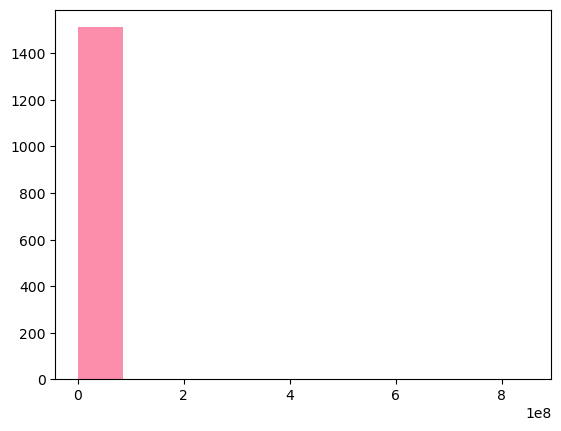

In [679]:
# outliers check: 
#
plt.hist(df_land['Total_Price'], color='#fc8eac')

(array([1.516e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([9.00000e+01, 9.45810e+04, 1.89072e+05, 2.83563e+05, 3.78054e+05,
        4.72545e+05, 5.67036e+05, 6.61527e+05, 7.56018e+05, 8.50509e+05,
        9.45000e+05]),
 <BarContainer object of 10 artists>)

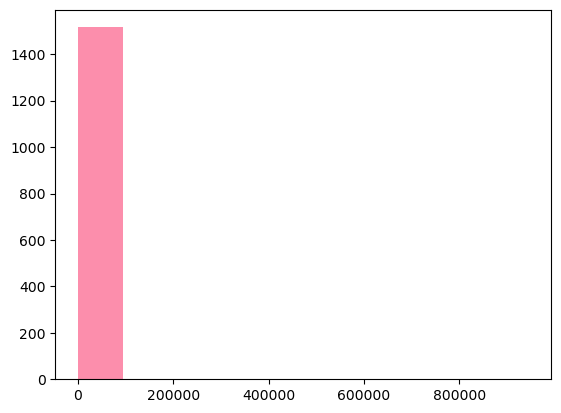

In [681]:
# outliers check: 
# 
plt.hist(df_land['Price_per_Meter'], color='#fc8eac')

In [683]:
# outliers check: 
# 
plt.hist(df_land['Area'], bins=10, color='#fc8eac')

(array([1.511e+03, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([1.000000e+00, 2.996930e+04, 5.993760e+04, 8.990590e+04,
        1.198742e+05, 1.498425e+05, 1.798108e+05, 2.097791e+05,
        2.397474e+05, 2.697157e+05, 2.996840e+05]),
 <BarContainer object of 10 artists>)

In [685]:
df_land_less_20m = df_land[(df_land['Total_Price'] < 200000000) & (df_land['Total_Price'] > 50000)]

(array([1.379e+03, 6.300e+01, 3.500e+01, 6.000e+00, 1.600e+01, 2.000e+00,
        4.000e+00, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([9.360000e+04, 9.759740e+06, 1.942588e+07, 2.909202e+07,
        3.875816e+07, 4.842430e+07, 5.809044e+07, 6.775658e+07,
        7.742272e+07, 8.708886e+07, 9.675500e+07]),
 <BarContainer object of 10 artists>)

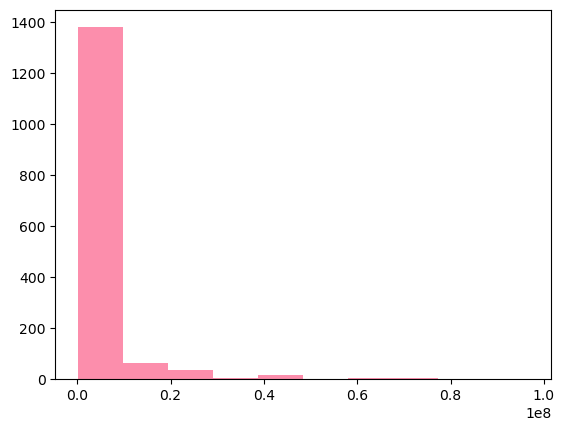

In [687]:
plt.hist(df_land_less_20m['Total_Price'], color='#fc8eac')

In [689]:
df_land_less_10m = df_land[(df_land['Total_Price'] < 10000000) & (df_land['Total_Price'] > 50000) & (df_land['Area'] < 2000) & (df_land['Area'] > 100)]

(array([434., 383., 215., 118.,  44.,  47.,  12.,  15.,  12.,   5.]),
 array([ 100000., 1089960., 2079920., 3069880., 4059840., 5049800.,
        6039760., 7029720., 8019680., 9009640., 9999600.]),
 <BarContainer object of 10 artists>)

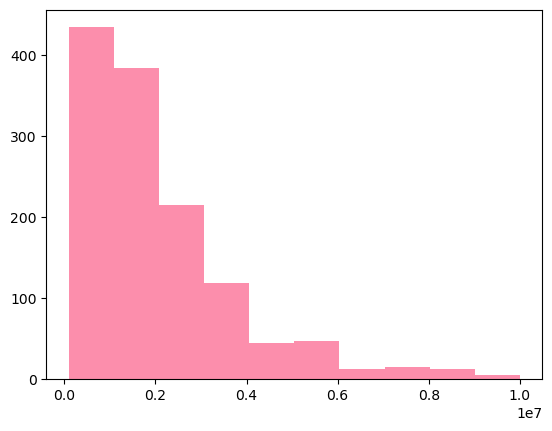

In [691]:
plt.hist(df_land_less_10m['Total_Price'], color='#fc8eac')

(array([466., 507., 226.,  71.,  12.,   1.,   0.,   0.,   0.,   2.]),
 array([  310.,  2257.,  4204.,  6151.,  8098., 10045., 11992., 13939.,
        15886., 17833., 19780.]),
 <BarContainer object of 10 artists>)

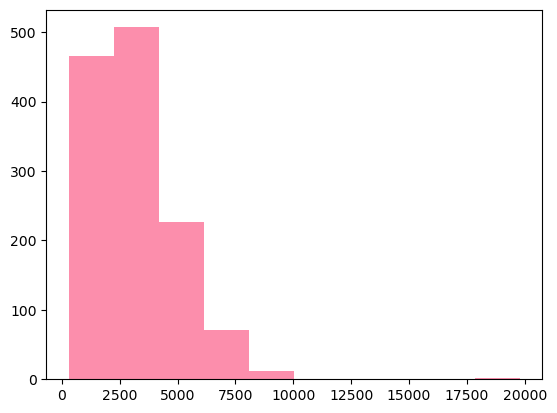

In [693]:
plt.hist(df_land_less_10m['Price_per_Meter'], color='#fc8eac')

In [695]:
plt.hist(df_land_less_10m['Area'], color='#fc8eac')

(array([ 39., 500., 189., 199., 226.,  69.,  25.,  14.,  14.,  10.]),
 array([ 109. ,  297.4,  485.8,  674.2,  862.6, 1051. , 1239.4, 1427.8,
        1616.2, 1804.6, 1993. ]),
 <BarContainer object of 10 artists>)

### Fahad + Faisal: Villas

- [x] 5- Completeness

- [x] 6- Uniqueness 

- [x] 7- Accuracy 

## df_villas dataset:

In [702]:
df_villas

City      Neighborhood        Facade Bedrooms  \
0                 الرياض         حي العارض        جنوبية        6   
1                 الرياض         حي العارض        جنوبية        6   
2                 الرياض         حي العارض        جنوبية        3   
3                 الرياض         حي النرجس        جنوبية        4   
4                 الرياض         حي العارض         غربية        4   
...                  ...               ...           ...      ...   
1085              الرياض       حي الازدهار  جنوبية شرقية       7+   
1086  امارة منطقة الرياض            الرياض        جنوبية      NaN   
1087              الرياض  حي النسيم الغربي         شرقية        4   
1088              الرياض        حي الاندلس         شرقية        5   
1089              الرياض          حي القدس        جنوبية        5   

     Living_Rooms Baths  street width   Area  Living_Room_Stairs  Kitchen  \
0               3    5+           NaN  244.0                   1        1   
1               4    5+           NaN  322.0                   1        1   
2               2    5+           NaN  350.0                   1        0   
3               4     4           NaN  350.0                   1        1   
4               1    5+           NaN  270.0                   1        1   
...           ...   ...           ...    ...                 ...      ...   
1085            5    5+           NaN  720.0                   1        1   
1086          NaN   NaN           NaN  320.0                   0        0   
1087            1     3           NaN  450.0                   0        0   
1088            1    5+           NaN  632.0                   0        1   
1089            2    5+           NaN  435.0                   0        1   

      Maid_Room  Drivers_Room  Annex  Yard  Swimming_Pool  Basement  \
0             1             1      0     1              0         0   
1             1             1      1     1              0         0   
2             1             0      1     0              0         1   
3             1             0      0     1              0         1   
4             1             1      0     0              0         0   
...         ...           ...    ...   ...            ...       ...   
1085          1             1      1     1              0         1   
1086          0             0      0     0              0         0   
1087          0             0      0     1              0         0   
1088          1             0      1     1              0         0   
1089          1             0      1     1              0         0   

      Car_Entrance  Elevator  Total_Price  
0                1         1      2300000  
1                1         1      3000000  
2                1         1      2600000  
3                1         1      2600000  
4                1         0      2800000  
...            ...       ...          ...  
1085             1         0      3900000  
1086             0         0      1550000  
1087             1         0      1500000  
1088             1         0      2400000  
1089             1         0      2500000  

[1090 rows x 19 columns]

## Notes to self: 

- Maybe we remove the street width Column 

- Check the Null values in Baths, Living Rooms, Bedrooms

- Check Outliers with prices, Area. 

- GIT GUD 

In [709]:
df_villas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                1090 non-null   object 
 1   Neighborhood        1090 non-null   object 
 2   Facade              1059 non-null   object 
 3   Bedrooms            993 non-null    object 
 4   Living_Rooms        967 non-null    object 
 5   Baths               993 non-null    object 
 6   street width        465 non-null    float64
 7   Area                1059 non-null   float64
 8   Living_Room_Stairs  1090 non-null   int64  
 9   Kitchen             1090 non-null   int64  
 10  Maid_Room           1090 non-null   int64  
 11  Drivers_Room        1090 non-null   int64  
 12  Annex               1090 non-null   int64  
 13  Yard                1090 non-null   int64  
 14  Swimming_Pool       1090 non-null   int64  
 15  Basement            1090 non-null   int64  
 16  Car_En

In [711]:
def show_values(df): 
    for col in df.columns:
        print(col)
        print(df[col].value_counts())

In [713]:
show_values(df_villas)

City
City
الرياض                983
امارة منطقة الرياض     93
الدرعية                13
حريملاء                 1
Name: count, dtype: int64
Neighborhood
Neighborhood
الرياض                       123
حي المونسية                   84
حي الرمال                     75
حي النرجس                     46
حي العارض                     41
                            ... 
حي مطار الملك خالد الدولي      1
حي لبن                         1
حي صلاح الدين                  1
القرينه                        1
حي الملك عبد العزيز            1
Name: count, Length: 95, dtype: int64
Facade
Facade
شمالية          258
جنوبية          248
غربية           214
شرقية           207
جنوبية غربية     33
شمالية غربية     32
شمالية شرقية     32
جنوبية شرقية     30
ثلاث شوارع        5
Name: count, dtype: int64
Bedrooms
Bedrooms
5     397
7+    267
4     163
6     118
3      33
1      10
2       5
Name: count, dtype: int64
Living_Rooms
Living_Rooms
2     433
3     280
1     126
4      76
5      48
7+      4
Name: count, 

In [715]:
df_villas.isna().sum().sort_values(ascending=False)

street width          625
Living_Rooms          123
Bedrooms               97
Baths                  97
Facade                 31
Area                   31
City                    0
Yard                    0
Elevator                0
Car_Entrance            0
Basement                0
Swimming_Pool           0
Kitchen                 0
Annex                   0
Drivers_Room            0
Maid_Room               0
Neighborhood            0
Living_Room_Stairs      0
Total_Price             0
dtype: int64

In [717]:
df_villas.describe()

street width          Area  Living_Room_Stairs      Kitchen  \
count     465.00000   1059.000000         1090.000000  1090.000000   
mean       17.24086    473.115203            0.700917     0.796330   
std         4.75182   1399.036553            0.458066     0.402911   
min         5.00000     25.000000            0.000000     0.000000   
25%        15.00000    275.000000            0.000000     1.000000   
50%        18.00000    338.000000            1.000000     1.000000   
75%        20.00000    450.000000            1.000000     1.000000   
max        40.00000  32020.000000            1.000000     1.000000   

         Maid_Room  Drivers_Room        Annex         Yard  Swimming_Pool  \
count  1090.000000   1090.000000  1090.000000  1090.000000    1090.000000   
mean      0.697248      0.360550     0.544954     0.715596       0.082569   
std       0.459660      0.480381     0.498204     0.451337       0.275356   
min       0.000000      0.000000     0.000000     0.000000       0.000000   
25%       0.000000      0.000000     0.000000     0.000000       0.000000   
50%       1.000000      0.000000     1.000000     1.000000       0.000000   
75%       1.000000      1.000000     1.000000     1.000000       0.000000   
max       1.000000      1.000000     1.000000     1.000000       1.000000   

          Basement  Car_Entrance     Elevator   Total_Price  
count  1090.000000   1090.000000  1090.000000  1.090000e+03  
mean      0.034862      0.781651     0.270642  2.629100e+06  
std       0.183515      0.413315     0.444496  2.092205e+06  
min       0.000000      0.000000     0.000000  3.000000e+05  
25%       0.000000      1.000000     0.000000  1.500000e+06  
50%       0.000000      1.000000     0.000000  2.150000e+06  
75%       0.000000      1.000000     1.000000  3.000000e+06  
max       1.000000      1.000000     1.000000  2.250000e+07

In [719]:
df_villas[df_villas['Area'].isnull()]

City      Neighborhood Facade Bedrooms Living_Rooms Baths  \
724               الرياض         حي المنار    NaN      NaN          NaN   NaN   
730               الرياض        حي الفيحاء    NaN      NaN          NaN   NaN   
737               الرياض         حي الندوة    NaN      NaN          NaN   NaN   
741               الرياض        حي الفيحاء    NaN      NaN          NaN   NaN   
743               الرياض         حي الروضة    NaN      NaN          NaN   NaN   
745               الرياض         حي الرمال    NaN      NaN          NaN   NaN   
749               الرياض       حي المونسية    NaN      NaN          NaN   NaN   
750               الرياض        حي الفيحاء    NaN      NaN          NaN   NaN   
756               الرياض        حي اشبيلية    NaN      NaN          NaN   NaN   
765   امارة منطقة الرياض            الرياض    NaN      NaN          NaN   NaN   
775               الرياض         حي الرمال    NaN      NaN          NaN   NaN   
782               الرياض       حي المعيزلة    NaN      NaN          NaN   NaN   
785               الرياض        حي السعادة    NaN      NaN          NaN   NaN   
809               الرياض          حي قرطبة    NaN      NaN          NaN   NaN   
817               الرياض        حي السعادة    NaN      NaN          NaN   NaN   
823               الرياض       حي القادسية    NaN      NaN          NaN   NaN   
824               الرياض     حي الملك فيصل    NaN      NaN          NaN   NaN   
838               الرياض        حي اشبيلية    NaN      NaN          NaN   NaN   
869               الرياض         حي النهضة    NaN      NaN          NaN   NaN   
882               الرياض         حي الرمال    NaN      NaN          NaN   NaN   
929               الرياض     حي الملك فيصل    NaN      NaN          NaN   NaN   
934   امارة منطقة الرياض            الرياض    NaN      NaN          NaN   NaN   
965   امارة منطقة الرياض            الرياض    NaN      NaN          NaN   NaN   
985               الرياض          حي الملز    NaN      NaN          NaN   NaN   
993               الرياض  حي النسيم الشرقي    NaN      NaN          NaN   NaN   
1028              الرياض        حي اليرموك    NaN      NaN          NaN   NaN   
1037              الرياض         حي الرمال    NaN      NaN          NaN   NaN   
1050              الرياض       حي المونسية    NaN      NaN          NaN   NaN   
1055              الرياض       حي المونسية    NaN      NaN          NaN   NaN   
1061              الرياض       حي المونسية    NaN      NaN          NaN   NaN   
1068              الرياض        حي اليرموك    NaN      NaN          NaN   NaN   

      street width  Area  Living_Room_Stairs  Kitchen  Maid_Room  \
724            NaN   NaN                   0        0          0   
730            NaN   NaN                   0        0          0   
737            NaN   NaN                   0        0          0   
741            NaN   NaN                   0        0          0   
743            NaN   NaN                   0        0          0   
745            NaN   NaN                   0        0          0   
749            NaN   NaN                   0        0          0   
750            NaN   NaN                   0        0          0   
756            NaN   NaN                   0        0          0   
765            NaN   NaN                   0        0          0   
775            NaN   NaN                   0        0          0   
782            NaN   NaN                   0        0          0   
785            NaN   NaN                   0        0          0   
809            NaN   NaN                   0        0          0   
817            NaN   NaN                   0        0          0   
823            NaN   NaN                   0        0          0   
824            NaN   NaN                   0        0          0   
838            NaN   NaN                   0        0          0   
869            NaN   NaN                   0        0          0   
882            NaN   NaN                   0        0          0   

In [721]:
df_villas[df_villas['Baths'].isnull()]

City         Neighborhood  Facade Bedrooms Living_Rooms  \
713   امارة منطقة الرياض               الرياض  جنوبية      NaN          NaN   
714               الرياض            حي الرمال  شمالية      NaN          NaN   
720               الرياض            حي الرمال  جنوبية      NaN          NaN   
721   امارة منطقة الرياض               الرياض   غربية      NaN          NaN   
723   امارة منطقة الرياض               الرياض   شرقية      NaN          NaN   
...                  ...                  ...     ...      ...          ...   
1068              الرياض           حي اليرموك     NaN      NaN          NaN   
1074              الرياض             حي الشرق  شمالية      NaN          NaN   
1075              الرياض  حي الملك عبد العزيز   شرقية      NaN          NaN   
1081              الرياض           حي اليرموك   شرقية      NaN          NaN   
1086  امارة منطقة الرياض               الرياض  جنوبية      NaN          NaN   

     Baths  street width   Area  Living_Room_Stairs  Kitchen  Maid_Room  \
713    NaN           NaN  321.0                   0        0          0   
714    NaN           NaN  281.0                   0        0          0   
720    NaN           NaN  355.0                   0        0          0   
721    NaN           NaN  363.0                   0        0          0   
723    NaN           NaN  495.0                   0        0          0   
...    ...           ...    ...                 ...      ...        ...   
1068   NaN           NaN    NaN                   0        0          0   
1074   NaN           NaN  281.0                   0        0          0   
1075   NaN           NaN  350.0                   0        0          0   
1081   NaN           NaN  300.0                   0        0          0   
1086   NaN           NaN  320.0                   0        0          0   

      Drivers_Room  Annex  Yard  Swimming_Pool  Basement  Car_Entrance  \
713              0      0     0              0         0             0   
714              0      0     0              0         0             0   
720              0      0     0              0         0             0   
721              0      0     0              0         0             0   
723              0      0     0              0         0             0   
...            ...    ...   ...            ...       ...           ...   
1068             0      0     0              0         0             0   
1074             0      0     0              0         0             0   
1075             0      0     0              0         0             0   
1081             0      0     0              0         0             0   
1086             0      0     0              0         0             0   

      Elevator  Total_Price  
713          0      3150000  
714          0      1400000  
720          0      2400000  
721          0      1700000  
723          0      3500000  
...        ...          ...  
1068         0      2250000  
1074         0      1400000  
1075         0      3000000  
1081         0      2250000  
1086         0      1550000  

[97 rows x 19 columns]

In [723]:
# Drop the street Width Column: too many NONE values, and becuase we don't want it to affect our analysis  

df_villas.drop('street width', axis=1, inplace=True)

In [725]:
# here we are splitting the data to another data that has zero nulls 
villas_no_null = df_villas[(df_villas['Facade'].notnull()) & (df_villas['Bedrooms'].notnull()) &
 (df_villas['Living_Rooms'].notnull()) & (df_villas['Area'].notnull())]

In [727]:
villas_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1089
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                967 non-null    object 
 1   Neighborhood        967 non-null    object 
 2   Facade              967 non-null    object 
 3   Bedrooms            967 non-null    object 
 4   Living_Rooms        967 non-null    object 
 5   Baths               967 non-null    object 
 6   Area                967 non-null    float64
 7   Living_Room_Stairs  967 non-null    int64  
 8   Kitchen             967 non-null    int64  
 9   Maid_Room           967 non-null    int64  
 10  Drivers_Room        967 non-null    int64  
 11  Annex               967 non-null    int64  
 12  Yard                967 non-null    int64  
 13  Swimming_Pool       967 non-null    int64  
 14  Basement            967 non-null    int64  
 15  Car_Entrance        967 non-null    int64  
 16  Elevator    

In [729]:
villas_no_null[villas_no_null.isna().any(axis=1)]

Empty DataFrame
Columns: [City, Neighborhood, Facade, Bedrooms, Living_Rooms, Baths, Area, Living_Room_Stairs, Kitchen, Maid_Room, Drivers_Room, Annex, Yard, Swimming_Pool, Basement, Car_Entrance, Elevator, Total_Price]
Index: []

In [731]:
villas_no_null.duplicated().sum()

119

In [733]:
villas_no_null[villas_no_null.duplicated()]

City Neighborhood        Facade Bedrooms Living_Rooms  \
524   امارة منطقة الرياض       الرياض        شمالية        5            3   
709               الرياض  حي المونسية        جنوبية        6            4   
711               الرياض    حي الرمال         غربية       7+            3   
716               الرياض  حي المونسية         شرقية        5            3   
717               الرياض   حي الحمراء         شرقية       7+            2   
...                  ...          ...           ...      ...          ...   
1042              الرياض  حي المونسية         غربية        5            2   
1048              الرياض  حي المونسية  شمالية غربية        5            2   
1062  امارة منطقة الرياض       الرياض         شرقية        5            3   
1078  امارة منطقة الرياض       الرياض         غربية        5            1   
1083              الرياض       الرياض        جنوبية        5            2   

     Baths   Area  Living_Room_Stairs  Kitchen  Maid_Room  Drivers_Room  \
524     5+  200.0                   1        1          0             0   
709     5+  262.0                   1        1          1             1   
711     5+  300.0                   1        1          1             0   
716      4  308.0                   1        0          1             0   
717     5+  618.0                   1        1          1             1   
...    ...    ...                 ...      ...        ...           ...   
1042    5+  300.0                   1        1          1             0   
1048    5+  440.0                   1        1          1             0   
1062    5+  375.0                   1        1          1             0   
1078    5+  250.0                   1        1          1             0   
1083    5+  300.0                   1        1          1             0   

      Annex  Yard  Swimming_Pool  Basement  Car_Entrance  Elevator  \
524       0     1              0         0             1         0   
709       0     1              0         0             1         0   
711       0     1              0         0             1         0   
716       1     1              0         0             1         1   
717       1     1              1         0             1         1   
...     ...   ...            ...       ...           ...       ...   
1042      1     1              0         0             1         1   
1048      0     0              0         0             0         0   
1062      1     1              0         0             1         1   
1078      0     0              0         0             0         0   
1083      1     0              0         0             1         0   

      Total_Price  
524       1450000  
709       2000000  
711       1500000  
716       2650000  
717       4500000  
...           ...  
1042      2300000  
1048      3250000  
1062      3650000  
1078      1450000  
1083      1400000  

[119 rows x 18 columns]

In [735]:
# here we are focusing on analyzing the data that is based on Riyadh that's why we assigned Riyadh to the new dataset
villas_no_null = villas_no_null[villas_no_null['City'] == 'الرياض']

In [737]:
villas_no_null.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 0 to 1089
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                884 non-null    object 
 1   Neighborhood        884 non-null    object 
 2   Facade              884 non-null    object 
 3   Bedrooms            884 non-null    object 
 4   Living_Rooms        884 non-null    object 
 5   Baths               884 non-null    object 
 6   Area                884 non-null    float64
 7   Living_Room_Stairs  884 non-null    int64  
 8   Kitchen             884 non-null    int64  
 9   Maid_Room           884 non-null    int64  
 10  Drivers_Room        884 non-null    int64  
 11  Annex               884 non-null    int64  
 12  Yard                884 non-null    int64  
 13  Swimming_Pool       884 non-null    int64  
 14  Basement            884 non-null    int64  
 15  Car_Entrance        884 non-null    int64  
 16  Elevator    

# Outliers
After Deleting 14 Rows from the original dataframe we can see that the distribution is much clearer and we have a better 
understanding of the data itself and how its behaviour presents itself. 

We decided to remove the Prices that are greater than 10M Riyals and the areas that are greater than 2000 squared Meter.

In [740]:
# Outliers check:
#
plt.hist(villas_no_null['Total_Price'], color='#fc8eac')

(array([550., 246.,  58.,  16.,   5.,   0.,   1.,   6.,   1.,   1.]),
 array([  300000.,  2520000.,  4740000.,  6960000.,  9180000., 11400000.,
        13620000., 15840000., 18060000., 20280000., 22500000.]),
 <BarContainer object of 10 artists>)

(array([882.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.50000e+01, 3.22450e+03, 6.42400e+03, 9.62350e+03, 1.28230e+04,
        1.60225e+04, 1.92220e+04, 2.24215e+04, 2.56210e+04, 2.88205e+04,
        3.20200e+04]),
 <BarContainer object of 10 artists>)

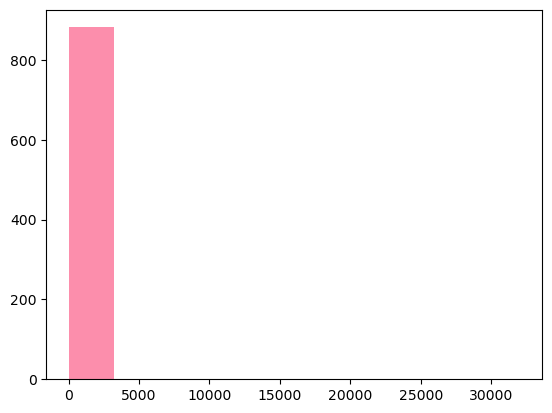

In [742]:
# Outliers check:
#
plt.hist(villas_no_null['Area'], color='#fc8eac')

In [744]:
temp = villas_no_null[(villas_no_null['Area'] < 2000) & (villas_no_null['Total_Price'] <= 10000000) &
                     (villas_no_null['Total_Price'] > 500000) & (villas_no_null['Area'] > 100)]

(array([246., 392., 109.,  52.,  35.,  25.,   3.,   4.,   3.,   1.]),
 array([ 149. ,  294.2,  439.4,  584.6,  729.8,  875. , 1020.2, 1165.4,
        1310.6, 1455.8, 1601. ]),
 <BarContainer object of 10 artists>)

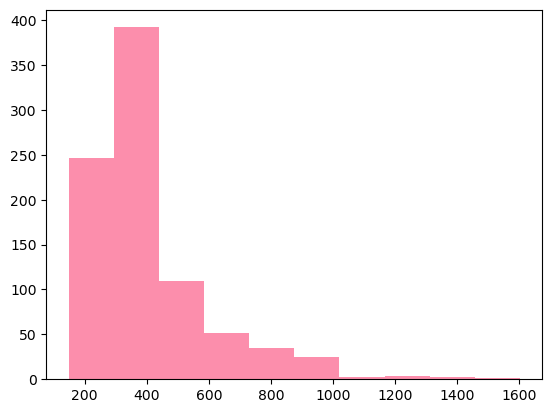

In [746]:
plt.hist(temp['Area'], color='#fc8eac')

(array([217., 292., 181.,  71.,  48.,  25.,  17.,   8.,   7.,   4.]),
 array([  525000.,  1472500.,  2420000.,  3367500.,  4315000.,  5262500.,
         6210000.,  7157500.,  8105000.,  9052500., 10000000.]),
 <BarContainer object of 10 artists>)

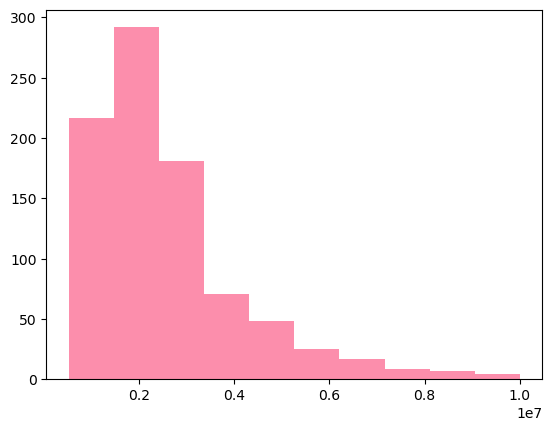

In [748]:
plt.hist(temp['Total_Price'], color='#fc8eac')

In [750]:
villas_no_null = temp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


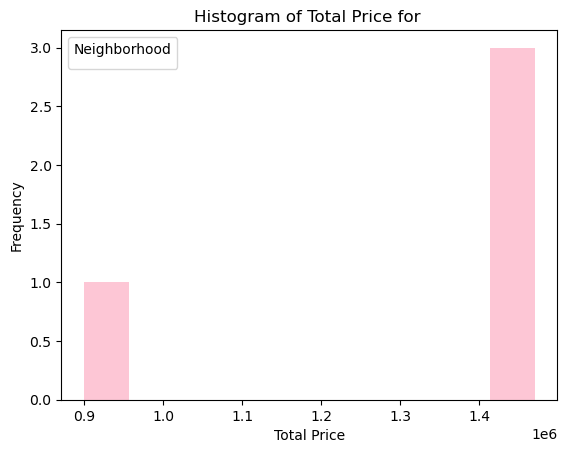

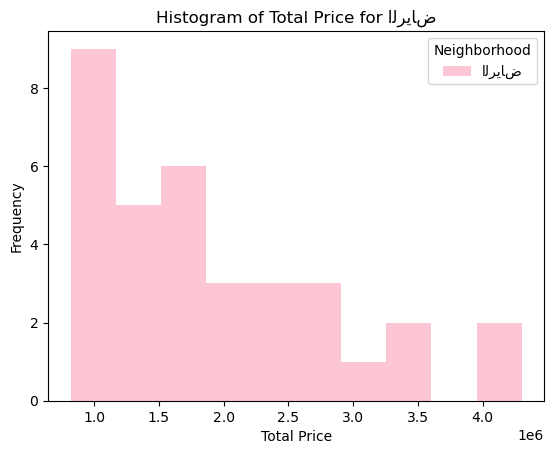

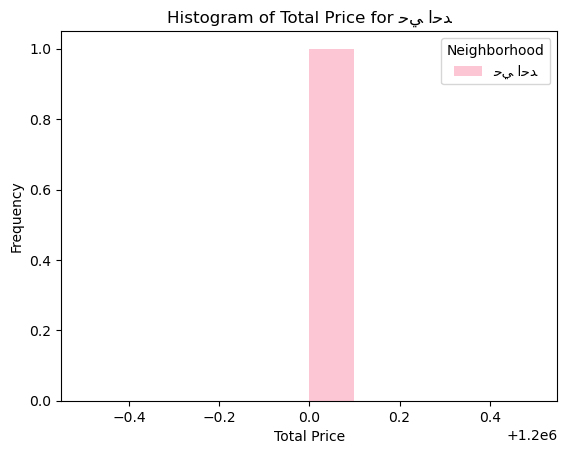

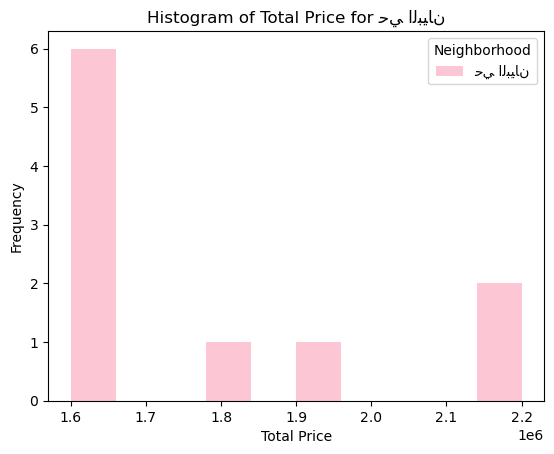

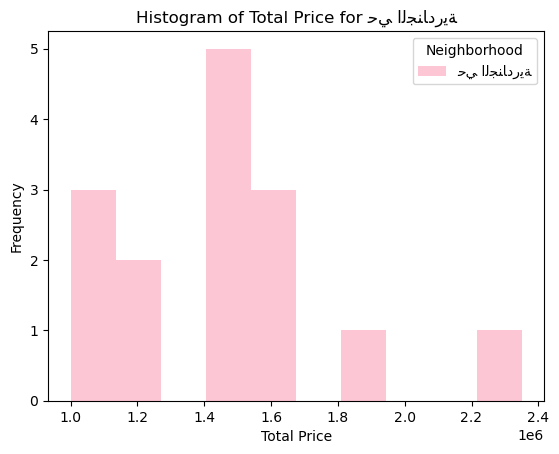

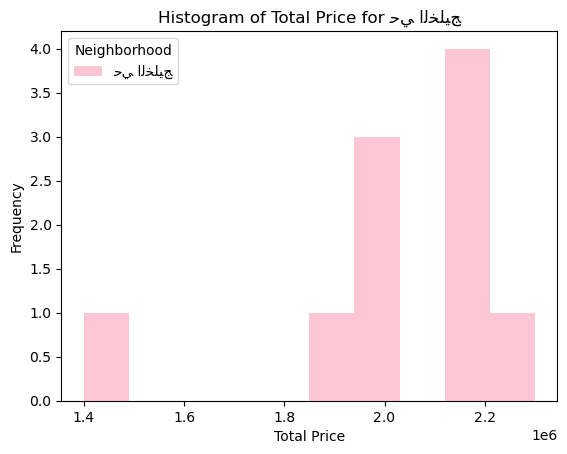

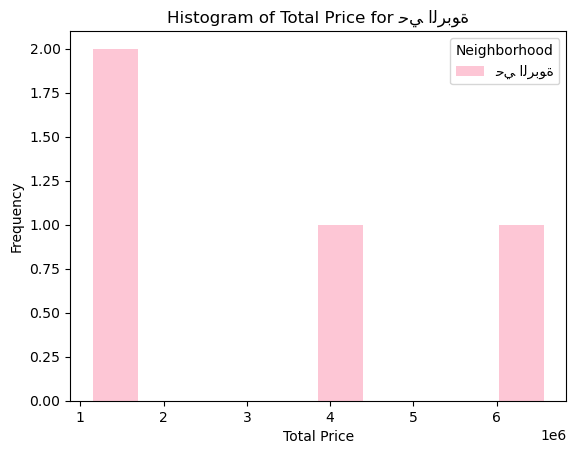

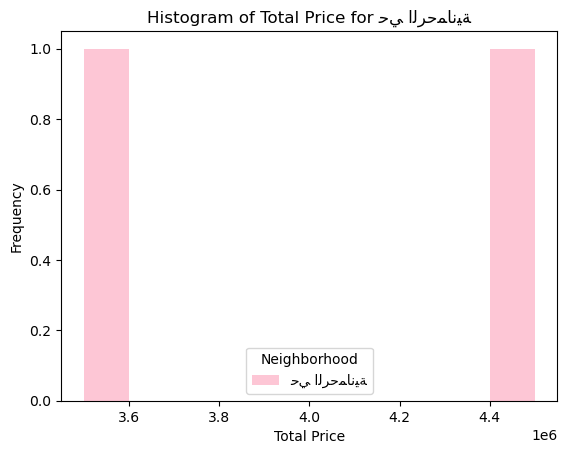

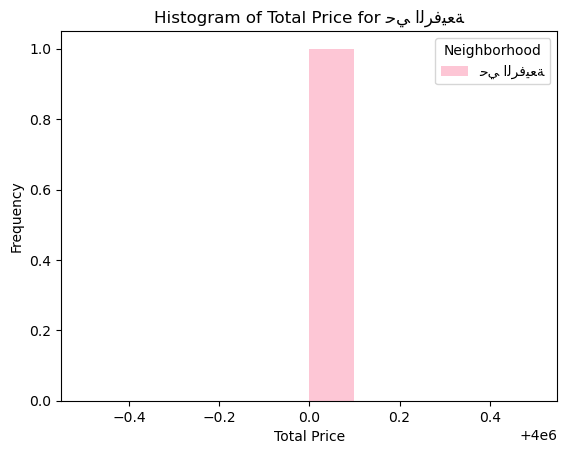

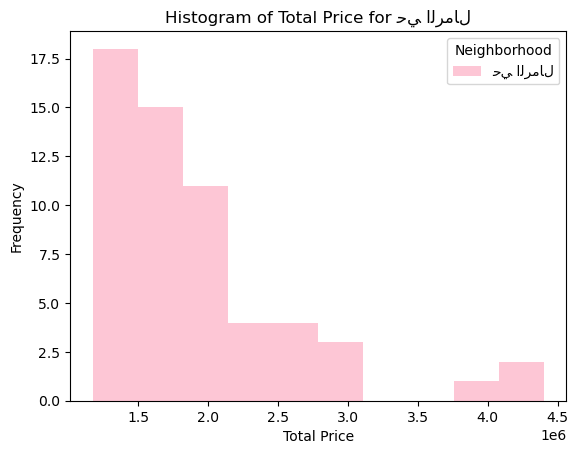

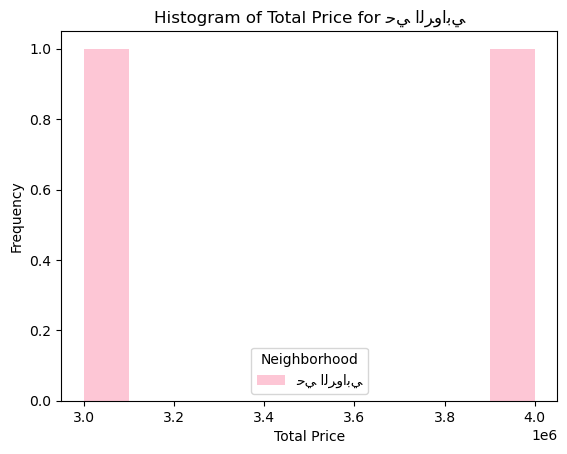

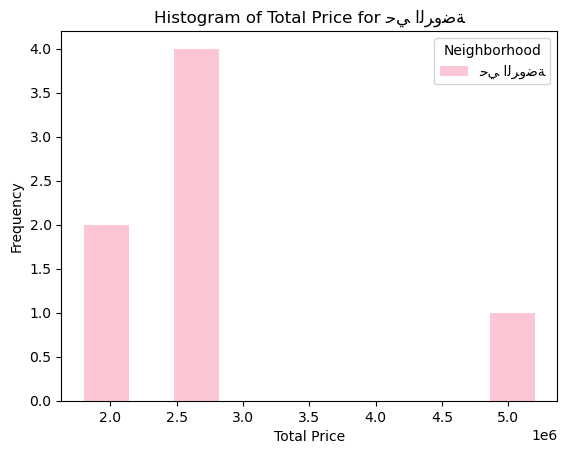

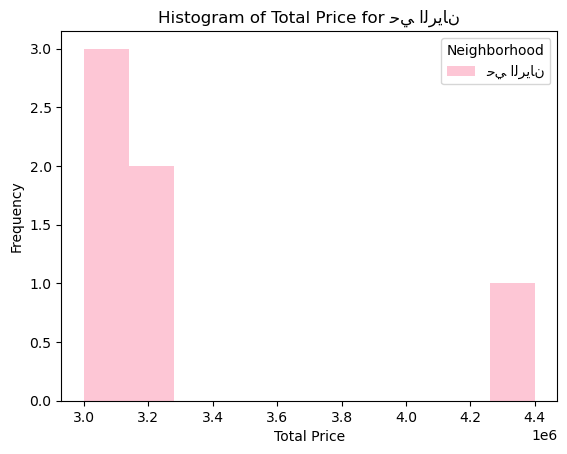

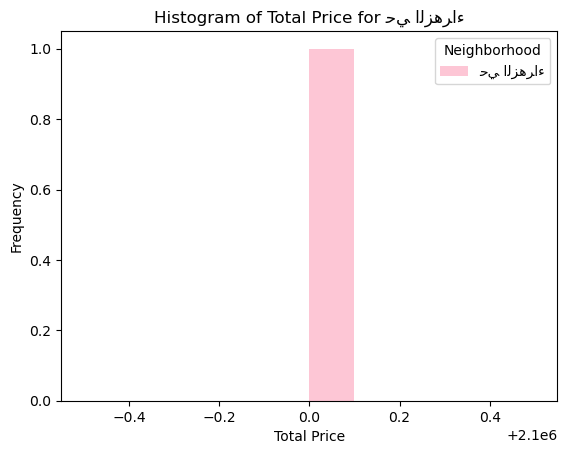

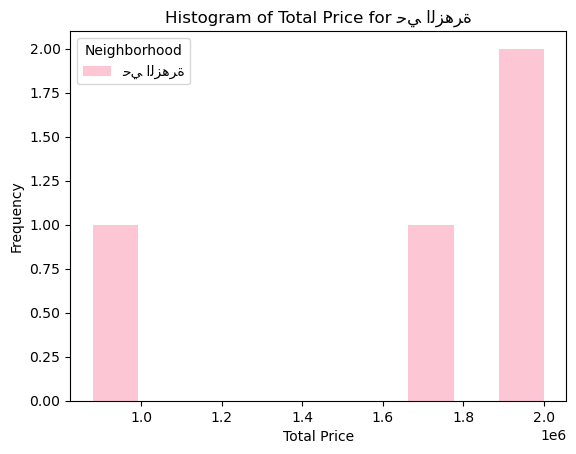

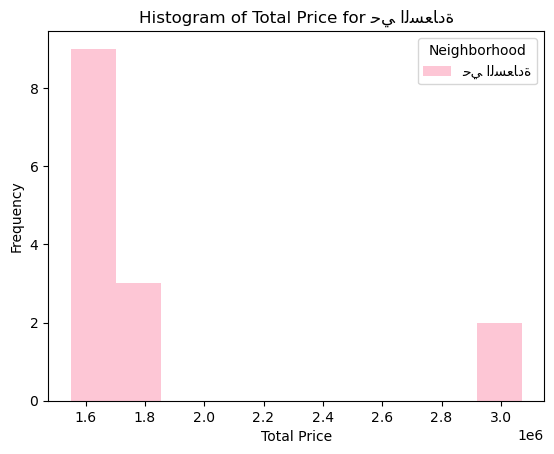

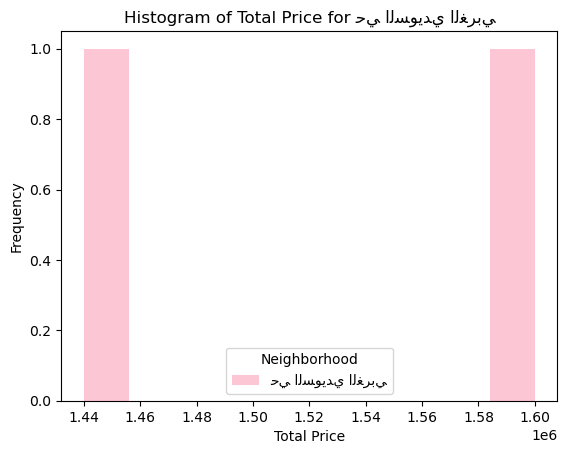

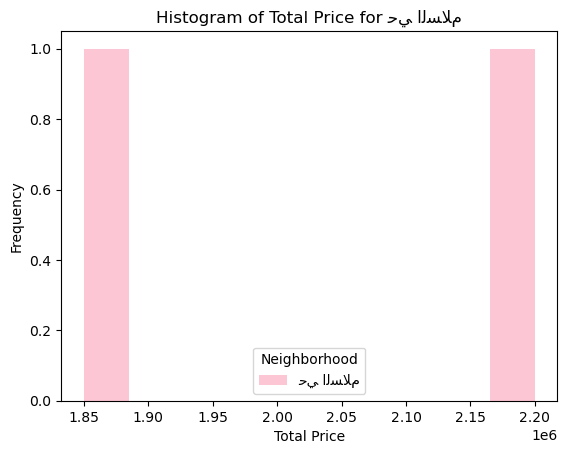

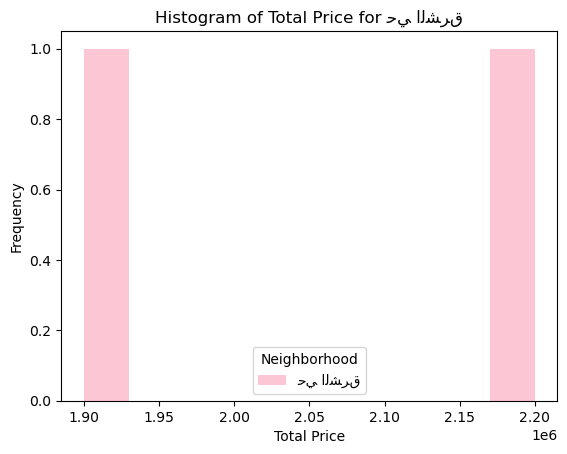

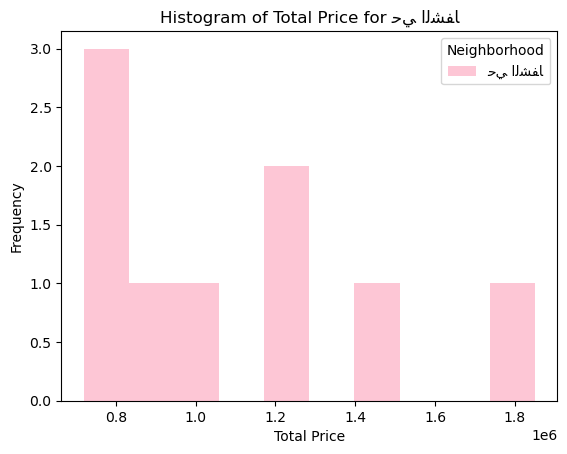

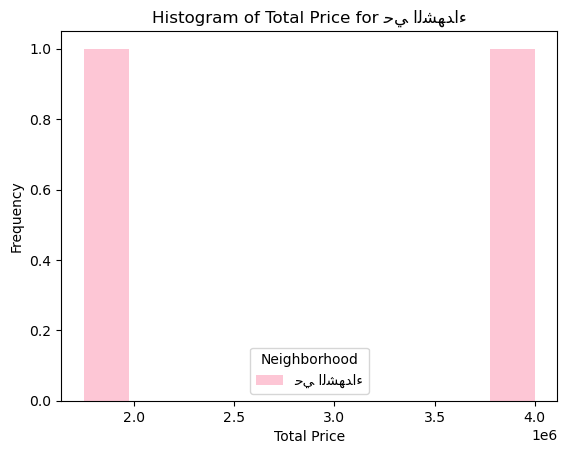

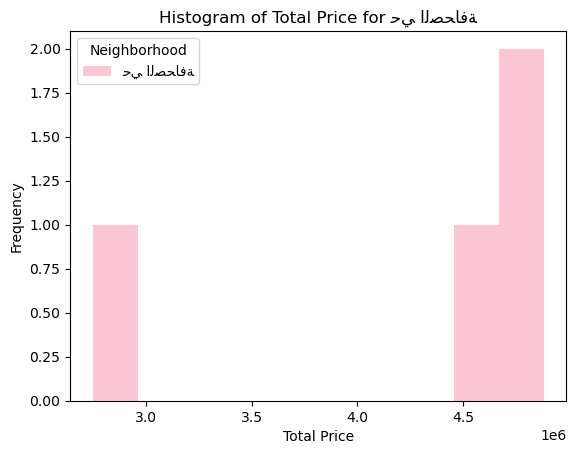

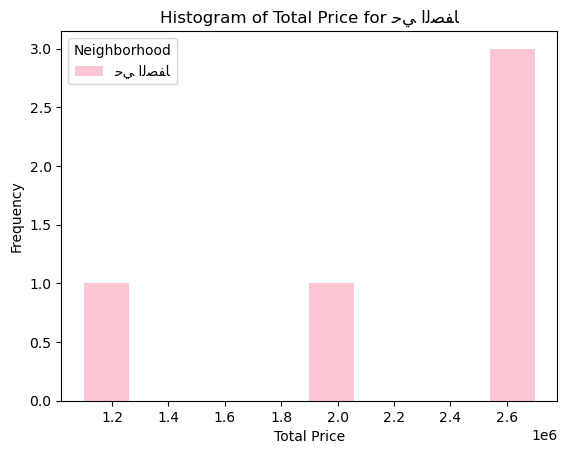

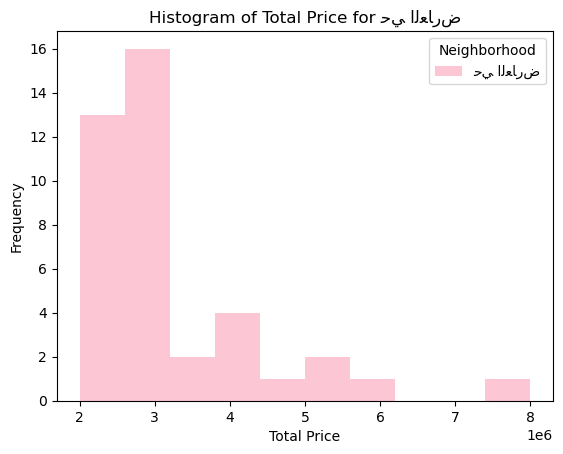

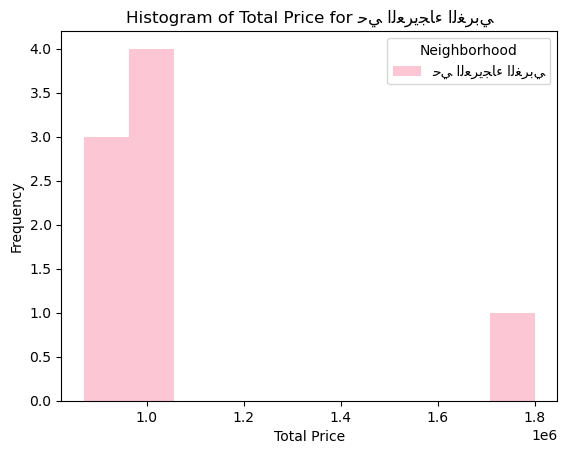

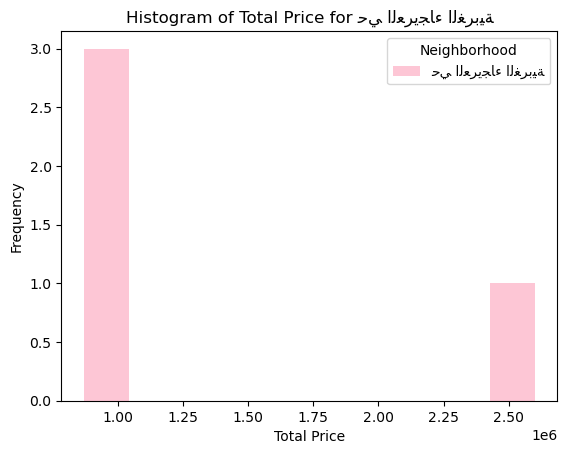

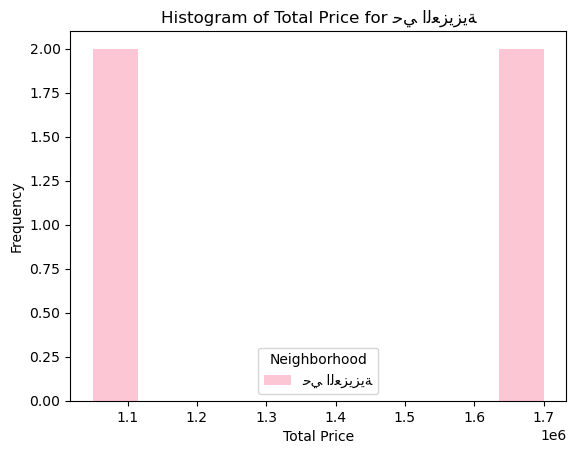

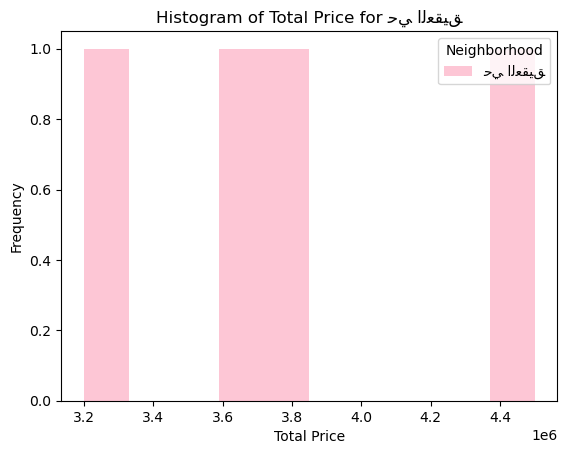

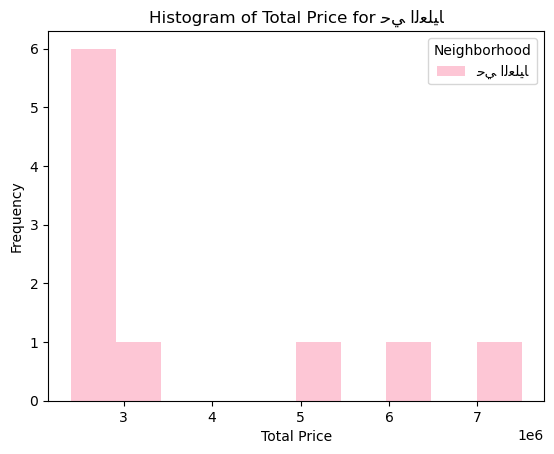

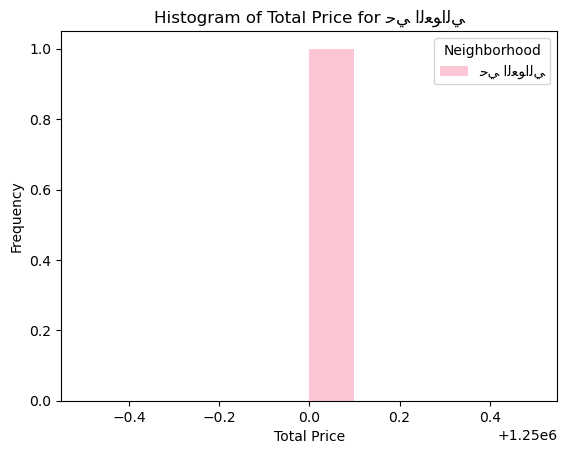

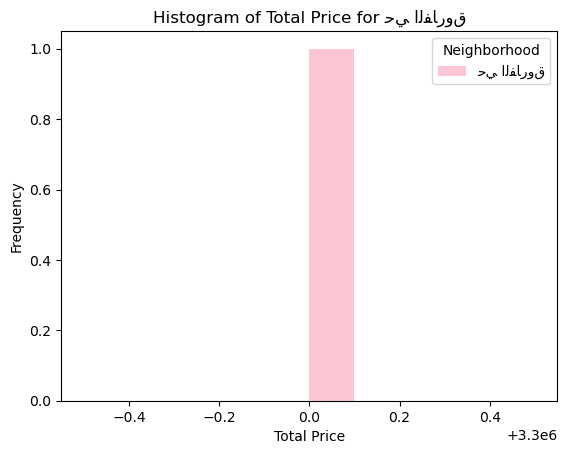

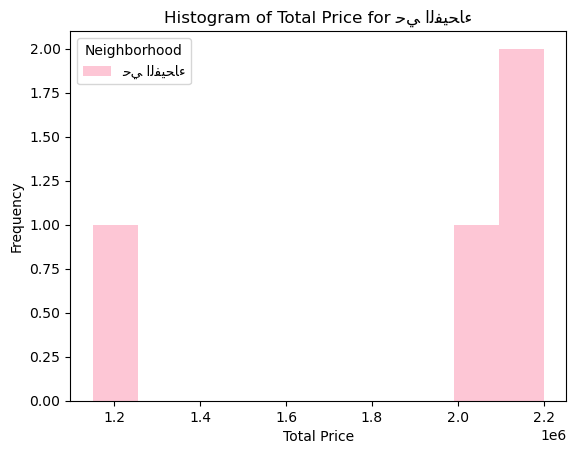

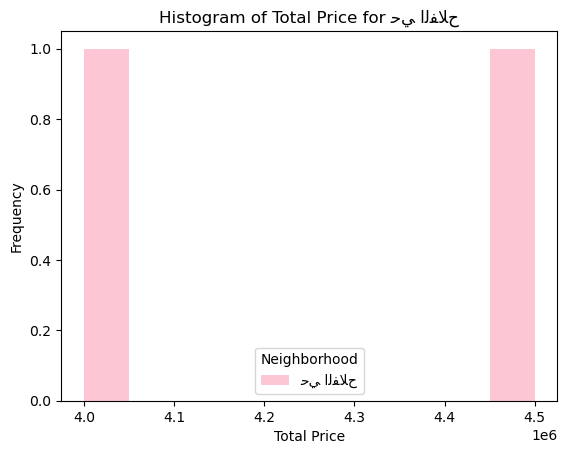

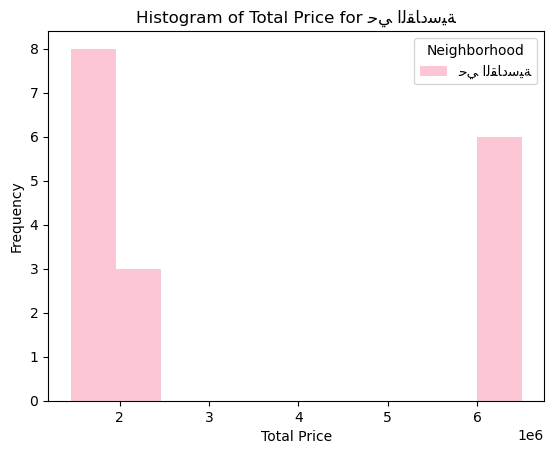

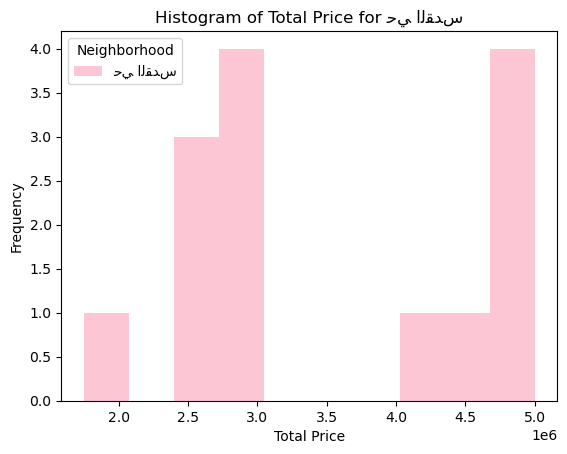

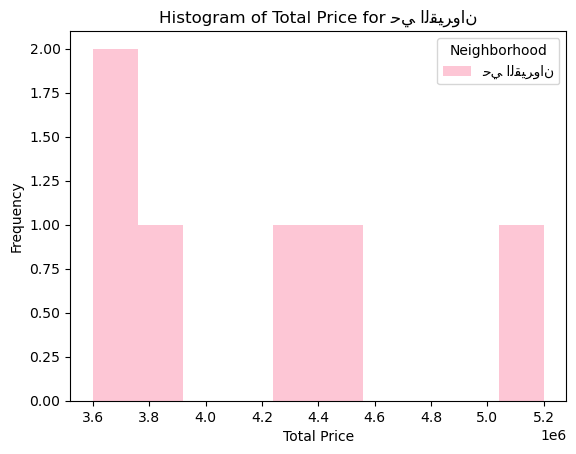

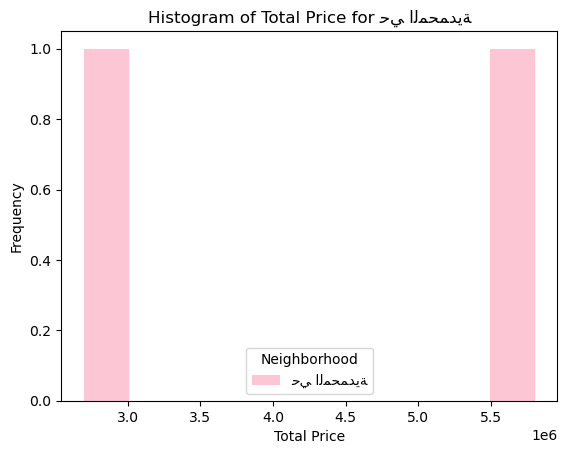

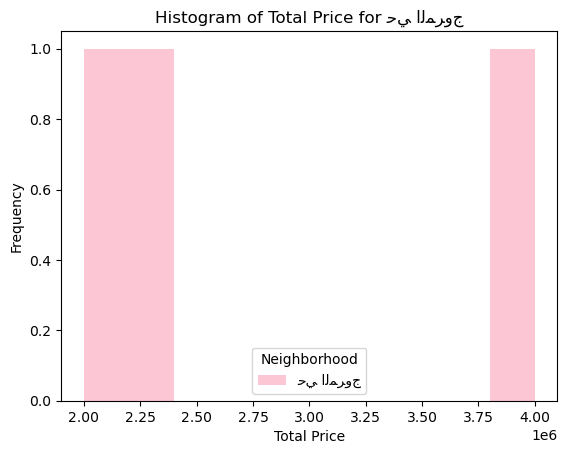

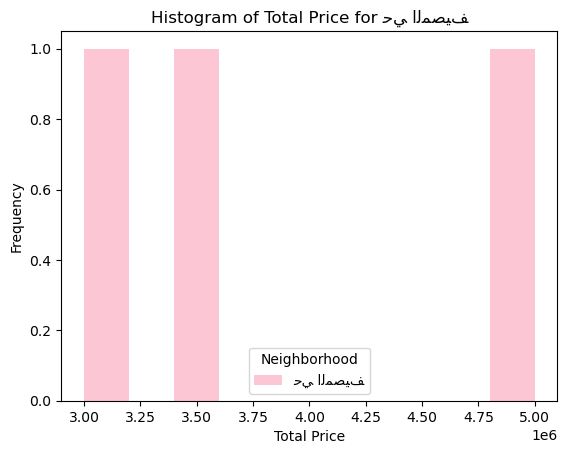

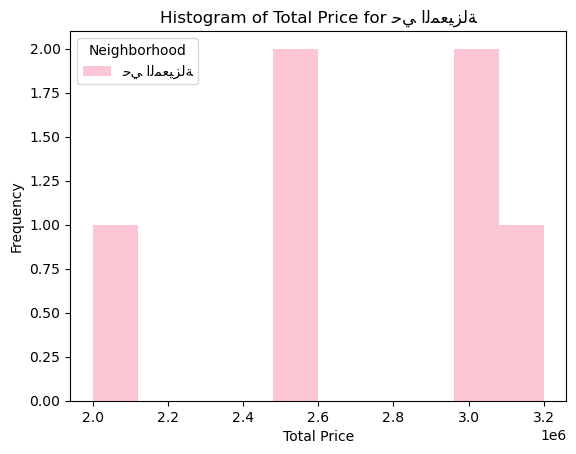

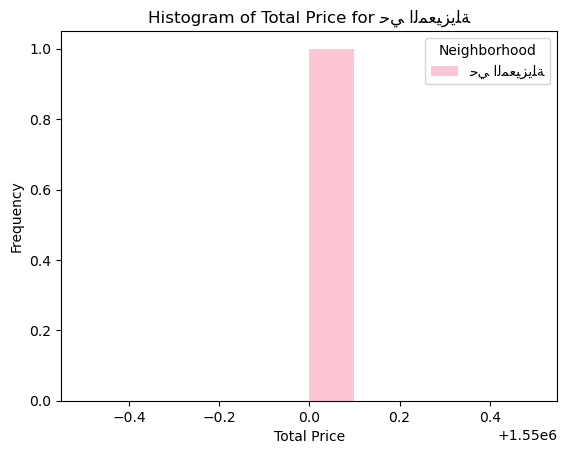

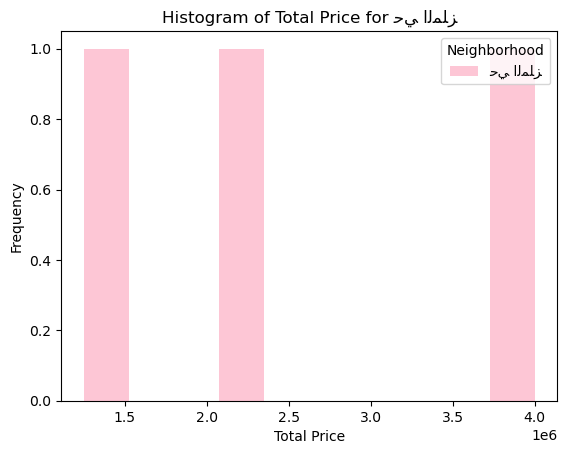

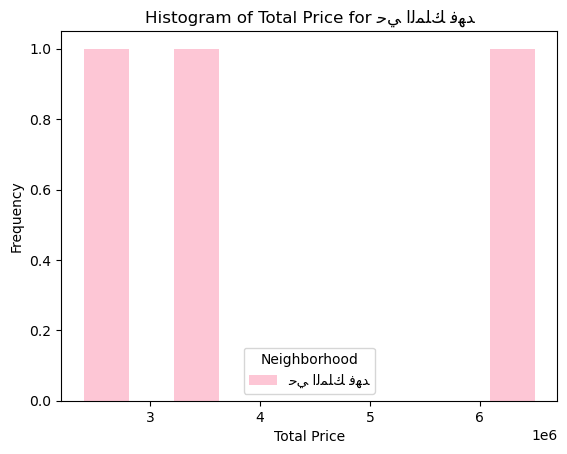

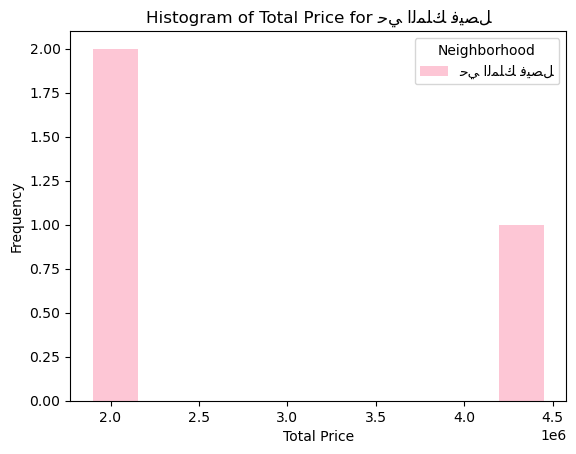

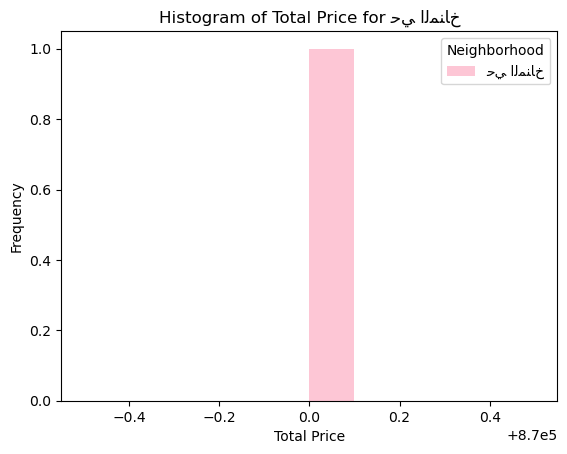

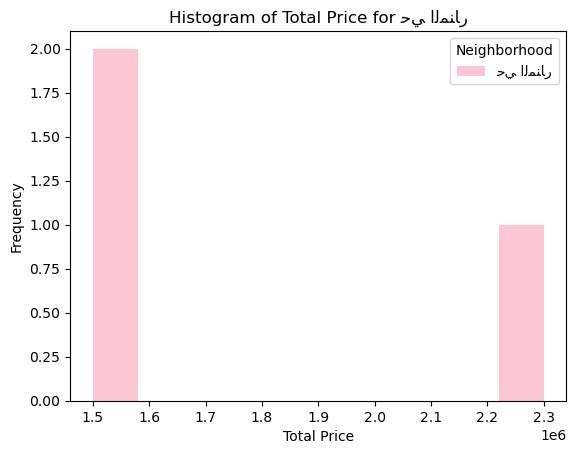

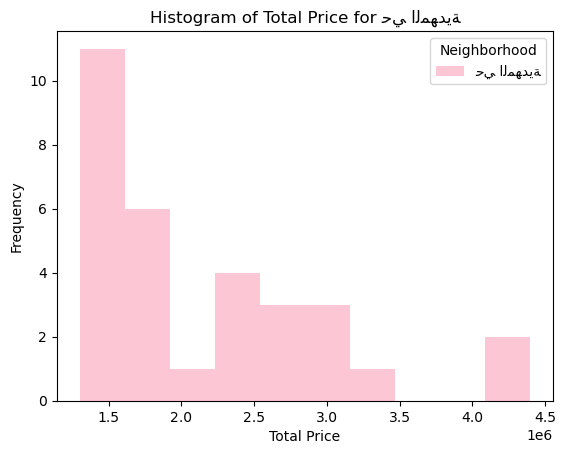

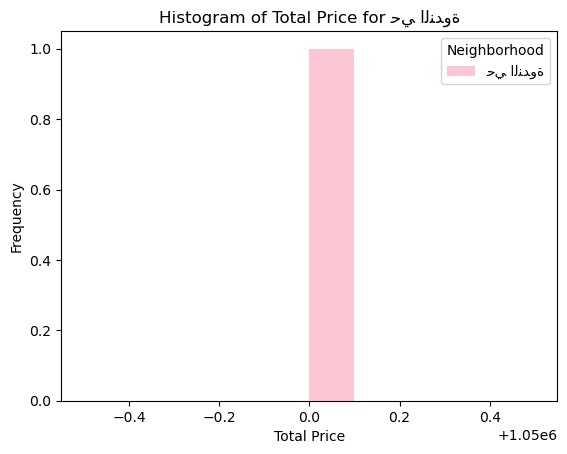

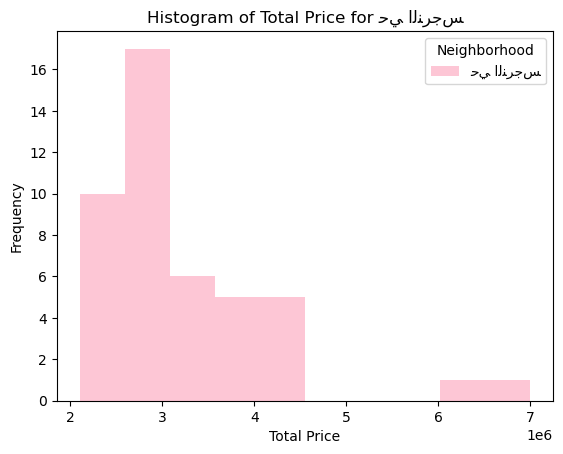

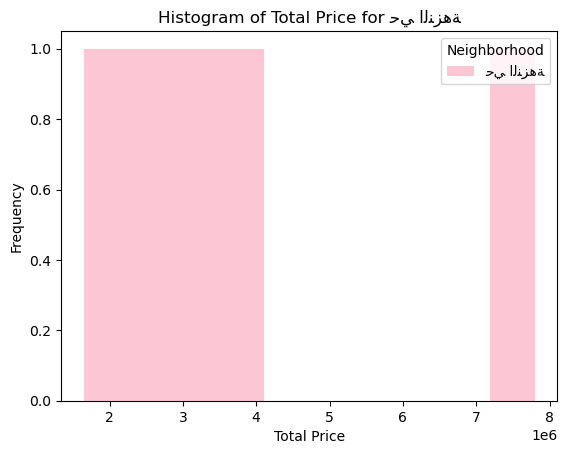

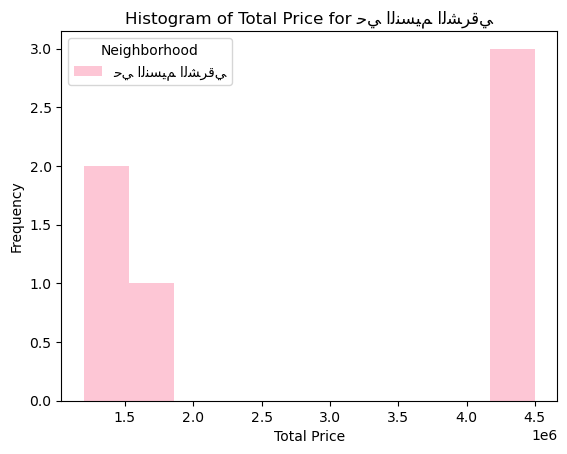

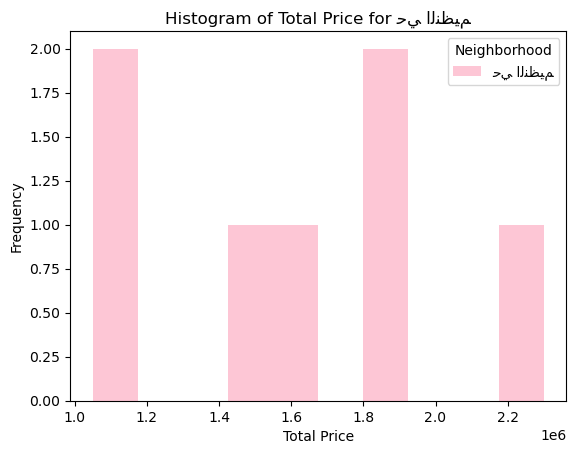

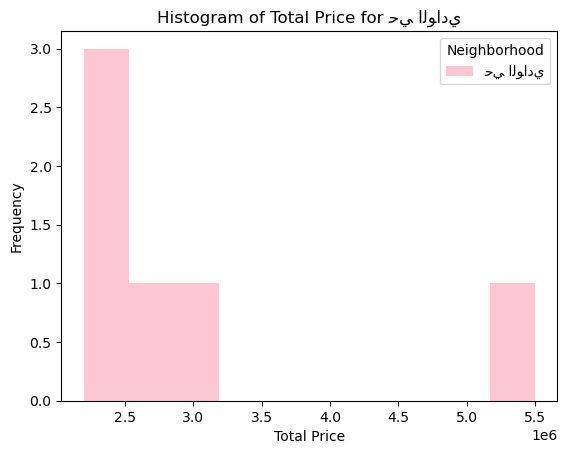

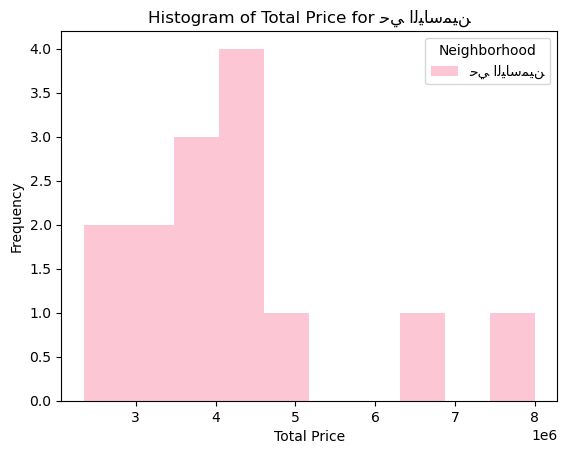

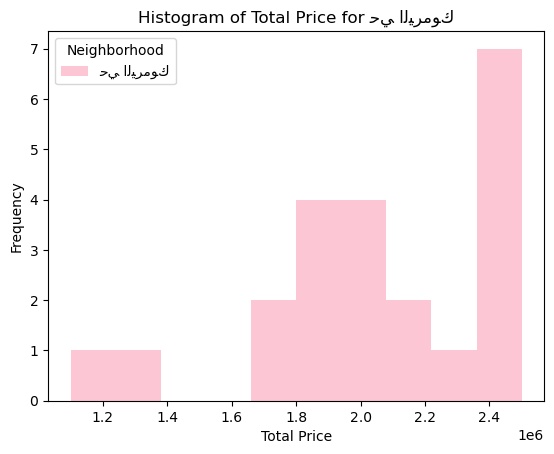

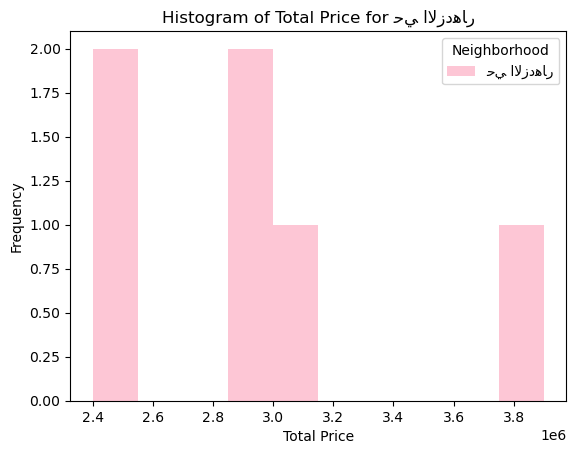

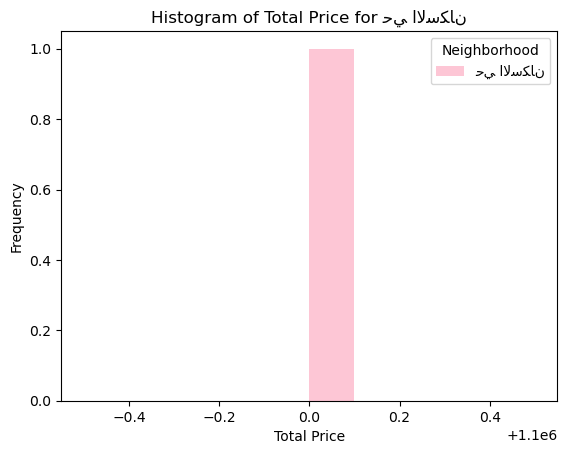

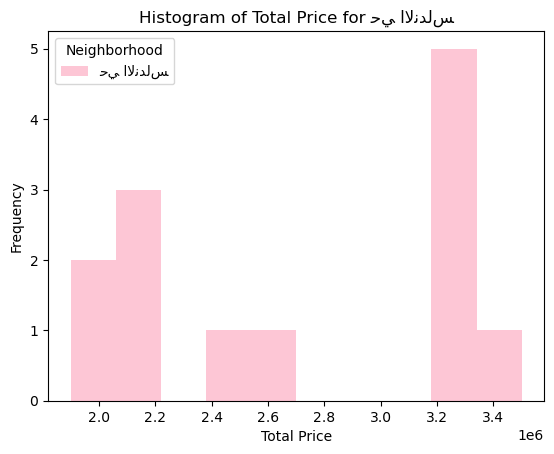

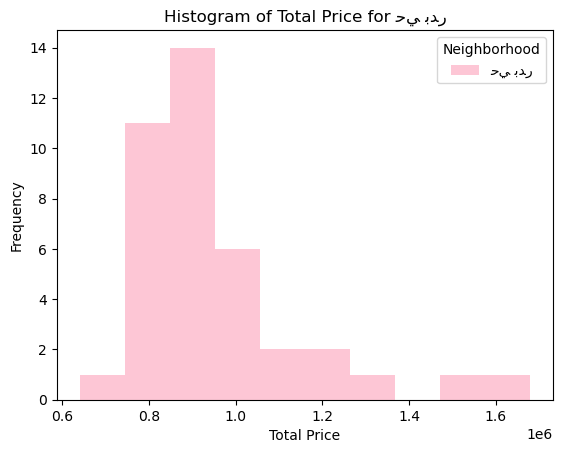

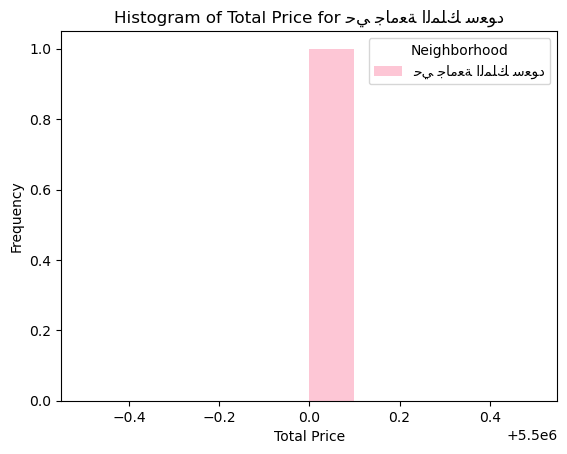

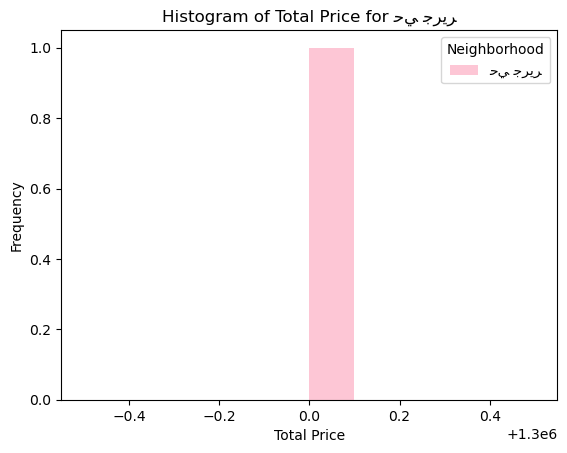

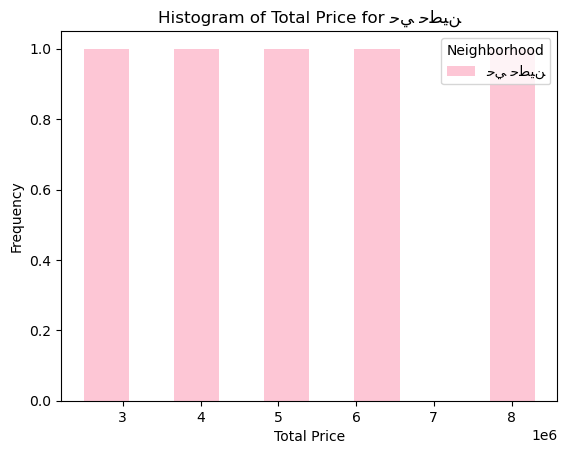

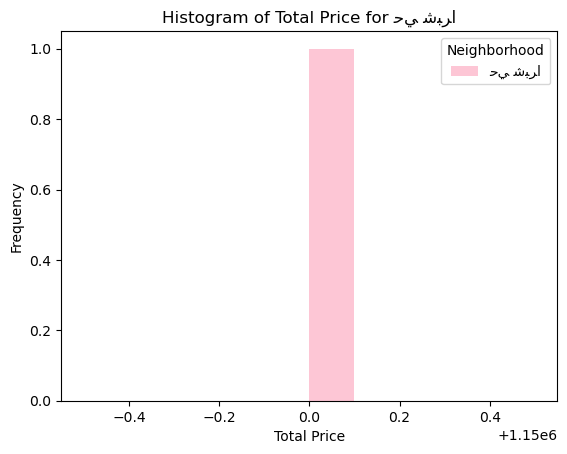

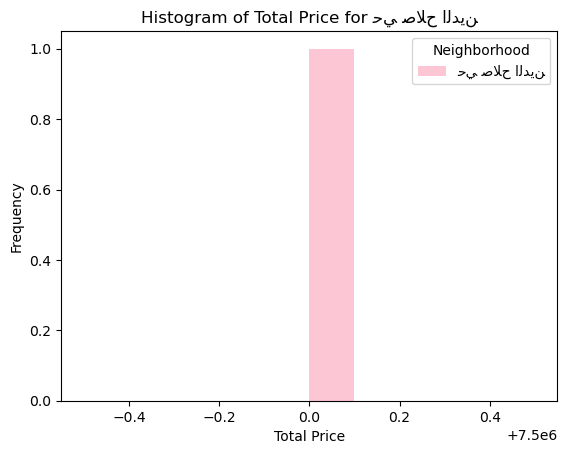

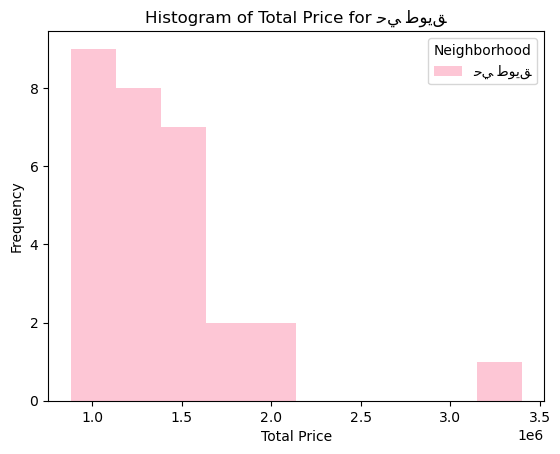

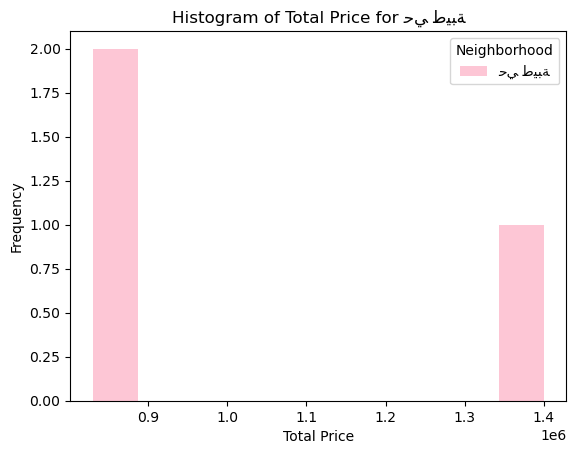

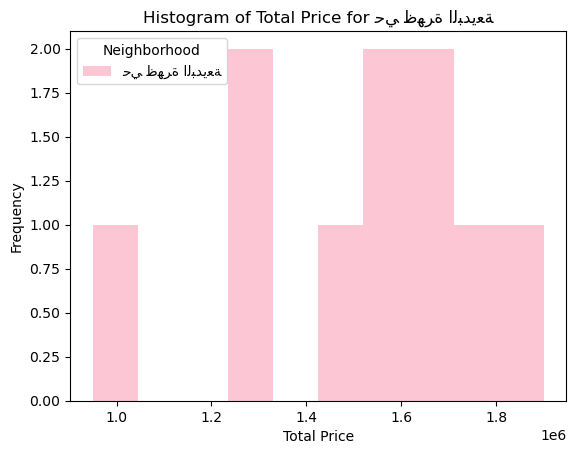

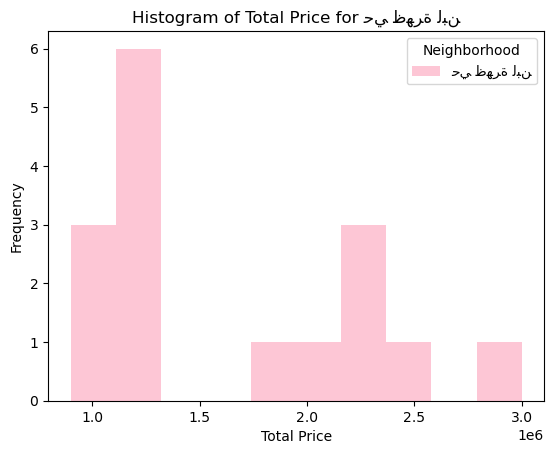

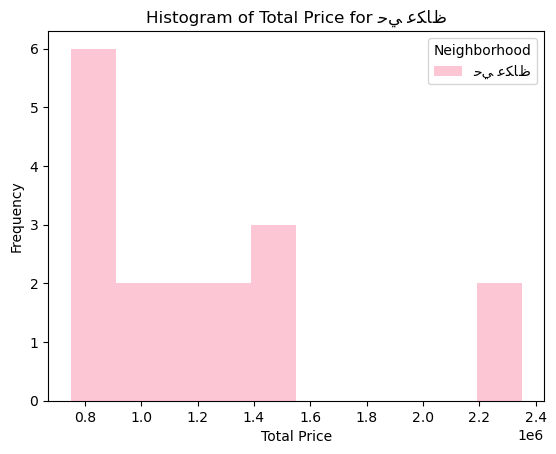

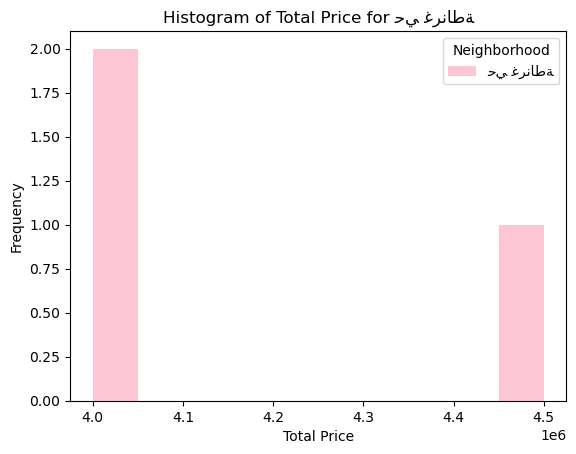

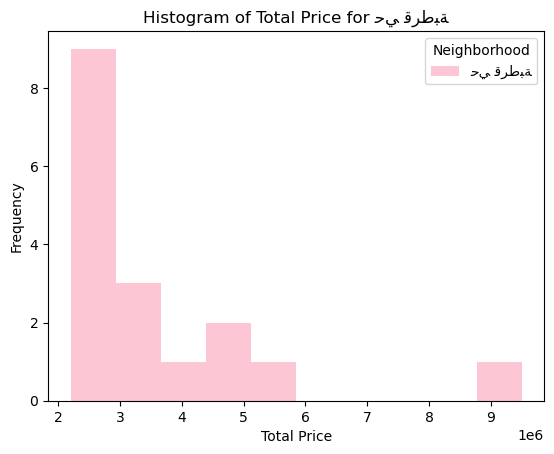

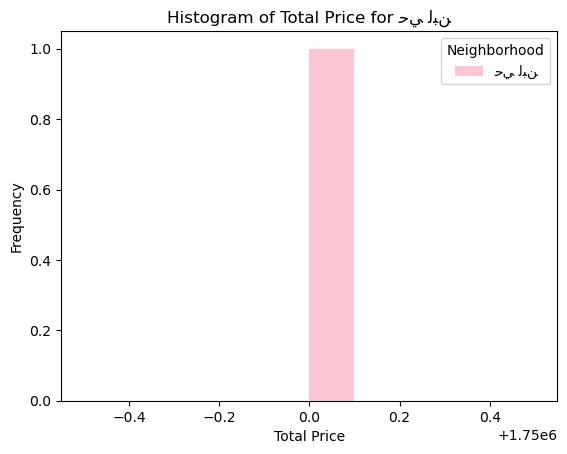

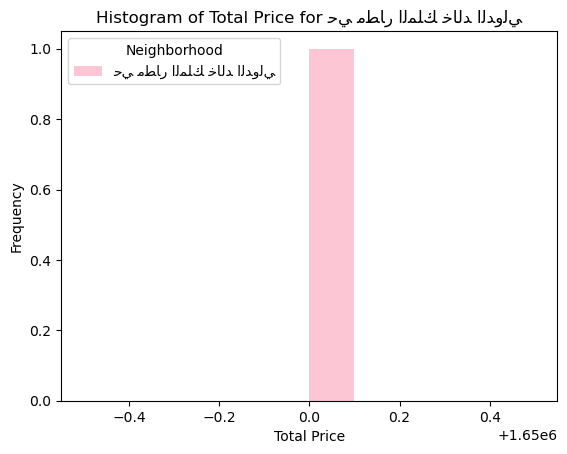

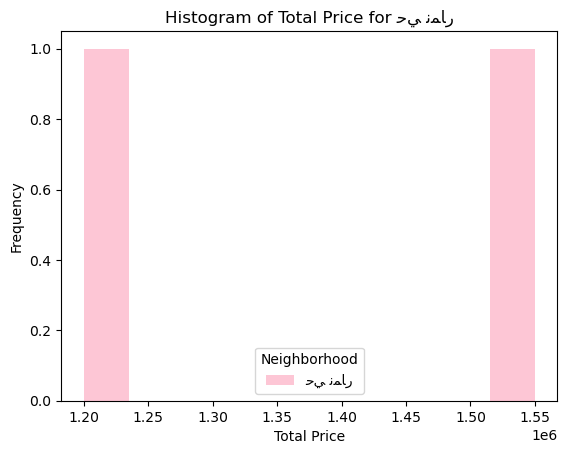

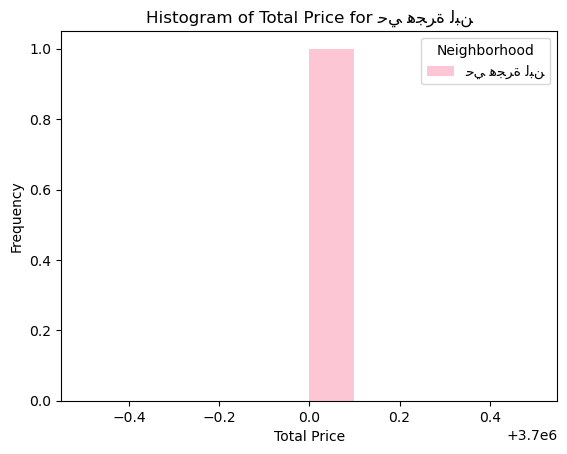

In [1133]:
grouped = villas_no_null.groupby('Neighborhood')
# Plot histograms for each group
for name, group in grouped:
    plt.hist(group['Total_Price'], bins=10, color='#fc8eac', alpha=0.5, label=name)
    plt.xlabel('Total Price')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Total Price for {name}')
    plt.legend(title='Neighborhood')
    plt.show()  

In [756]:
villas_no_null.dtypes

City                   object
Neighborhood           object
Facade                 object
Bedrooms               object
Living_Rooms           object
Baths                  object
Area                  float64
Living_Room_Stairs      int64
Kitchen                 int64
Maid_Room               int64
Drivers_Room            int64
Annex                   int64
Yard                    int64
Swimming_Pool           int64
Basement                int64
Car_Entrance            int64
Elevator                int64
Total_Price             int64
dtype: object

In [758]:
#villas_no_null = villas_no_null.astypes({
 #   'City': 'category', 
  #  'Neighborhood': 'category', 
  #  'Facade': 'category', 
  #  'Bedrooms': 'category', 
  #  'Living_Rooms': 'category', 
  #  'Baths': 'category',
   # 'Area': 'float', 
   # 'Living_Room_Stairs': 'int', 
  #  'Kitchen': 'category', 
  #  'Maid_Room': 'int', 
  #  'Drivers_Room': 'int',
 #   'Annex': 'int', 
  #  'Yard': 'int', 
   # 'Swimming_Pool': 'int', 
    #'Basement': 'int', 
    #'Car_Entrance': 'category',
    #'Elevator': 'category', 
    #'Total_Price': 'int'
#})


<img src="image-20240810-113731.png" width="" align="" />

# df_appartment:

In [762]:
df_apartments

City Neighborhood        Facade  Bedrooms  Living_Rooms Baths  Area  \
0    الرياض    حي المروج        جنوبية         4           1.0     3   249   
1    الرياض    حي العارض  شمالية غربية         3           1.0     3   199   
2    الرياض    حي النرجس           NaN         3           1.0     3   145   
3    الرياض    حي النرجس        شمالية         3           1.0     3   101   
4    الرياض  حي الياسمين         شرقية         4           1.0     3   147   
..      ...          ...           ...       ...           ...   ...   ...   
546  الرياض   حي الصحافة           NaN         3           1.0     3   201   
547  الرياض    حي المروج           NaN         3           1.0     3   127   
548  الرياض    حي الملقا         غربية         3           1.0     3   158   
549  الرياض  حي القيروان           NaN         2           1.0     3   120   
550  الرياض    حي الملقا        شمالية         4           1.0     3   104   

     Kitchen  Car_Entrance  Elevator Floor  Age  furnished  Total_Price  
0          1             0         1     3  0.0          0      1434000  
1          0             0         1  علوي  0.0          0       980000  
2          1             0         1  أرضي  2.0          0      1050000  
3          1             0         0  أرضي  0.0          1      1200000  
4          1             0         1  علوي  2.0          1      1200000  
..       ...           ...       ...   ...  ...        ...          ...  
546        1             0         1  علوي  9.0          0      1100000  
547        1             0         1     3  0.0          1      1600000  
548        1             0         1  علوي  0.0          0      1398000  
549        1             0         1  علوي  0.0          0       925000  
550        1             0         0  أرضي  0.0          0      1100000  

[551 rows x 14 columns]

In [764]:
# Propery type each row has same value 
# facade is important if we have information about building's street and face
df_apartments.drop(['Facade'],axis=1,inplace=True)

In [766]:
df_apartments.columns

Index(['City', 'Neighborhood', 'Bedrooms', 'Living_Rooms', 'Baths', 'Area',
       'Kitchen', 'Car_Entrance', 'Elevator', 'Floor', 'Age', 'furnished',
       'Total_Price'],
      dtype='object')

In [768]:
df_apartments['City'].unique()

array(['الرياض', 'منطقة الرياض', 'امارة منطقة الرياض'], dtype=object)

In [770]:
df_apartments.head(2)

City Neighborhood  Bedrooms  Living_Rooms Baths  Area  Kitchen  \
0  الرياض    حي المروج         4           1.0     3   249        1   
1  الرياض    حي العارض         3           1.0     3   199        0   

   Car_Entrance  Elevator Floor  Age  furnished  Total_Price  
0             0         1     3  0.0          0      1434000  
1             0         1  علوي  0.0          0       980000

In [772]:
# الرياض = امارة منطقة الرياض = منطقة الرياض  
df_apartments.loc[df_apartments['City'] == 'منطقة الرياض', 'City'] = "الرياض"
df_apartments.loc[df_apartments['City'] == 'امارة منطقة الرياض', 'City'] = "الرياض"

In [774]:
# all in here = الرياض
df_apartments.drop('City',axis=1, inplace= True)

In [776]:
df_apartments.head(2)

Neighborhood  Bedrooms  Living_Rooms Baths  Area  Kitchen  Car_Entrance  \
0    حي المروج         4           1.0     3   249        1             0   
1    حي العارض         3           1.0     3   199        0             0   

   Elevator Floor  Age  furnished  Total_Price  
0         1     3  0.0          0      1434000  
1         1  علوي  0.0          0       980000

In [778]:
# neighborhood
df_apartments['Neighborhood'].unique()

array(['حي المروج', 'حي العارض', 'حي النرجس', 'حي الياسمين', 'حي العقيق',
       'حي القيروان', 'حي الملقا', 'حي النخيل', 'الرياض', 'حي الصحافة',
       'حي النفل', 'حي حطين', 'حي الربيع', 'حي المصيف', 'حي العليا',
       'حي الفلاح', 'حي الندى', 'حي الملك فهد', 'حي الوادي', 'حي التعاون',
       'حي المغرزات', 'حي المرسلات', 'حي النزهة', '',
       'حي مطار الملك خالد الدولي'], dtype=object)

In [780]:
# null
df_apartments[df_apartments['Neighborhood'] == '']

Neighborhood  Bedrooms  Living_Rooms Baths  Area  Kitchen  Car_Entrance  \
326                      4           1.0     4   160        1             0   
362                      4           1.0     4   236        1             0   

     Elevator Floor  Age  furnished  Total_Price  
326         0   NaN  0.0          0      1380000  
362         1  علوي  7.0          0      1250000

In [782]:
df_apartments.drop(df_apartments[df_apartments['Neighborhood'] == ''].index, inplace= True)

In [784]:
df_apartments[df_apartments['Neighborhood'] == 'الرياض']

Neighborhood  Bedrooms  Living_Rooms Baths  Area  Kitchen  Car_Entrance  \
20        الرياض         2           1.0     3   135        0             0   
33        الرياض         3           1.0     4   166        1             0   
44        الرياض         1           NaN     4   178        1             0   
56        الرياض         3           1.0     2   104        1             1   
63        الرياض         4           1.0     3   151        1             1   
79        الرياض         4           1.0     3   140        0             1   
82        الرياض         3           1.0     2   104        1             1   
87        الرياض         3           1.0     3   134        0             1   
88        الرياض         3           1.0    5+   428        1             0   
90        الرياض         3           1.0     2   104        0             1   
98        الرياض         4           1.0     3   126        1             0   
101       الرياض         3           2.0     3   130        1             0   
116       الرياض         3           1.0     3   163        0             0   
130       الرياض         3           2.0     2   176        1             1   
138       الرياض         4           1.0     3   134        1             1   
140       الرياض         1           NaN     3   151        0             0   
151       الرياض         4           1.0    5+   181        0             0   
167       الرياض         3           1.0     4   181        1             1   
198       الرياض         3           1.0     3   195        1             1   
207       الرياض         3           2.0     3   149        1             0   
223       الرياض         3           1.0     3   147        0             0   
234       الرياض         3           2.0     3   146        1             0   
237       الرياض         4           1.0     4   151        0             0   
247       الرياض         3           1.0     3   147        0             0   
254       الرياض         4           1.0     3   181        0             0   
255       الرياض         1           NaN     3   151        0             0   
265       الرياض         3           1.0     3   129        1             0   
266       الرياض         3           2.0     3   149        1             0   
268       الرياض         4           1.0     3   126        1             0   
275       الرياض         4           1.0    5+   181        0             0   
280       الرياض         3           2.0     3   130        1             0   
285       الرياض         1           1.0     2    81        0             1   
327       الرياض         3           1.0     2   130        1             0   
331       الرياض         4           1.0     4   163        1             1   
343       الرياض         3           1.0     3   139        1             1   
347       الرياض         3           2.0     3   138        1             0   
355       الرياض         3           1.0     3   187        1             0   
364       الرياض         3           1.0     3   134        0             1   
389       الرياض         2           1.0     2   151        1             0   
390       الرياض         4           2.0     3   137        0             1   
394       الرياض         4           1.0     3   151        1             1   
403       الرياض         4           2.0     4   190        1             0   
406       الرياض         3           1.0     3   134        0             1   
410       الرياض         3           1.0     3   195        1             1   
420       الرياض         3           1.0     3   111        0             0   
426       الرياض         4           1.0    5+   143        1             1   
427       الرياض         3           1.0     3   139        1             1   
428       الرياض         1           1.0     2    81        0             1   
450       الرياض         3           1.0     2   104        1             1   
452       الرياض         4           1.0     4   151  

In [786]:
# update value to unknown
df_apartments.loc[df_apartments['Neighborhood'] == 'الرياض', 'Neighborhood'] = 'unknown'

In [788]:
df_apartments['Neighborhood'].unique()

array(['حي المروج', 'حي العارض', 'حي النرجس', 'حي الياسمين', 'حي العقيق',
       'حي القيروان', 'حي الملقا', 'حي النخيل', 'unknown', 'حي الصحافة',
       'حي النفل', 'حي حطين', 'حي الربيع', 'حي المصيف', 'حي العليا',
       'حي الفلاح', 'حي الندى', 'حي الملك فهد', 'حي الوادي', 'حي التعاون',
       'حي المغرزات', 'حي المرسلات', 'حي النزهة',
       'حي مطار الملك خالد الدولي'], dtype=object)

In [790]:
#num_rooms
df_apartments['Bedrooms'].unique()

array([4, 3, 2, 1, 5, 6], dtype=int64)

In [792]:
#num_living_rooms
df_apartments['Living_Rooms'].unique()

array([ 1.,  2., nan,  3.])

In [794]:
#depandent on new order by government
df_apartments['Living_Rooms'].fillna(1, inplace=True)

C:\Users\almal\AppData\Local\Temp\ipykernel_6968\3667013812.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_apartments['Living_Rooms'].fillna(1, inplace=True)


In [796]:
df_apartments['Living_Rooms'].unique()

array([1., 2., 3.])

In [798]:
#num_bathrooms
df_apartments['Baths'].unique()

array(['3', '2', '4', '5+', '1'], dtype=object)

In [800]:
df_apartments[df_apartments['Baths'] == '5+']

Neighborhood  Bedrooms  Living_Rooms Baths  Area  Kitchen  Car_Entrance  \
48   حي الياسمين         4           2.0    5+   178        1             1   
65     حي العليا         4           2.0    5+   217        1             1   
88       unknown         3           1.0    5+   428        1             0   
121    حي النرجس         3           2.0    5+   226        1             1   
124    حي النخيل         3           2.0    5+   216        1             0   
134    حي النرجس         3           2.0    5+   226        1             1   
151      unknown         4           1.0    5+   181        0             0   
159  حي الياسمين         6           1.0    5+   180        1             0   
232    حي النخيل         3           2.0    5+   216        1             0   
275      unknown         4           1.0    5+   181        0             0   
314  حي الياسمين         4           3.0    5+   152        1             1   
351    حي الملقا         3           2.0    5+   248        1             0   
426      unknown         4           1.0    5+   143        1             1   
433    حي النرجس         4           2.0    5+   214        1             1   
441    حي الملقا         3           2.0    5+   248        1             0   

     Elevator Floor   Age  furnished  Total_Price  
48          1  علوي   0.0          0       900000  
65          1   NaN   5.0          1      3500000  
88          0  علوي   0.0          0      1650000  
121         0  أرضي   8.0          0      1650000  
124         1  أرضي   3.0          0      1200000  
134         0  أرضي   8.0          0      1650000  
151         1  علوي   0.0          0      1300000  
159         0  أرضي  10.0          1      1100000  
232         1  أرضي   3.0          0      1200000  
275         1  علوي   0.0          0      1300000  
314         1  علوي  12.0          1      1300000  
351         1     3   0.0          0      1742500  
426         1  علوي   0.0          0      1000000  
433         1     3   0.0          0      1385000  
441         1     3   0.0          0      1742500

In [802]:
df_apartments.loc[df_apartments['Baths'] == '5+', 'Baths'] = 5

In [804]:
##area
df_apartments['Area'].unique()

array([249, 199, 145, 101, 147, 118, 112, 100, 170, 115, 150, 157, 124,
       140, 134, 120, 116, 135, 142, 201, 167, 228, 178, 104, 185, 129,
       131, 259, 121, 166, 155, 117, 137, 174, 264, 139, 123, 220, 143,
       222, 161, 188, 216,  94, 176, 103, 151, 217, 240, 214, 132, 148,
       109, 200, 114, 210, 428, 204, 169, 341, 126, 232, 130, 107,  93,
       256, 113,  61, 163, 168, 226, 218,  86, 172, 212,  81, 133, 181,
       203, 180, 179, 190, 154, 128, 138, 280, 144, 162, 195, 141, 149,
       241, 153, 119, 191, 160, 146, 158, 110, 156, 108, 136, 258, 111,
       152, 159, 189, 125, 248, 187, 255, 164, 230,  43, 106, 238, 254,
       219,  90, 127, 196, 307, 182, 250, 298, 175,  92,  89, 171],
      dtype=int64)

In [806]:
##kitchen
df_apartments['Kitchen'].unique()

array([1, 0], dtype=int64)

In [808]:
df_apartments['Kitchen'].isnull().sum()

0

In [810]:
##Car_Entrance
df_apartments['Car_Entrance'].isnull().sum()

0

In [812]:
df_apartments['Car_Entrance'].unique()

array([0, 1], dtype=int64)

In [814]:
##Elevator
df_apartments['Elevator'].isnull().sum()

0

In [816]:
df_apartments['Elevator'].unique()

array([1, 0], dtype=int64)

In [818]:
##floor
df_apartments['Floor'].isnull().sum()

73

In [820]:
df_apartments[df_apartments['Floor'].isnull()]

Neighborhood  Bedrooms  Living_Rooms Baths  Area  Kitchen  Car_Entrance  \
9      حي العقيق         3           1.0     3   115        0             1   
14     حي الملقا         3           1.0     3   134        1             0   
20       unknown         2           1.0     3   135        0             0   
21    حي الصحافة         2           1.0     3   142        1             1   
23     حي العارض         3           2.0     3   167        1             1   
..           ...       ...           ...   ...   ...      ...           ...   
480    حي النرجس         2           1.0     2   130        0             0   
486    حي الملقا         4           1.0     3   124        0             0   
517    حي النرجس         2           1.0     3   170        1             0   
519    حي الملقا         1           1.0     3   125        0             0   
523    حي العارض         3           2.0     3   147        1             1   

     Elevator Floor   Age  furnished  Total_Price  
9           1   NaN  11.0          0      1100000  
14          1   NaN   1.0          0      1320000  
20          0   NaN   0.0          0      1375000  
21          1   NaN   7.0          0      1980000  
23          0   NaN   0.0          1       990000  
..        ...   ...   ...        ...          ...  
480         1   NaN   0.0          0       782000  
486         1   NaN   0.0          0       959000  
517         1   NaN   0.0          0       930000  
519         0   NaN   8.0          0      1100000  
523         1   NaN   0.0          0       959000  

[73 rows x 12 columns]

In [822]:
df_apartments['Floor'].unique()

array(['3', 'علوي', 'أرضي', 'ثالث', nan, '4', 'ثاني', 'دور 59', 'ارضي',
       '20+', 'اول'], dtype=object)

In [824]:
df_apartments[df_apartments['Floor'] =='20+' ]

Neighborhood  Bedrooms  Living_Rooms Baths  Area  Kitchen  Car_Entrance  \
167      unknown         3           1.0     4   181        1             1   
285      unknown         1           1.0     2    81        0             1   
428      unknown         1           1.0     2    81        0             1   
530      unknown         1           1.0     2    89        1             1   
533   حي الصحافة         4           1.0     3   171        1             0   

     Elevator Floor  Age  furnished  Total_Price  
167         1   20+  0.0          1      2550000  
285         1   20+  3.0          0      1700000  
428         1   20+  3.0          0      1700000  
530         0   20+  9.0          1      1680000  
533         1   20+  0.0          0      1600000

In [826]:
df_apartments[df_apartments['Floor'] == "دور 59" ]

Neighborhood  Bedrooms  Living_Rooms Baths  Area  Kitchen  Car_Entrance  \
47   حي الصحافة         3           1.0     3   143        0             0   

    Elevator   Floor  Age  furnished  Total_Price  
47         0  دور 59  9.0          1      2630000

In [828]:
df_apartments[df_apartments['Floor'] == "ارضي" ]

Neighborhood  Bedrooms  Living_Rooms Baths  Area  Kitchen  Car_Entrance  \
67     حي العارض         3           1.0     3   120        1             1   
95     حي العارض         3           1.0     4   341        0             0   
97     حي العارض         3           1.0     3   120        1             1   
150    حي العارض         3           1.0     3   126        0             1   
284    حي النرجس         4           1.0     4   156        0             0   
340    حي الملقا         3           1.0     2   139        0             0   
461    حي النرجس         3           1.0     3   145        1             1   
541      حي حطين         4           1.0     3   156        1             1   

     Elevator Floor   Age  furnished  Total_Price  
67          1  ارضي   0.0          0      1000000  
95          0  ارضي   0.0          0      1450000  
97          1  ارضي   0.0          0      1100000  
150         0  ارضي   0.0          0       900000  
284         0  ارضي   0.0          0      1000000  
340         0  ارضي  11.0          0       800000  
461         0  ارضي   0.0          0      1099000  
541         0  ارضي   9.0          0      1200000

In [830]:
df_apartments[df_apartments['Floor'] == "أرضي" ].shape

(178, 12)

In [832]:
df_apartments[df_apartments['Floor'] == "علوي" ].shape

(169, 12)

In [834]:
#73 null
#5 floor 20
#1 floor 59
#186 ارضي
#169 علوي

# 80% some form of null

In [836]:
df_apartments.drop('Floor',axis=1, inplace=True)

In [838]:
#age
df_apartments['Age'].isnull().sum()

1

In [840]:
df_apartments[df_apartments['Age'].isnull()]

Neighborhood  Bedrooms  Living_Rooms Baths  Area  Kitchen  Car_Entrance  \
8    حي النرجس         3           1.0     3   170        1             0   

   Elevator  Age  furnished  Total_Price  
8         1  NaN          1       930000

In [842]:
# by mean in narjis
df_apartments['Age'].fillna(4,inplace=True)

C:\Users\almal\AppData\Local\Temp\ipykernel_6968\3555922327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_apartments['Age'].fillna(4,inplace=True)


In [844]:
df_apartments[df_apartments['Neighborhood'] == "حي النرجس"]

Neighborhood  Bedrooms  Living_Rooms Baths  Area  Kitchen  Car_Entrance  \
2      حي النرجس         3           1.0     3   145        1             0   
3      حي النرجس         3           1.0     3   101        1             0   
6      حي النرجس         3           1.0     3   112        1             0   
7      حي النرجس         2           1.0     3   100        1             0   
8      حي النرجس         3           1.0     3   170        1             0   
..           ...       ...           ...   ...   ...      ...           ...   
517    حي النرجس         2           1.0     3   170        1             0   
525    حي النرجس         3           1.0     4   178        1             0   
529    حي النرجس         2           2.0     3   164        1             0   
538    حي النرجس         3           2.0     3   167        1             0   
545    حي النرجس         2           1.0     3   100        1             0   

     Elevator  Age  furnished  Total_Price  
2           1  2.0          0      1050000  
3           0  0.0          1      1200000  
6           0  0.0          0       885000  
7           1  0.0          0      1200000  
8           1  4.0          1       930000  
..        ...  ...        ...          ...  
517         1  0.0          0       930000  
525         1  0.0          0       900000  
529         1  0.0          0      1200000  
538         1  0.0          0      1200000  
545         1  0.0          1      1150000  

[134 rows x 11 columns]

In [846]:
#furnished
df_apartments['furnished'].unique()

array([0, 1], dtype=int64)

In [848]:
#price
print(df_apartments['Total_Price'].min())
print(df_apartments['Total_Price'].max())

700000
3500000


In [850]:
#acc

In [852]:
df_apartments.dtypes

Neighborhood     object
Bedrooms          int64
Living_Rooms    float64
Baths            object
Area              int64
Kitchen           int64
Car_Entrance      int64
Elevator          int64
Age             float64
furnished         int64
Total_Price       int64
dtype: object

In [854]:
df_apartments = df_apartments.astype({'Bedrooms' :'int', 'Baths':'int',
                     'Kitchen':'category', 'Car_Entrance':'category',
                     'Elevator':'category','furnished':'category', 
                                     'Age':'int'})

In [856]:
df_apartments.dtypes

Neighborhood      object
Bedrooms           int32
Living_Rooms     float64
Baths              int32
Area               int64
Kitchen         category
Car_Entrance    category
Elevator        category
Age                int32
furnished       category
Total_Price        int64
dtype: object

In [858]:
#back to neighborhood
df_apartments [df_apartments['Neighborhood']!='الرياض'] 

Neighborhood  Bedrooms  Living_Rooms  Baths  Area Kitchen Car_Entrance  \
0      حي المروج         4           1.0      3   249       1            0   
1      حي العارض         3           1.0      3   199       0            0   
2      حي النرجس         3           1.0      3   145       1            0   
3      حي النرجس         3           1.0      3   101       1            0   
4    حي الياسمين         4           1.0      3   147       1            0   
..           ...       ...           ...    ...   ...     ...          ...   
546   حي الصحافة         3           1.0      3   201       1            0   
547    حي المروج         3           1.0      3   127       1            0   
548    حي الملقا         3           1.0      3   158       1            0   
549  حي القيروان         2           1.0      3   120       1            0   
550    حي الملقا         4           1.0      3   104       1            0   

    Elevator  Age furnished  Total_Price  
0          1    0         0      1434000  
1          1    0         0       980000  
2          1    2         0      1050000  
3          0    0         1      1200000  
4          1    2         1      1200000  
..       ...  ...       ...          ...  
546        1    9         0      1100000  
547        1    0         1      1600000  
548        1    0         0      1398000  
549        1    0         0       925000  
550        0    0         0      1100000  

[549 rows x 11 columns]

In [860]:
df_apartments_with_miss_neighborhood = df_apartments
df_apartments_no_miss_neighborhood = df_apartments [df_apartments['Neighborhood']!='الرياض'] 

In [1127]:
df_apartments_no_miss_neighborhood ['Neighborhood'] =df_apartments_no_miss_neighborhood ['Neighborhood'].apply(arabic_text)

In [862]:
#OUT LAIER 

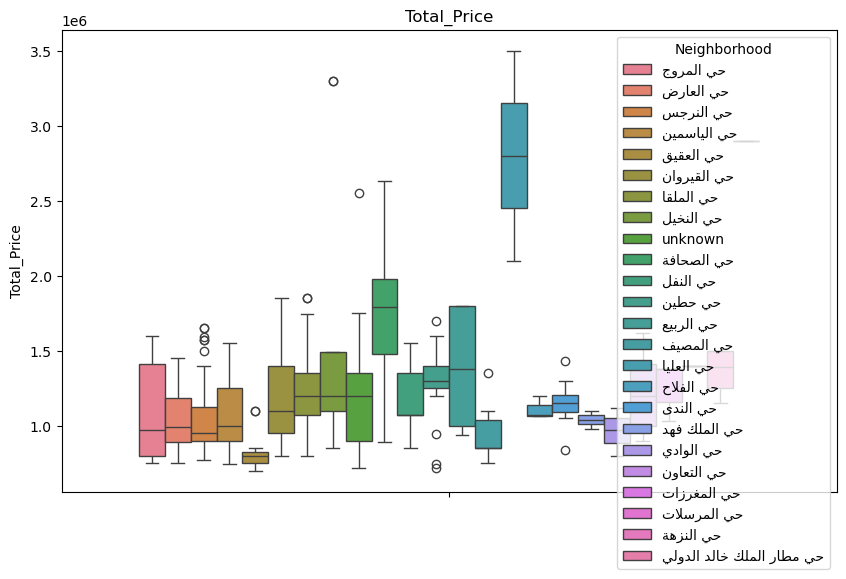

In [1129]:
plt.figure(figsize=(10, 6))
sns.boxplot(y= 'Total_Price' ,hue='Neighborhood', data=df_apartments_no_miss_neighborhood)
plt.title('Total_Price')
plt.show()

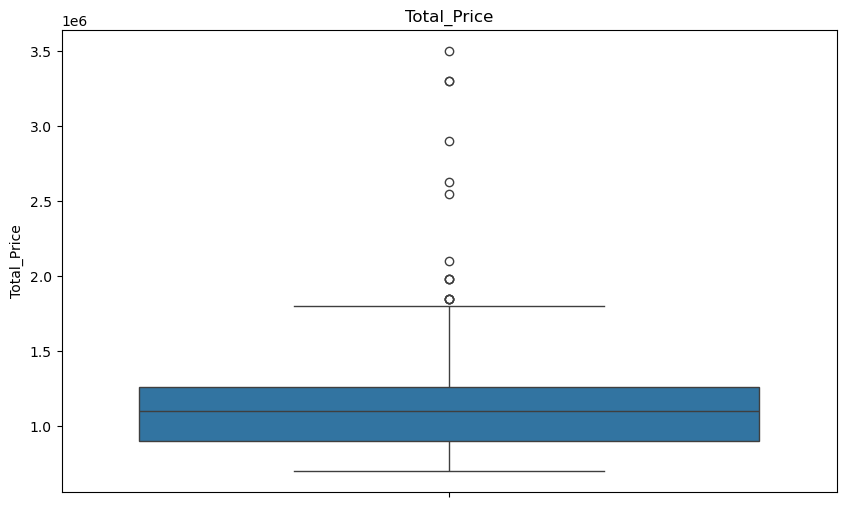

In [866]:
plt.figure(figsize=(10, 6))
sns.boxplot(y= 'Total_Price' , data=df_apartments_with_miss_neighborhood)
plt.title('Total_Price')
plt.show()

In [868]:
df_apartments_no_miss_neighborhood.shape

(549, 11)

In [443]:
# here we did cut the outliers that we assume it will affect our analysis using IQR 
hue_column = 'Neighborhood'
filtered_df_appartment_no_miss_neighborhood = df_apartments_no_miss_neighborhood.copy()

for group in df_apartments[hue_column].unique():
    group_df = df_apartments_no_miss_neighborhood[df_apartments_no_miss_neighborhood[hue_column] == group]
    
    speed_Q1 = group_df['Total_Price'].quantile(0.25)
    speed_Q3 = group_df['Total_Price'].quantile(0.75)

    speed_IQR = speed_Q3 - speed_Q1


    speed_lower_bound = speed_Q1 - 1.5 * speed_IQR
    speed_upper_bound = speed_Q3 + 1.5 * speed_IQR

    # filter on data
    filtered_df_appartment_no_miss_neighborhood = filtered_df_appartment_no_miss_neighborhood[
    (filtered_df_appartment_no_miss_neighborhood[hue_column] != group) | 
        ((filtered_df_appartment_no_miss_neighborhood['Total_Price'] >= speed_lower_bound) & (filtered_df_appartment_no_miss_neighborhood['Total_Price'] <= speed_upper_bound))
    ]

In [871]:
filtered_df_appartment_no_miss_neighborhood.shape

(529, 11)

### Hatoon + Ashwag: 

- [ ]  Outliers 

- [ ] Visualizations 

In [876]:
# Hatoon + Ashwag works: 
# Here we will do univarient and BI/Multi varient analysis with visualizing the variebles that seems to have an effection of our data

###  Visualizing Villas dataset: 


In [879]:
villas_no_null.head()

City Neighborhood  Facade Bedrooms Living_Rooms Baths   Area  \
0  الرياض    حي العارض  جنوبية        6            3    5+  244.0   
1  الرياض    حي العارض  جنوبية        6            4    5+  322.0   
2  الرياض    حي العارض  جنوبية        3            2    5+  350.0   
3  الرياض    حي النرجس  جنوبية        4            4     4  350.0   
4  الرياض    حي العارض   غربية        4            1    5+  270.0   

   Living_Room_Stairs  Kitchen  Maid_Room  Drivers_Room  Annex  Yard  \
0                   1        1          1             1      0     1   
1                   1        1          1             1      1     1   
2                   1        0          1             0      1     0   
3                   1        1          1             0      0     1   
4                   1        1          1             1      0     0   

   Swimming_Pool  Basement  Car_Entrance  Elevator  Total_Price  
0              0         0             1         1      2300000  
1              0         0             1         1      3000000  
2              0         1             1         1      2600000  
3              0         1             1         1      2600000  
4              0         0             1         0      2800000

In [881]:
neigh_counts = villas_no_null['Neighborhood'].value_counts()
front_counts = villas_no_null['Facade'].value_counts()

In [883]:
# this code will apply the reshaping arabix text of column city using the reshaping function
neigh_labels = [arabic_text(neigh) for neigh in neigh_counts.index] # for neighborhood names
front_labels = [arabic_text(front) for front in front_counts.index] # for fronts names

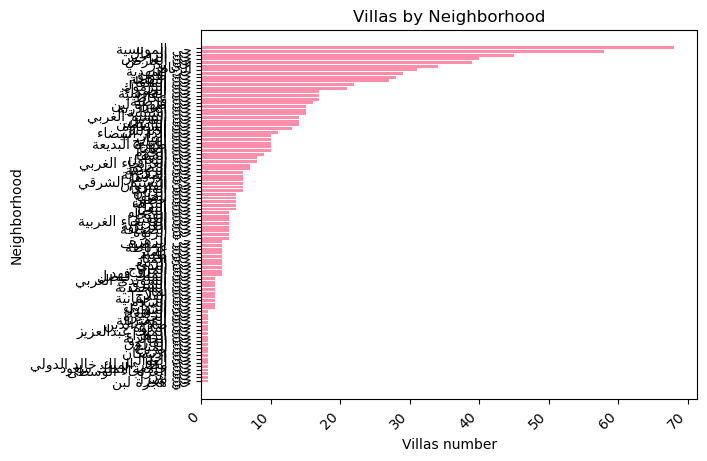

In [885]:
# here we can see number of villas by their neighborhood, i know it's not readable but just to see the results
# it seems most of the entries for villas neighborhood is Riyadh not the name of a neighborhood
plt.barh(neigh_labels, neigh_counts.values, color=('#fc8eac'))
plt.title('Villas by Neighborhood')
plt.xlabel('Villas number')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.show()

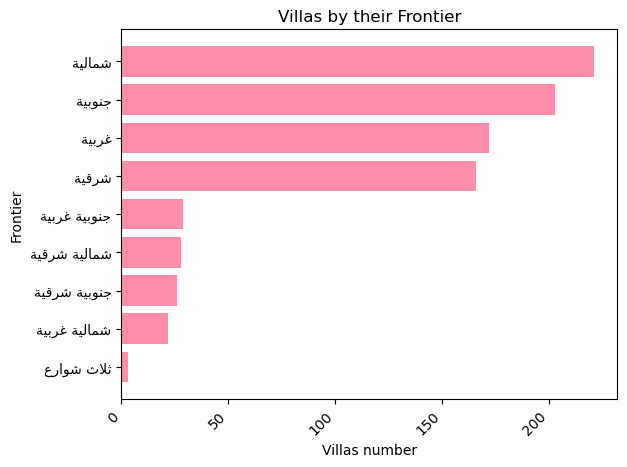

In [887]:
# here we can see number of villas by their frontier, like if you will buy a villa within two streets on one and the side of it
# it seems most of the entries for villas frontiers are norht and the south is a little close to it
plt.barh(front_labels, front_counts.values, color=('#fc8eac'))
plt.title('Villas by their Frontier')
plt.xlabel('Villas number')
plt.ylabel('Frontier')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.show()

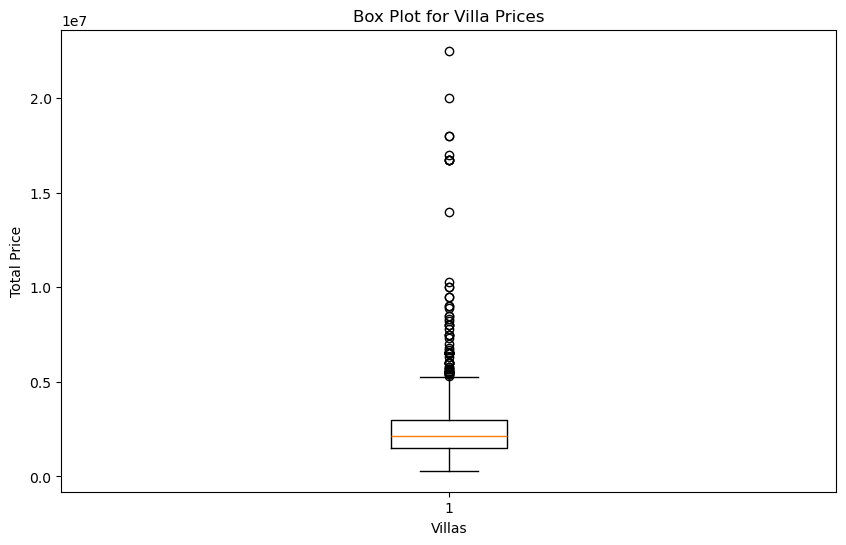

In [889]:
# Box plot for the 'Total_Price'of Villas
plt.figure(figsize=(10, 6))
plt.boxplot(df_villas['Total_Price'].dropna(), vert=True)
plt.title('Box Plot for Villa Prices')
plt.ylabel('Total Price')
plt.xlabel('Villas')
plt.show()

<Axes: >

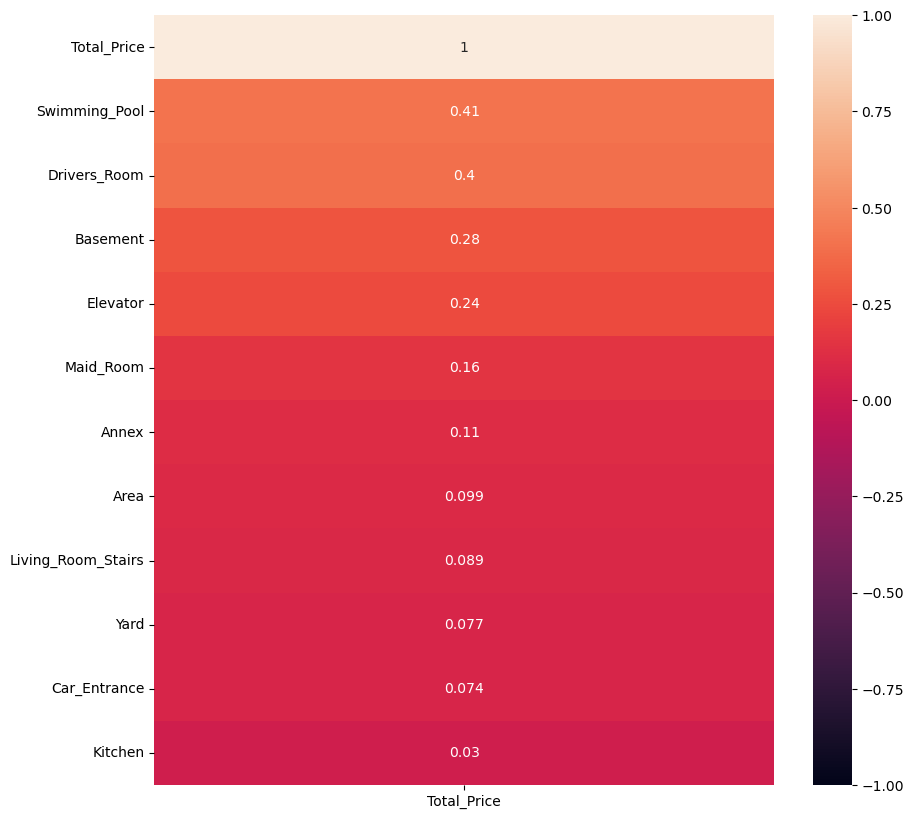

In [891]:
# villas heatmap between the effect of price and all numeric values
# driver room and swimming pool mostly are the ones that affect the price for villas
numeric =  df_villas.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(numeric.corr()[['Total_Price']].sort_values('Total_Price', ascending = False),
vmin = -1, vmax = +1, annot = True, ax = ax)

In [893]:
corr_matrix = df_villas.select_dtypes(include=np.number).corr()
corr_matrix

Area  Living_Room_Stairs   Kitchen  Maid_Room  \
Area                1.000000           -0.041742 -0.022656   0.036861   
Living_Room_Stairs -0.041742            1.000000  0.321434   0.511582   
Kitchen            -0.022656            0.321434  1.000000   0.410487   
Maid_Room           0.036861            0.511582  0.410487   1.000000   
Drivers_Room        0.094348            0.152483  0.213696   0.390835   
Annex               0.011628            0.276255  0.393326   0.372254   
Yard                0.025737            0.361036  0.473973   0.452126   
Swimming_Pool       0.026416            0.115884  0.126888   0.161409   
Basement            0.024356            0.102302  0.058860   0.081694   
Car_Entrance        0.009927            0.464741  0.515724   0.570077   
Elevator           -0.033404            0.330264  0.123481   0.253086   
Total_Price         0.098525            0.088730  0.029867   0.155774   

                    Drivers_Room     Annex      Yard  Swimming_Pool  Basement  \
Area                    0.094348  0.011628  0.025737       0.026416  0.024356   
Living_Room_Stairs      0.152483  0.276255  0.361036       0.115884  0.102302   
Kitchen                 0.213696  0.393326  0.473973       0.126888  0.058860   
Maid_Room               0.390835  0.372254  0.452126       0.161409  0.081694   
Drivers_Room            1.000000  0.148998  0.236206       0.295391  0.148944   
Annex                   0.148998  1.000000  0.453039       0.133568  0.043105   
Yard                    0.236206  0.453039  1.000000       0.137406  0.097644   
Swimming_Pool           0.295391  0.133568  0.137406       1.000000  0.233737   
Basement                0.148944  0.043105  0.097644       0.233737  1.000000   
Car_Entrance            0.290497  0.480282  0.636544       0.134353  0.076238   
Elevator                0.174762  0.129535  0.196359       0.222393  0.098114   
Total_Price             0.395087  0.112931  0.076798       0.406799  0.281563   

                    Car_Entrance  Elevator  Total_Price  
Area                    0.009927 -0.033404     0.098525  
Living_Room_Stairs      0.464741  0.330264     0.088730  
Kitchen                 0.515724  0.123481     0.029867  
Maid_Room               0.570077  0.253086     0.155774  
Drivers_Room            0.290497  0.174762     0.395087  
Annex                   0.480282  0.129535     0.112931  
Yard                    0.636544  0.196359     0.076798  
Swimming_Pool           0.134353  0.222393     0.406799  
Basement                0.076238  0.098114     0.281563  
Car_Entrance            1.000000  0.266974     0.073775  
Elevator                0.266974  1.000000     0.243254  
Total_Price             0.073775  0.243254     1.000000

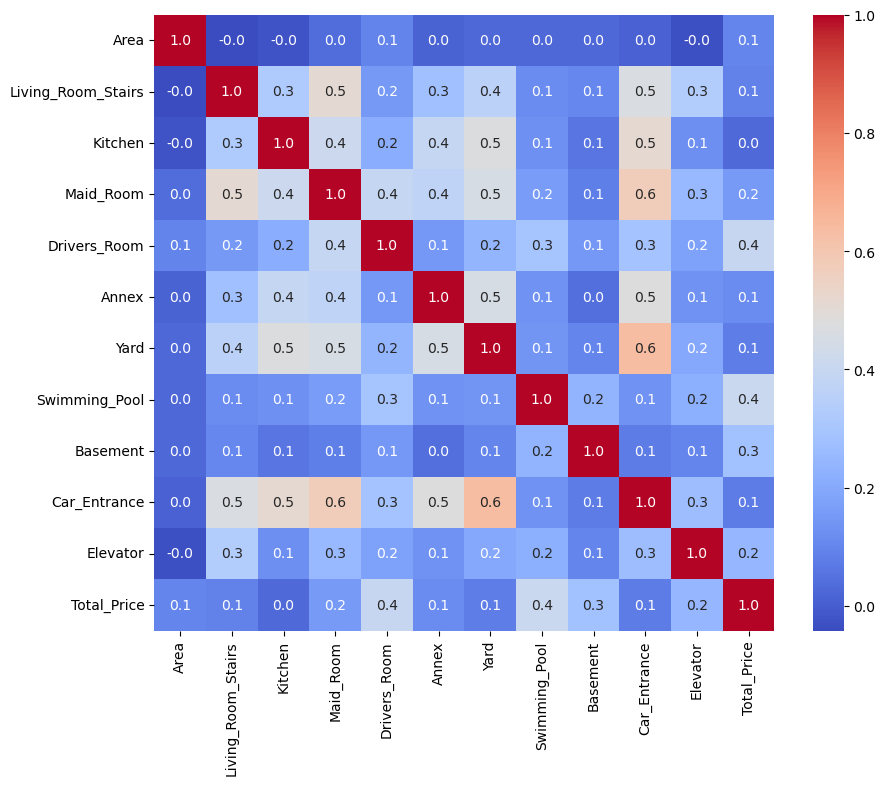

In [895]:
# another heatmap for villas
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

plt.show()

In [897]:
# average price in each neighborhood
average_price_villas = df_villas.groupby('Neighborhood')['Total_Price'].mean()
average_price_villas

Neighborhood
                             1.327500e+06
الرياض                       1.983522e+06
العيينة                      1.875385e+06
القرينه                      1.600000e+06
حي احد                       1.040000e+06
                                 ...     
حي قرطبة                     4.528261e+06
حي لبن                       1.750000e+06
حي مطار الملك خالد الدولي    1.650000e+06
حي نمار                      1.375000e+06
حي هجرة لبن                  3.700000e+06
Name: Total_Price, Length: 95, dtype: float64

In [899]:
# average most expencive neighborhoods

# it looks here that Alnakheel is the most expensive one
top_five = average_price_villas.nlargest(5)
top_five.sort_values(ascending=False)

Neighborhood
حي النخيل        9.857143e+06
حي صلاح الدين    7.500000e+06
حي الندى         7.375000e+06
حي الملقا        6.583333e+06
حي النزهة        6.158333e+06
Name: Total_Price, dtype: float64

In [901]:
# reshaping the arabic text
top5_labels = [arabic_text(label) for label in top_five.index]

<function matplotlib.pyplot.show(close=None, block=None)>

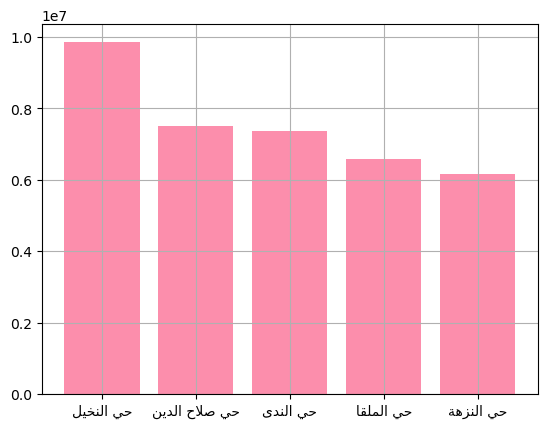

In [903]:
# displaying the top 5 of most expensive neighborhoods for villas
plt.bar(top5_labels,
        top_five.values,
        color=('#fc8eac')
       )
plt.grid()
plt.show

# there is something not correct here, it looks that Alnakeel is the most expensive

In [905]:
# average of lowest neighborhood prices
# it looks like Almanaq is the least expensive neighborhood
bottom_five = average_price_villas.nsmallest(5)
bottom_five.sort_values(ascending=False)

Neighborhood
حي احد              1.040000e+06
حي طيبة             1.026667e+06
حي الدار البيضاء    1.024545e+06
حي بدر              9.470000e+05
حي المناخ           8.700000e+05
Name: Total_Price, dtype: float64

In [907]:
# reshaping arabic text 
bottom5_labels = [arabic_text(label) for label in bottom_five.index]

<function matplotlib.pyplot.show(close=None, block=None)>

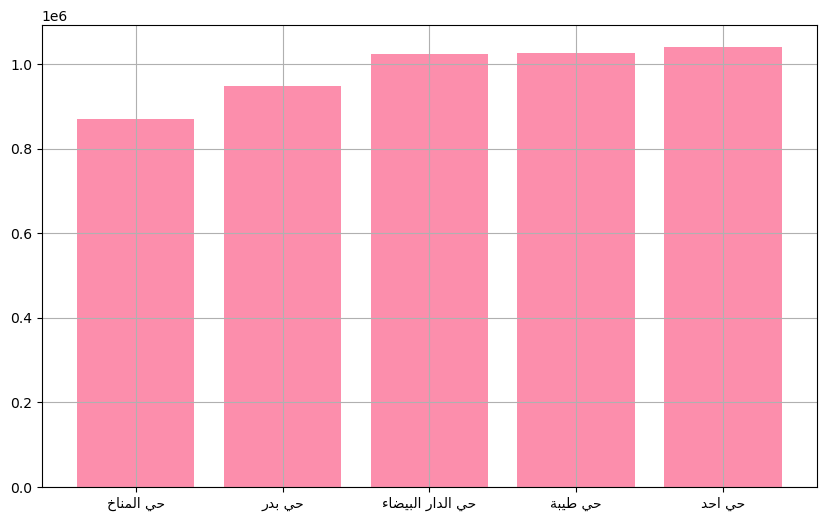

In [909]:
# displaying the bottom 5 of least expensive neighborhoods for villas
plt.figure(figsize=(10,6))
plt.bar(bottom5_labels,
        bottom_five.values,
        color=('#fc8eac')
       )
plt.grid()
plt.show

In [911]:
# reshaping arabic text for visualization
villas_no_null['Neighborhood'] = villas_no_null['Neighborhood'].apply(arabic_text) 
Most_expensive = villas_no_null.nlargest(50, 'Total_Price')


<Axes: xlabel='Total_Price', ylabel='Count'>

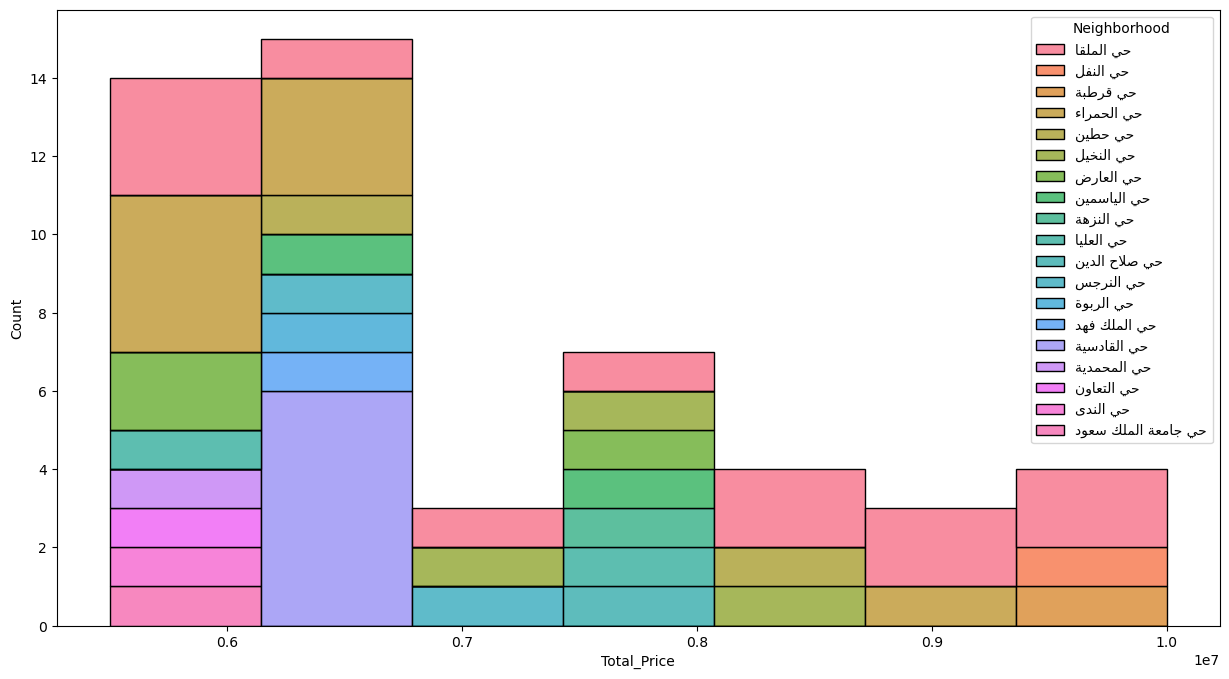

In [913]:
# Stacked Histogram for most expensive neighborhood prices
plt.figure(figsize=(15,8))
sns.histplot(
    Most_expensive,
    x="Total_Price",
    hue="Neighborhood", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

In [915]:
Least_expensive = villas_no_null.nsmallest(50, 'Total_Price')
Least_expensive

City         Neighborhood        Facade Bedrooms Living_Rooms Baths  \
690  الرياض     ﺀﺎﻀﻴﺒﻟﺍ ﺭﺍﺪﻟﺍ ﻲﺣ        شمالية        4            1     3   
634  الرياض               ﺭﺪﺑ ﻲﺣ         شرقية        4            1     4   
629  الرياض             ﺎﻔﺸﻟﺍ ﻲﺣ         شرقية       7+            1    5+   
603  الرياض              ﻅﺎﻜﻋ ﻲﺣ        شمالية        4            1     3   
604  الرياض               ﺭﺪﺑ ﻲﺣ         شرقية       7+            2    5+   
607  الرياض               ﺭﺪﺑ ﻲﺣ        شمالية        4            2     4   
608  الرياض             ﺎﻔﺸﻟﺍ ﻲﺣ         غربية        5            1    5+   
611  الرياض               ﺭﺪﺑ ﻲﺣ        شمالية        5            5    5+   
616  الرياض             ﺎﻔﺸﻟﺍ ﻲﺣ         غربية        5            1    5+   
655  الرياض     ﺀﺎﻀﻴﺒﻟﺍ ﺭﺍﺪﻟﺍ ﻲﺣ        شمالية        5            1    5+   
650  الرياض               ﺭﺪﺑ ﻲﺣ        شمالية        3            1     3   
651  الرياض               ﺭﺪﺑ ﻲﺣ        شمالية        3            1     4   
647  الرياض               ﺭﺪﺑ ﻲﺣ         غربية        5            3    5+   
677  الرياض               ﺭﺪﺑ ﻲﺣ         شرقية        5            2    5+   
672  الرياض              ﻅﺎﻜﻋ ﻲﺣ        جنوبية        3            1     4   
649  الرياض               ﺽﺎﻳﺮﻟﺍ         غربية        5            2    5+   
661  الرياض               ﺽﺎﻳﺮﻟﺍ         غربية        5            2    5+   
668  الرياض               ﺽﺎﻳﺮﻟﺍ         شرقية        5            2    5+   
685  الرياض     ﺀﺎﻀﻴﺒﻟﺍ ﺭﺍﺪﻟﺍ ﻲﺣ        شمالية        5            2    5+   
644  الرياض               ﺭﺪﺑ ﻲﺣ        جنوبية        5            3    5+   
659  الرياض               ﺽﺎﻳﺮﻟﺍ         شرقية        5            2    5+   
662  الرياض               ﺽﺎﻳﺮﻟﺍ         غربية        5            2    5+   
666  الرياض              ﺔﺒﻴﻃ ﻲﺣ         غربية        5            2    5+   
678  الرياض               ﺭﺪﺑ ﻲﺣ         شرقية        5            2    5+   
669  الرياض               ﺭﺪﺑ ﻲﺣ         شرقية        5            2    5+   
665  الرياض               ﺭﺪﺑ ﻲﺣ        شمالية        5            2    5+   
617  الرياض               ﺭﺪﺑ ﻲﺣ         غربية        5            3    5+   
619  الرياض             ﺎﻔﺸﻟﺍ ﻲﺣ        شمالية        6            1    5+   
625  الرياض              ﻅﺎﻜﻋ ﻲﺣ        جنوبية        5            2    5+   
663  الرياض               ﺭﺪﺑ ﻲﺣ        شمالية        5            2    5+   
673  الرياض               ﺭﺪﺑ ﻲﺣ         شرقية        5            3    5+   
674  الرياض               ﺭﺪﺑ ﻲﺣ        جنوبية        6            3    5+   
676  الرياض               ﺭﺪﺑ ﻲﺣ        جنوبية        5            3    5+   
679  الرياض               ﺭﺪﺑ ﻲﺣ        شمالية        5            2    5+   
686  الرياض              ﺔﺒﻴﻃ ﻲﺣ  شمالية غربية        5            2    5+   
695  الرياض     ﺀﺎﻀﻴﺒﻟﺍ ﺭﺍﺪﻟﺍ ﻲﺣ        شمالية        5            5    5+   
571  الرياض   ﻲﺑﺮﻐﻟﺍ ﺀﺎﺠﻳﺮﻌﻟﺍ ﻲﺣ        جنوبية        5            2    5+   
574  الرياض   ﻲﺑﺮﻐﻟﺍ ﺀﺎﺠﻳﺮﻌﻟﺍ ﻲﺣ        جنوبية        4            2    5+   
576  الرياض  ﺔﻴﺑﺮﻐﻟﺍ ﺀﺎﺠﻳﺮﻌﻟﺍ ﻲﺣ        جنوبية        5            2    5+   
631  الرياض            ﺥﺎﻨﻤﻟﺍ ﻲﺣ        جنوبية        4            1     3   
682  الرياض               ﺭﺪﺑ ﻲﺣ         شرقية        5            3    5+   
498  الرياض            ﺓﺮﻫﺰﻟﺍ ﻲﺣ        جنوبية        5            2    5+   
530  الرياض              ﻖﻳﻮﻃ ﻲﺣ        جنوبية        5            2    5+   
675  الرياض              ﻅﺎﻜﻋ ﻲﺣ         شرقية        5            2    5+   
683  الرياض              ﻅﺎﻜﻋ ﻲﺣ        شمالية        5            2    5+   
386  الرياض                             شمالية        5            2     4   
490  الرياض          ﻦﺒﻟ ﺓﺮﻬﻇ ﻲﺣ  جنوبية شرقية        5            3    5+   
544  الرياض  ﺔﻴﺑﺮﻐﻟﺍ ﺀﺎﺠﻳﺮﻌﻟﺍ ﻲﺣ         شرقية        5            3    5+   
563  الرياض              ﻖﻳﻮﻃ ﻲﺣ        جنوبية        6            2    5+   
570  الرياض             ﻡﺰﺤﻟﺍ ﻲﺣ         شرقية        5            2    5+   

      Area  Living_Room_Stai

<Axes: xlabel='Total_Price', ylabel='Count'>

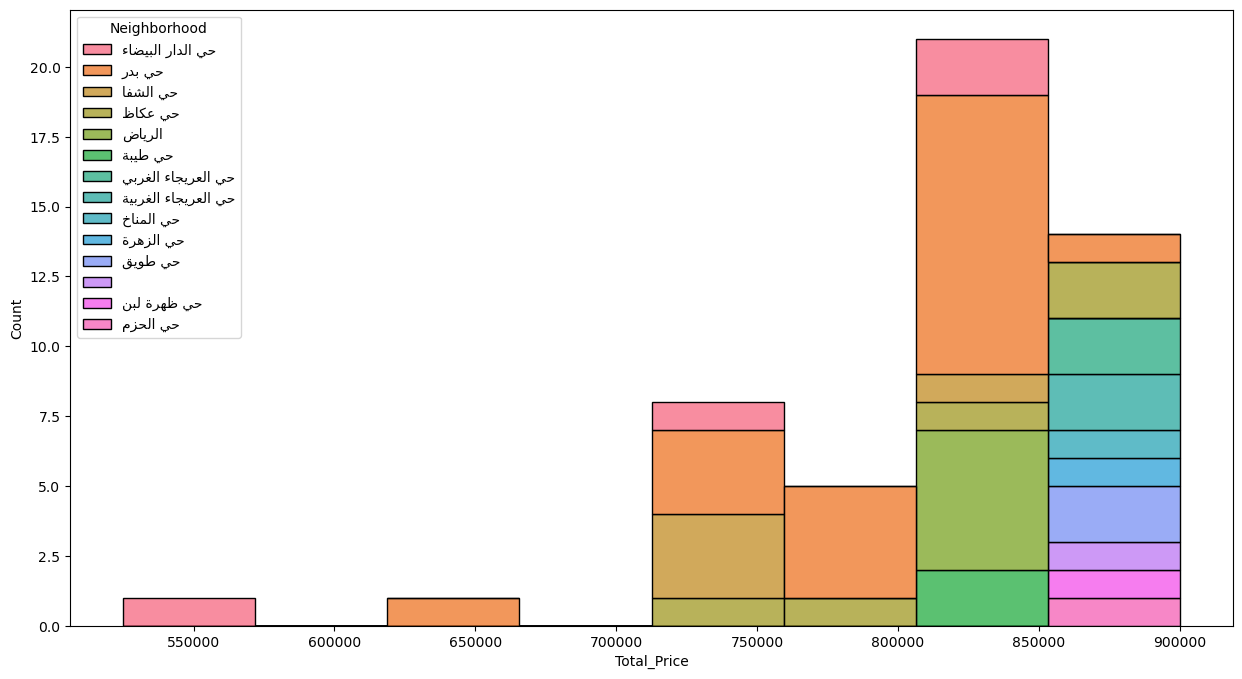

In [917]:
# Stacked Histogram for most expensive neighborhood prices
plt.figure(figsize=(15,8))
sns.histplot(
Least_expensive,
    x="Total_Price",
    hue="Neighborhood", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

### -Visualizing Apartments dataset:

In [920]:
df_apartments.head()

Neighborhood  Bedrooms  Living_Rooms  Baths  Area Kitchen Car_Entrance  \
0    حي المروج         4           1.0      3   249       1            0   
1    حي العارض         3           1.0      3   199       0            0   
2    حي النرجس         3           1.0      3   145       1            0   
3    حي النرجس         3           1.0      3   101       1            0   
4  حي الياسمين         4           1.0      3   147       1            0   

  Elevator  Age furnished  Total_Price  
0        1    0         0      1434000  
1        1    0         0       980000  
2        1    2         0      1050000  
3        0    0         1      1200000  
4        1    2         1      1200000

In [922]:
neigh_counts_ap = filtered_df_appartment_no_miss_neighborhood['Neighborhood'].value_counts()

In [924]:
filtered_df_appartment_no_miss_neighborhood.dtypes

Neighborhood      object
Bedrooms           int32
Living_Rooms     float64
Baths              int32
Area               int64
Kitchen         category
Car_Entrance    category
Elevator        category
Age                int32
furnished       category
Total_Price        int64
dtype: object

In [926]:
# this code will apply the reshaping arabix text of column city using the reshaping function
neigh_labels_ap = [arabic_text(neigh) for neigh in neigh_counts_ap.index] # for neighborhood names

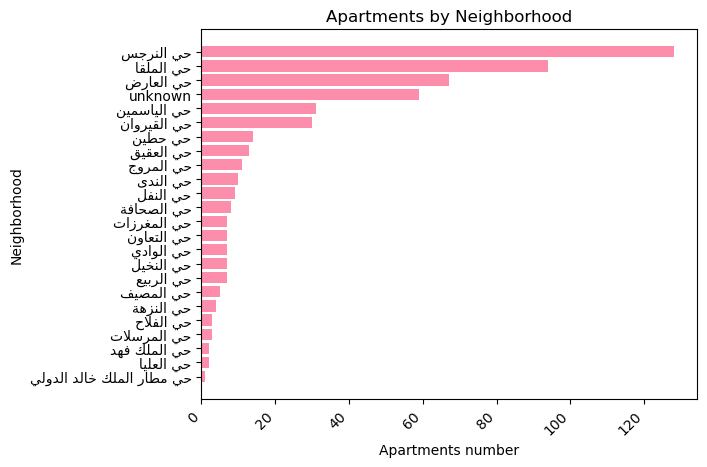

In [928]:
# here we can see number of Apartments by their neighborhood
# it seems most of the entries for Apartments neighborhood is in Alnarges!
plt.barh(neigh_labels_ap, 
         neigh_counts_ap.values,
         color=('#fc8eac')
        )
plt.title('Apartments by Neighborhood')
plt.xlabel('Apartments number')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.show()

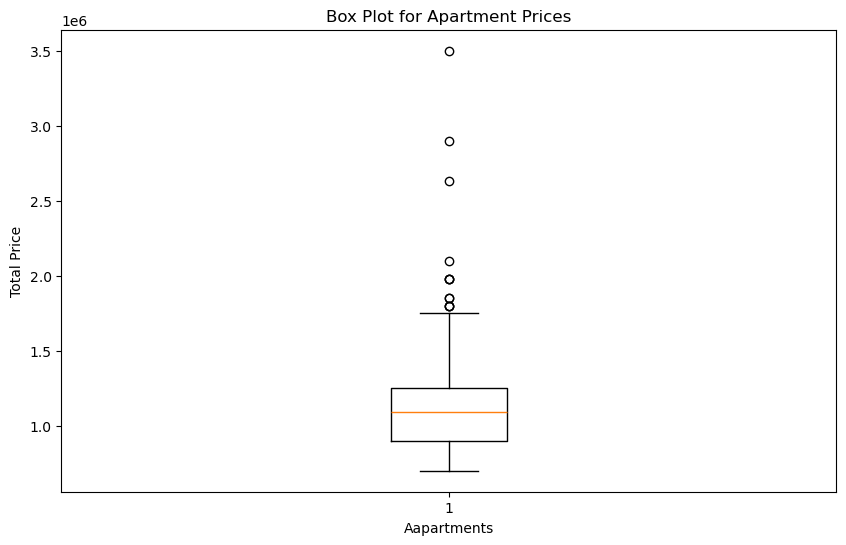

In [931]:
# Box plot for the 'Total_Price'of Apartments
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_df_appartment_no_miss_neighborhood['Total_Price'].dropna(), vert=True)
plt.title('Box Plot for Apartment Prices')
plt.ylabel('Total Price')
plt.xlabel('Aapartments')
plt.show()

<Axes: >

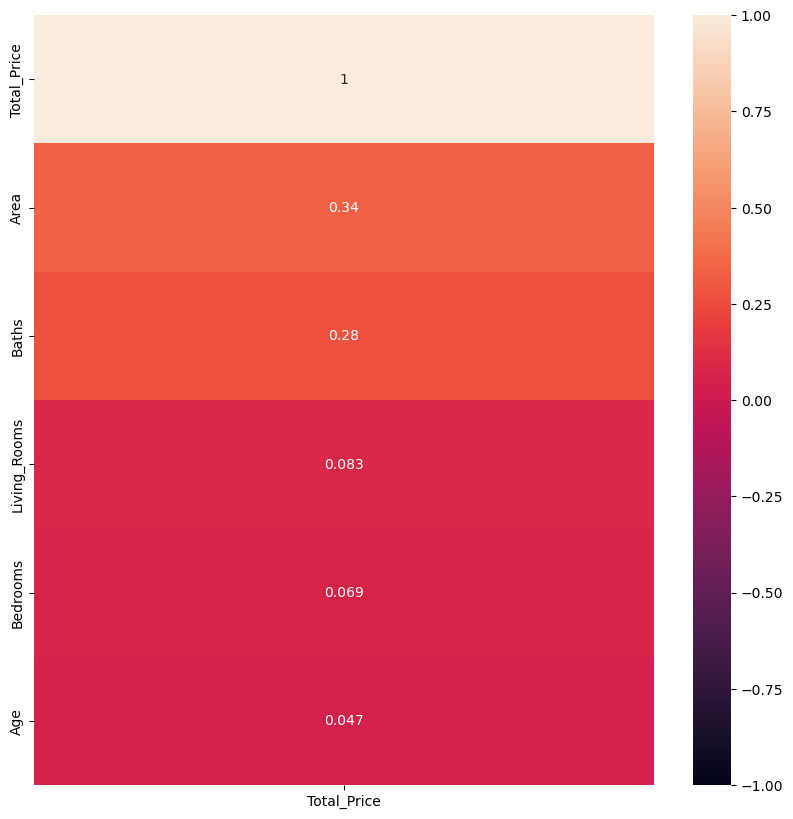

In [933]:
# apartments heatmap between the effect of price and all numeric values
# area and furnished mostly are the ones that affect the price for apartment
numeric =  df_apartments.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(numeric.corr()[['Total_Price']].sort_values('Total_Price', ascending = False),
vmin = -1, vmax = +1, annot = True, ax = ax)

In [935]:
corr_matrix_ap = filtered_df_appartment_no_miss_neighborhood.select_dtypes(include=np.number).corr()
corr_matrix_ap

Bedrooms  Living_Rooms     Baths      Area       Age  \
Bedrooms      1.000000      0.049909  0.424690  0.324094  0.010136   
Living_Rooms  0.049909      1.000000  0.170404  0.132465  0.011922   
Baths         0.424690      0.170404  1.000000  0.381922 -0.074220   
Area          0.324094      0.132465  0.381922  1.000000 -0.064422   
Age           0.010136      0.011922 -0.074220 -0.064422  1.000000   
Total_Price   0.103674      0.105724  0.274642  0.370701  0.033495   

              Total_Price  
Bedrooms         0.103674  
Living_Rooms     0.105724  
Baths            0.274642  
Area             0.370701  
Age              0.033495  
Total_Price      1.000000

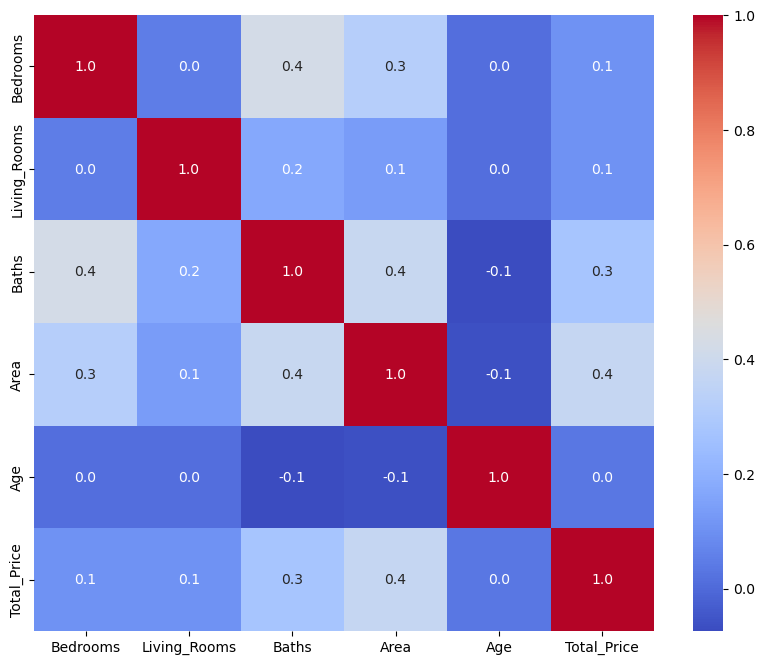

In [937]:
# another heatmap for apartments
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_ap,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

plt.show()

In [939]:
# average price in each neighborhood
average_price_apartments = filtered_df_appartment_no_miss_neighborhood.groupby('Neighborhood')['Total_Price'].mean()
average_price_apartments

Neighborhood
unknown                      1.136458e+06
حي التعاون                   1.220000e+06
حي الربيع                    1.388429e+06
حي الصحافة                   1.719875e+06
حي العارض                    1.008699e+06
حي العقيق                    7.769231e+05
حي العليا                    2.800000e+06
حي الفلاح                    1.111333e+06
حي القيروان                  1.215349e+06
حي المرسلات                  1.400000e+06
حي المروج                    1.071909e+06
حي المصيف                    8.794000e+05
حي المغرزات                  1.263857e+06
حي الملقا                    1.212896e+06
حي الملك فهد                 1.040000e+06
حي النخيل                    1.191429e+06
حي الندى                     1.152400e+06
حي النرجس                    9.914859e+05
حي النزهة                    1.357500e+06
حي النفل                     1.181111e+06
حي الوادي                    9.652857e+05
حي الياسمين                  1.068645e+06
حي حطين                      1.340143e+06
حي مطار الملك خالد ال

In [941]:
# average most expencive neighborhoods

# it looks here that King Khalid Airport is the most expensive one
top_five_ap = average_price_apartments.nlargest(5)
top_five_ap.sort_values()

Neighborhood
حي الربيع                    1.388429e+06
حي المرسلات                  1.400000e+06
حي الصحافة                   1.719875e+06
حي العليا                    2.800000e+06
حي مطار الملك خالد الدولي    2.900000e+06
Name: Total_Price, dtype: float64

In [943]:
# reshaping the arabic text
top5_labels_ap = [arabic_text(label) for label in top_five_ap.index]

<function matplotlib.pyplot.show(close=None, block=None)>

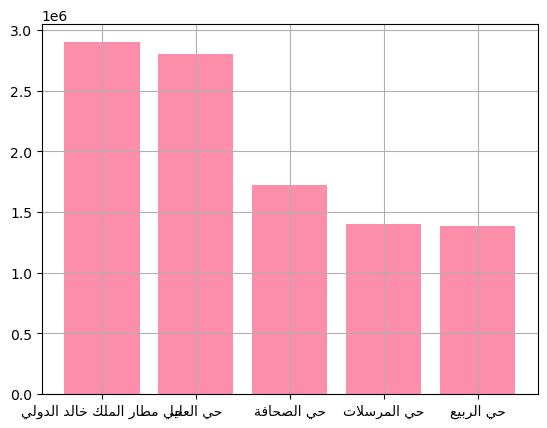

In [945]:
# displaying the top 5 of most expensive neighborhoods for apartments
plt.bar(top5_labels_ap,
        top_five_ap.values,
        color=('#fc8eac')
       )
plt.grid()
plt.show


In [947]:
# average of lowest neighborhood prices
# it looks like >>> is the least expensive neighborhood
bottom_five_ap = average_price_apartments.nsmallest(5)
bottom_five_ap.sort_values()

Neighborhood
حي العقيق    7.769231e+05
حي المصيف    8.794000e+05
حي الوادي    9.652857e+05
حي النرجس    9.914859e+05
حي العارض    1.008699e+06
Name: Total_Price, dtype: float64

In [949]:
# reshaping arabic text 
bottom5_labels_ap = [arabic_text(label) for label in bottom_five_ap.index]

<function matplotlib.pyplot.show(close=None, block=None)>

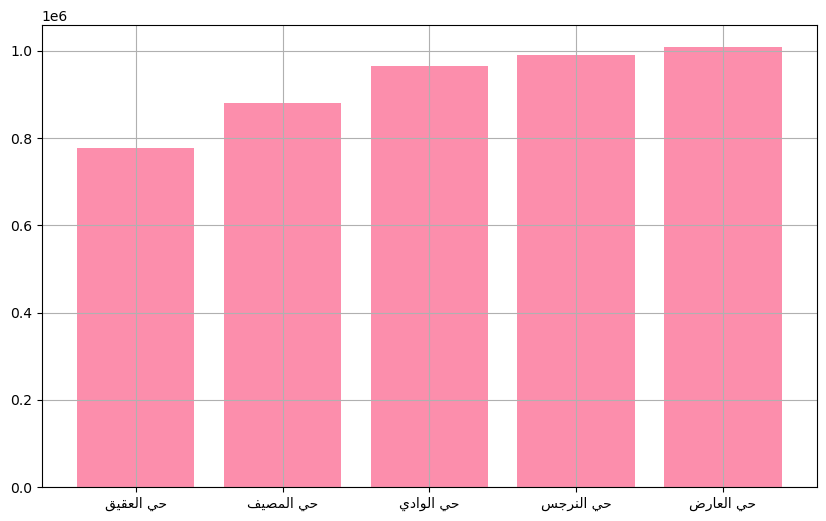

In [951]:
# displaying the bottom 5 of least expensive neighborhoods for villas
plt.figure(figsize=(10,6))
plt.bar(bottom5_labels_ap,
        bottom_five_ap.values,
        color=('#fc8eac')
       )
plt.grid()
plt.show

In [1115]:
filtered_df_appartment_no_miss_neighborhood['Neighborhood'] = filtered_df_appartment_no_miss_neighborhood['Neighborhood'].apply(arabic_text)

In [1117]:
Most_expensive_ap = filtered_df_appartment_no_miss_neighborhood.nlargest(50, 'Total_Price')
Most_expensive_ap.head() 

Neighborhood  Bedrooms  Living_Rooms  Baths  Area Kitchen  \
65                   ﺎﻴﻠﻌﻟﺍ ﻲﺣ         4           2.0      5   217       1   
534  ﻲﻟﻭﺪﻟﺍ ﺪﻟﺎﺧ ﻚﻠﻤﻟﺍ ﺭﺎﻄﻣ ﻲﺣ         4           2.0      3   180       1   
47                  ﺔﻓﺎﺤﺼﻟﺍ ﻲﺣ         3           1.0      3   143       0   
524                  ﺎﻴﻠﻌﻟﺍ ﻲﺣ         1           1.0      2    92       1   
21                  ﺔﻓﺎﺤﺼﻟﺍ ﻲﺣ         2           1.0      3   142       1   

    Car_Entrance Elevator  Age furnished  Total_Price  
65             1        1    5         1      3500000  
534            1        0    0         0      2900000  
47             0        0    9         1      2630000  
524            1        1   11         1      2100000  
21             1        1    7         0      1980000

<Axes: xlabel='Total_Price', ylabel='Count'>

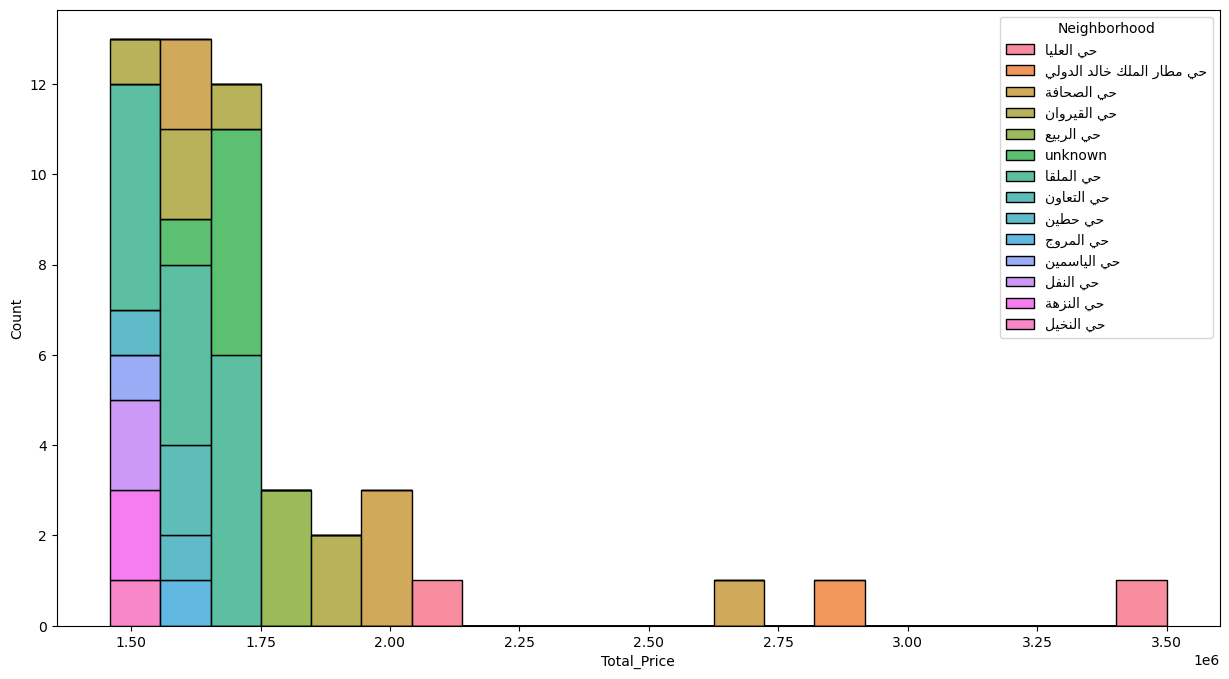

In [1119]:
# Stacked Histogram for most expensive neighborhood prices
plt.figure(figsize=(15,8))
sns.histplot(
    Most_expensive_ap,
    x="Total_Price",
    hue="Neighborhood", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)



In [1123]:
Least_expensive_ap = filtered_df_appartment_no_miss_neighborhood.nsmallest(50, 'Total_Price')
Least_expensive_ap

Neighborhood  Bedrooms  Living_Rooms  Baths  Area Kitchen Car_Entrance  \
193    ﻖﻴﻘﻌﻟﺍ ﻲﺣ         3           1.0      3   162       1            1   
260    ﻖﻴﻘﻌﻟﺍ ﻲﺣ         3           1.0      3   162       1            1   
374    ﻖﻴﻘﻌﻟﺍ ﻲﺣ         3           1.0      3   162       1            1   
488    ﻖﻴﻘﻌﻟﺍ ﻲﺣ         3           2.0      3   123       1            0   
56       unknown         3           1.0      2   104       1            1   
82       unknown         3           1.0      2   104       1            1   
90       unknown         3           1.0      2   104       0            1   
450      unknown         3           1.0      2   104       1            1   
527      unknown         3           1.0      2   104       0            1   
520  ﻦﻴﻤﺳﺎﻴﻟﺍ ﻲﺣ         2           1.0      2   100       1            1   
102    ﻒﻴﺼﻤﻟﺍ ﻲﺣ         3           1.0      2   107       1            1   
115    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         2           1.0      3    61       1            0   
183    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         4           1.0      3   138       1            0   
211    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         2           1.0      3    61       1            0   
313    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         2           1.0      2    86       0            0   
327      unknown         3           1.0      2   130       1            0   
353    ﺝﻭﺮﻤﻟﺍ ﻲﺣ         3           1.0      2   130       1            1   
407    ﺝﻭﺮﻤﻟﺍ ﻲﺣ         3           1.0      2   130       1            0   
453    ﺲﺟﺮﻨﻟﺍ ﻲﺣ         4           1.0      3   119       0            0   
396    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         2           1.0      3   101       0            1   
480    ﺲﺟﺮﻨﻟﺍ ﻲﺣ         2           1.0      2   130       0            0   
145    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         2           1.0      3   133       0            1   
321    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         2           1.0      3   104       1            0   
510    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         2           1.0      3   133       0            1   
49     ﺽﺭﺎﻌﻟﺍ ﻲﺣ         3           1.0      3   142       1            1   
143    ﺲﺟﺮﻨﻟﺍ ﻲﺣ         3           1.0      3   115       1            1   
208    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         2           1.0      2   133       0            0   
224    ﺎﻘﻠﻤﻟﺍ ﻲﺣ         3           2.0      3   119       1            0   
401    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         3           1.0      3   142       1            1   
40     ﻖﻴﻘﻌﻟﺍ ﻲﺣ         3           1.0      3   139       1            1   
45     ﻖﻴﻘﻌﻟﺍ ﻲﺣ         4           1.0      3   220       1            1   
92     ﻖﻴﻘﻌﻟﺍ ﻲﺣ         4           1.0      3   220       1            1   
110    ﻖﻴﻘﻌﻟﺍ ﻲﺣ         4           2.0      4   139       1            0   
155    ﻖﻴﻘﻌﻟﺍ ﻲﺣ         4           2.0      4   139       1            0   
200    ﻱﺩﺍﻮﻟﺍ ﻲﺣ         4           1.0      2   161       1            1   
221    ﻱﺩﺍﻮﻟﺍ ﻲﺣ         4           1.0      2   161       1            1   
264    ﺝﻭﺮﻤﻟﺍ ﻲﺣ         3           1.0      2   130       1            0   
278    ﻖﻴﻘﻌﻟﺍ ﻲﺣ         4           1.0      3   220       1            1   
281    ﺝﻭﺮﻤﻟﺍ ﻲﺣ         3           1.0      2   130       1            0   
308    ﻖﻴﻘﻌﻟﺍ ﻲﺣ         3           1.0      3   139       1            1   
330  ﻥﺍﻭﺮﻴﻘﻟﺍ ﻲﺣ         2           1.0      2   121       1            0   
340    ﺎﻘﻠﻤﻟﺍ ﻲﺣ         3           1.0      2   139       0            0   
343      unknown         3           1.0      3   139       1            1   
427      unknown         3           1.0      3   139       1            1   
540    ﺝﻭﺮﻤﻟﺍ ﻲﺣ         2           1.0      2   120       1            0   
71     ﺽﺭﺎﻌﻟﺍ ﻲﺣ         3           1.0      2   109       1            0   
153    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         3           1.0      2   109       1            0   
28     ﺲﺟﺮﻨﻟﺍ ﻲﺣ         3           1.0      2   129       1            0   
78     ﺲﺟﺮﻨﻟﺍ ﻲﺣ         2           2.0      2   129       0            0   
122    ﺲﺟﺮﻨﻟﺍ ﻲﺣ         2           1.0      3   129       1            0   

    Elevator  Age furnish

<Axes: xlabel='Total_Price', ylabel='Count'>

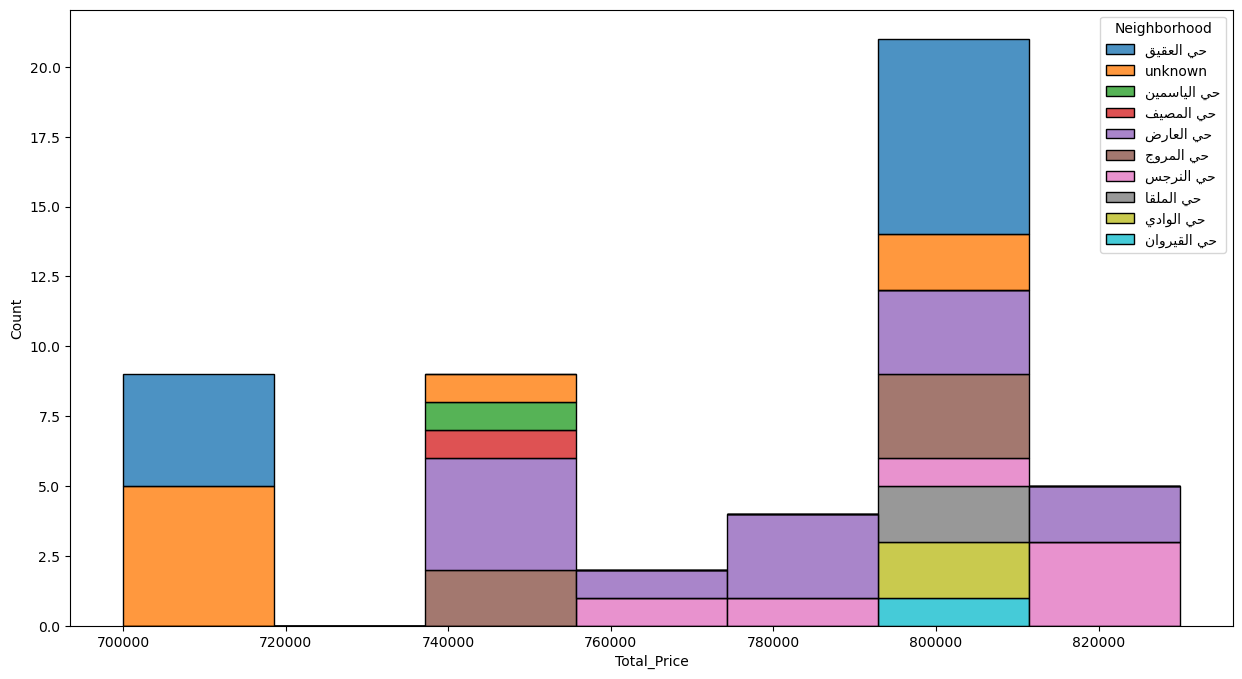

In [1125]:
# Stacked Histogram for least expensive neighborhood prices  
plt.figure(figsize=(15,8))
sns.histplot(
    Least_expensive_ap,
    x="Total_Price",
    hue="Neighborhood", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

### -Visualizing Lands dataset:

In [961]:
df_land.head(2)

Purpose    City Neighborhood      Facade  Area  Price_per_Meter  Total_Price
1    سكني  الرياض    حي غرناطة      شمالية   800           4800.0    3840000.0
2    سكني  الرياض    حي غرناطة  ثلاث شوارع  1650           4800.0    7920000.0

In [963]:
city_counts_la = df_land['City'].value_counts()
neigh_counts_la = df_land['Neighborhood'].value_counts()
front_counts_la = df_land['Facade'].value_counts()

In [965]:
# this code will apply the reshaping arabix text of column city using the reshaping function
city_labels_la = [arabic_text(city) for city in city_counts_la.index] # for cities names
neigh_labels_la = [arabic_text(neigh) for neigh in neigh_counts_la.index] # for neighborhood names
front_labels_la = [arabic_text(front) for front in front_counts_la.index] # for fronts names

C:\Users\almal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


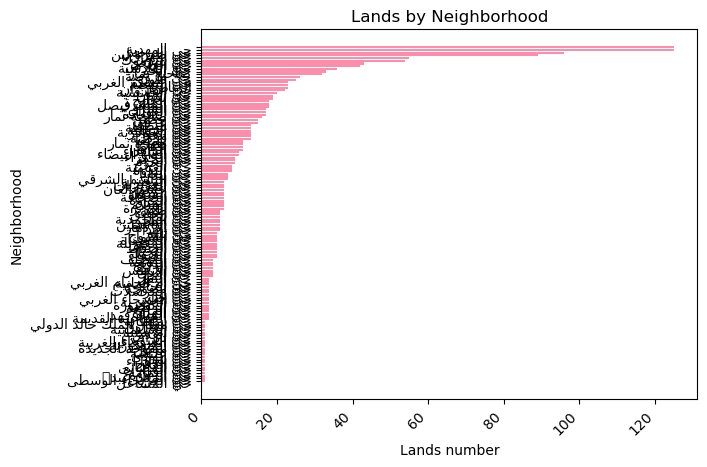

In [967]:
# here we can see number of villas by their neighborhood, i know it's not readable but just to see the results
# it seems most of the entries for villas neighborhood is Riyadh not the name of a neighborhood
plt.barh(neigh_labels_la, neigh_counts_la.values, color=('#fc8eac'))
plt.title('Lands by Neighborhood')
plt.xlabel('Lands number')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.show()

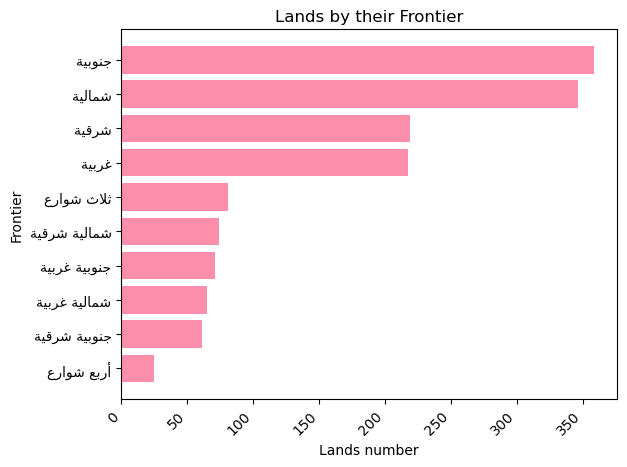

In [969]:
# here we can see number of villas by their frontier, like if you will buy a villa within two streets on one and the side of it
# it seems most of the entries for villas frontiers are norht and the south is a little close to it
plt.barh(front_labels_la, front_counts_la.values, color=('#fc8eac'))
plt.title('Lands by their Frontier')
plt.xlabel('Lands number')
plt.ylabel('Frontier')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.show()

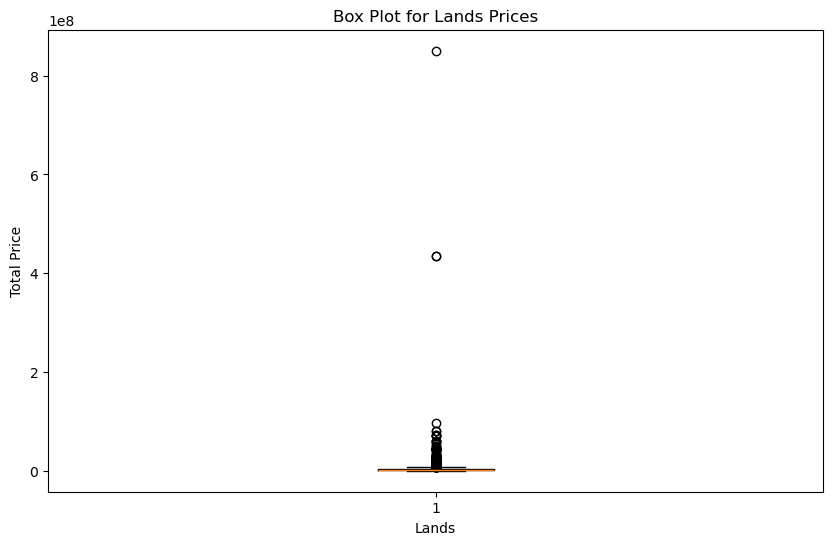

In [971]:
# Box plot for the 'Total_Price'of Lands
plt.figure(figsize=(10, 6))
plt.boxplot(df_land['Total_Price'].dropna(), vert=True)
plt.title('Box Plot for Lands Prices')
plt.ylabel('Total Price')
plt.xlabel('Lands')
plt.show()

<Axes: >

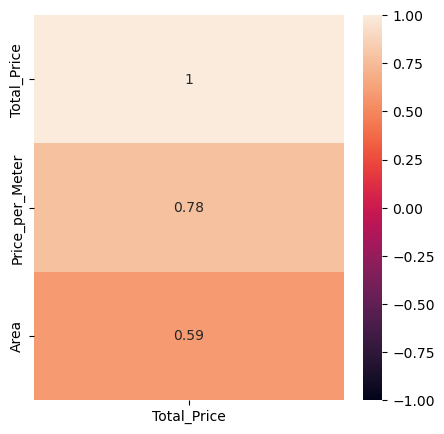

In [973]:
# Lands heatmap between the effect of price and all numeric values
# Not much
numeric =  df_land.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(numeric.corr()[['Total_Price']].sort_values('Total_Price', ascending = False),
vmin = -1, vmax = +1, annot = True, ax = ax)

In [975]:
corr_matrix_la = df_land.select_dtypes(include=np.number).corr()
corr_matrix_la

Area  Price_per_Meter  Total_Price
Area             1.000000        -0.005691     0.588917
Price_per_Meter -0.005691         1.000000     0.779447
Total_Price      0.588917         0.779447     1.000000

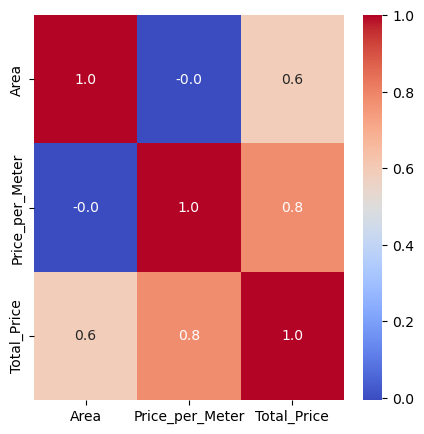

In [977]:
# another heatmap for lands
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix_la,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

plt.show()

In [979]:
# average price in each neighborhood
average_price_lands = df_land.groupby('Neighborhood')['Total_Price'].mean()
average_price_lands

Neighborhood
                             1.607380e+06
الرياض                       2.243375e+07
حي أم الحمام الغربي          1.100138e+06
حي اشبيلية                   1.006381e+07
حي الازدهار                  5.106443e+06
                                 ...     
حي مطار الملك خالد الدولي    1.644000e+06
حي منفوحة                    5.097200e+06
حي منفوحة الجديدة            1.190000e+05
حي نمار                      2.145548e+06
ضاحية نمار                   8.435598e+06
Name: Total_Price, Length: 125, dtype: float64

In [981]:
# average most expencive neighborhoods

top_five_la = average_price_lands.nlargest(5)
top_five_la.sort_values()

Neighborhood
حي الملك عبدالله    2.465100e+07
حي القيروان         4.124699e+07
حي النخيل           4.796742e+07
حي المنصورية        4.944000e+07
حي السليمانية       7.000000e+07
Name: Total_Price, dtype: float64

In [983]:
# reshaping the arabic text
top5_labels_la = [arabic_text(label) for label in top_five_la.index]

<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\almal\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  func(*args, **kwargs)
C:\Users\almal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


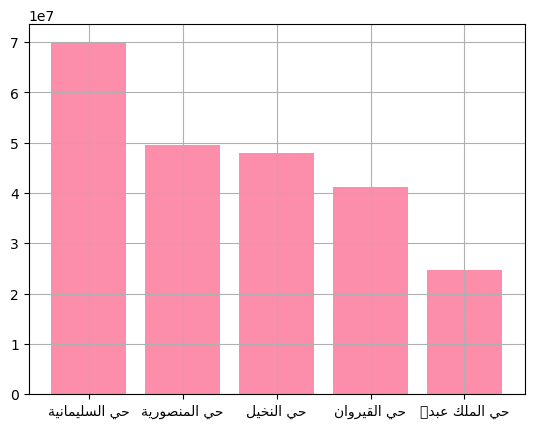

In [985]:
# displaying the top 5 of most expensive neighborhoods for apartments
plt.bar(top5_labels_la,
        top_five_la.values,
        color=('#fc8eac')
       )
plt.grid()
plt.show

In [987]:
# average of lowest neighborhood prices
bottom_five_la = average_price_lands.nsmallest(5)
bottom_five_la.sort_values()

Neighborhood
حي منفوحة الجديدة      119000.0
حي شبرا                276000.0
حي ام سليم             358200.0
حي الشعلة              560121.0
حي العريجاء الغربية    600000.0
Name: Total_Price, dtype: float64

In [989]:
# reshaping arabic text 
bottom5_labels_la = [arabic_text(label) for label in bottom_five_la.index]

<function matplotlib.pyplot.show(close=None, block=None)>

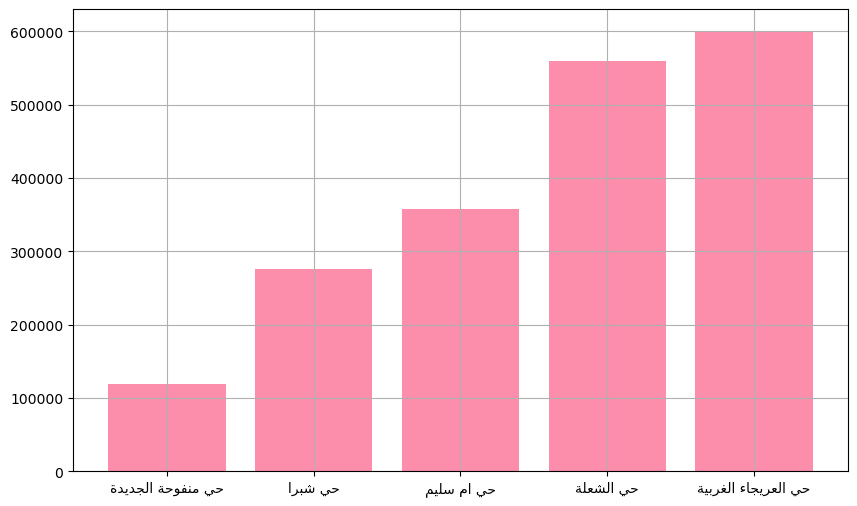

In [991]:
# displaying the bottom 5 of least expensive neighborhoods for villas
plt.figure(figsize=(10,6))
plt.bar(bottom5_labels_la,
        bottom_five_la.values,
        color=('#fc8eac')
       )
plt.grid()
plt.show


In [993]:
Most_expensive_la = df_land.nlargest(50, 'Total_Price')
Most_expensive_la

Purpose    City      Neighborhood        Facade    Area  \
1547  تجاري وسكني  الرياض       حي القيروان         غربية     900   
2086  تجاري وسكني  الرياض            الرياض    أربع شوارع  299684   
2087  تجاري وسكني  الرياض         حي الرمال    أربع شوارع  299684   
2126         سكني  الرياض        حي المهدية         غربية   96755   
435         تجاري  الرياض         حي النخيل    ثلاث شوارع   10000   
439         تجاري  الرياض         حي النخيل    ثلاث شوارع   10000   
255   تجاري وسكني  الرياض          حي العلا    ثلاث شوارع   24000   
1260  تجاري وسكني  الرياض          حي العلا    ثلاث شوارع   24000   
1251  تجاري وسكني  الرياض         حي البرية    ثلاث شوارع   10941   
2047  تجاري وسكني  الرياض     حي السليمانية    أربع شوارع   10000   
97           سكني  الرياض        حي السعادة         غربية   22300   
718          سكني  الرياض        حي السعادة         غربية   22300   
719          سكني  الرياض         حي النرجس         غربية   22300   
876          سكني  الرياض         حي النرجس  جنوبية غربية   10000   
389          سكني  الرياض         حي الملقا    ثلاث شوارع    6372   
1714         سكني  الرياض      حي المنصورية  جنوبية غربية    9600   
1612         سكني  الرياض         حي الرمال    ثلاث شوارع   30000   
381          سكني  الرياض           حي طويق        شمالية   15730   
144   تجاري وسكني  الرياض         حي الروضة    أربع شوارع    9900   
857   تجاري وسكني  الرياض         حي الروضة    أربع شوارع    9900   
2032  تجاري وسكني  الرياض         حي الروضة    أربع شوارع    9900   
831          سكني  الرياض       حي العزيزية    أربع شوارع   14835   
1044         سكني  الرياض           حي ثليم         شرقية    2227   
1045         سكني  الرياض           حي ثليم         شرقية    2227   
1046         سكني  الرياض        ضاحية نمار         شرقية    2227   
1050         سكني  الرياض        ضاحية نمار         غربية    2227   
1047         سكني  الرياض        ضاحية نمار  شمالية شرقية    2215   
1048         سكني  الرياض        ضاحية نمار        جنوبية    2200   
1049         سكني  الرياض        ضاحية نمار  جنوبية شرقية    2200   
1042         سكني  الرياض       حي الياسمين        شمالية    2172   
1013         سكني  الرياض         حي النرجس         غربية    5995   
1266  تجاري وسكني  الرياض           حي عريض    أربع شوارع   40000   
1224         سكني  الرياض       حي الناصرية        جنوبية    9053   
1708         سكني  الرياض         حي الحائر  شمالية شرقية    8464   
1807         سكني  الرياض       حي المحمدية    أربع شوارع    3500   
1012         سكني  الرياض         حي الملقا        شمالية    4440   
1255  تجاري وسكني  الرياض         حي العارض    أربع شوارع    7420   
1506         سكني  الرياض         حي النرجس    ثلاث شوارع    4510   
1992        تجاري  الرياض         حي العقيق    ثلاث شوارع    1650   
961          سكني  الرياض          حي السلي    ثلاث شوارع   10500   
547          سكني  الرياض           حي حطين    ثلاث شوارع    2816   
129         تجاري  الرياض        حي اشبيلية    أربع شوارع    5670   
802          سكني  الرياض        حي اشبيلية    أربع شوارع    5670   
676          سكني  الرياض       حي العزيزية  شمالية غربية   26966   
256   تجاري وسكني  الرياض          حي العلا    ثلاث شوارع   17927   
1259  تجاري وسكني  الرياض          حي العلا    ثلاث شوارع   17927   
388          سكني  الرياض           حي طويق        جنوبية   11930   
220          سكني  الرياض        حي اليرموك        شمالية    4350   
1147         سكني  الرياض        حي اليرموك        شمالية    4350   
2057        تجاري  الرياض  حي النسيم الغربي         غربية    7400   

      Price_per_Meter  Total_Price  
1547         945000.0  850500000.0  
2086           1450.0  434541800.0  
2087           1450.0  434541800.0  
2126           1000.0   96755000.0  
435            8000.0   80000000.0  
439            8000.0   80000000.0  
255            3000.0   72000000.0  
1260           3000.0   72000000.0  
1251           6400.0   70022400.0  
2047           7000.0   70000000.0  
97             2700.0   60210000.0  
718            2700.0   60210000.0  
719      

<Axes: xlabel='Total_Price', ylabel='Count'>

C:\Users\almal\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


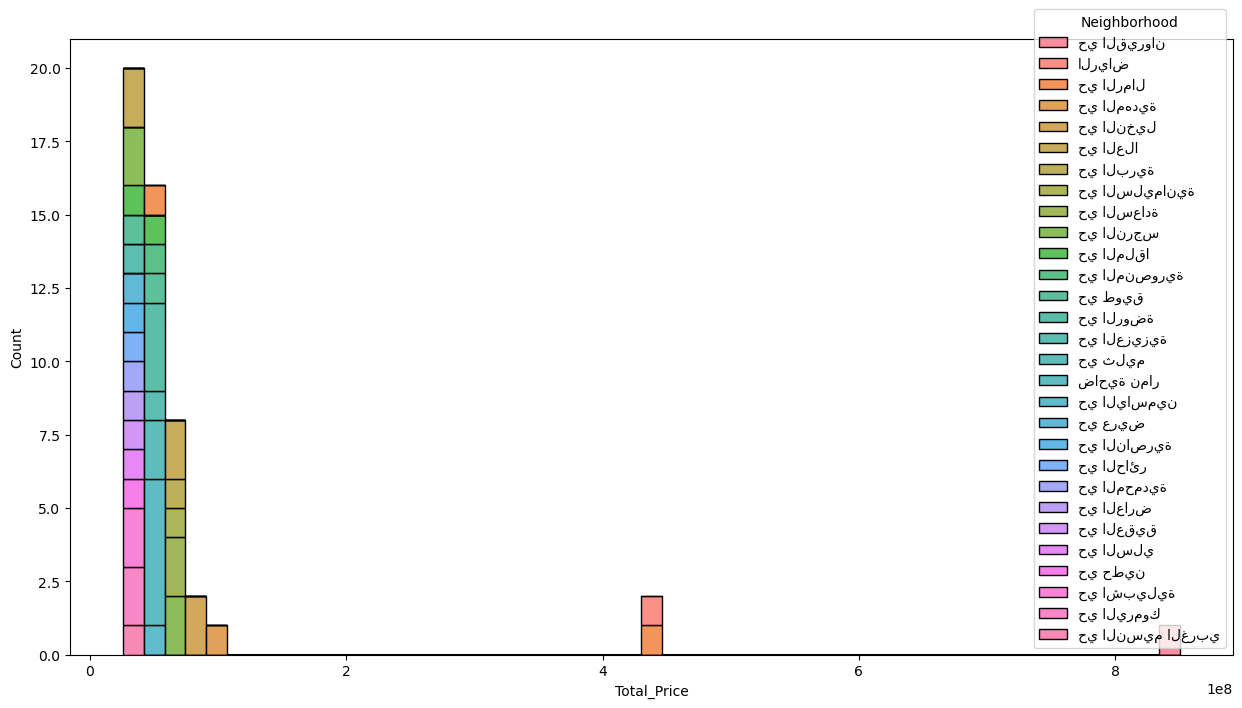

In [995]:
# Stacked Histogram for least expensive neighborhood prices  
plt.figure(figsize=(15,8))
sns.histplot(
    Most_expensive_la,
    x="Total_Price",
    hue="Neighborhood", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

In [997]:
Least_expensive_la = df_land.nsmallest(50, 'Total_Price')
Least_expensive_la

Purpose    City       Neighborhood        Facade  Area  \
286   تجاري وسكني  الرياض          حي السلام         شرقية     1   
1446  تجاري وسكني  الرياض          حي النرجس         شرقية     1   
1725         سكني  الرياض          حي الرمال        شمالية    36   
1581  تجاري وسكني  الرياض        حي الغنامية         شرقية   160   
519          سكني  الرياض        حي الغنامية         شرقية   160   
600          سكني  الرياض  حي منفوحة الجديدة         شرقية    85   
915   تجاري وسكني  الرياض         حي المهدية         غربية   400   
1704         سكني  الرياض           حي الحزم        جنوبية   312   
1668         سكني  الرياض        حي الغنامية         غربية   200   
805          سكني  الرياض           حي الخير         شرقية   375   
914   تجاري وسكني  الرياض         حي المهدية        شمالية   499   
1437        تجاري  الرياض            حي عريض         غربية   216   
501          سكني  الرياض         حي المهدية         شرقية   391   
150   تجاري وسكني  الرياض        حي القادسية        جنوبية   597   
331          سكني  الرياض         حي الجزيرة        شمالية   240   
332          سكني  الرياض         حي الجزيرة        شمالية   240   
522          سكني  الرياض           حي الخير         غربية   109   
31           سكني  الرياض          حي الرمال         شرقية   420   
500          سكني  الرياض          حي النرجس         شرقية   420   
1197         سكني  الرياض             حي بدر        شمالية   375   
1268  تجاري وسكني  الرياض            حي عريض         شرقية   235   
95           سكني  الرياض         حي السعادة        جنوبية    90   
716          سكني  الرياض         حي السعادة        جنوبية    90   
743          سكني  الرياض            حي عريض        شمالية   400   
744          سكني  الرياض          حي المشرق        شمالية   400   
311   تجاري وسكني  الرياض           حي الشرق        جنوبية   756   
1553  تجاري وسكني  الرياض           حي الشرق        جنوبية   756   
916   تجاري وسكني  الرياض         حي المهدية        شمالية   750   
1055         سكني  الرياض       حي الجنادرية  شمالية شرقية   500   
146   تجاري وسكني  الرياض         حي الشهداء         غربية   763   
861   تجاري وسكني  الرياض         حي الشهداء         غربية   763   
163   تجاري وسكني  الرياض          حي الشعلة        جنوبية   763   
912   تجاري وسكني  الرياض          حي الشعلة        جنوبية   763   
1196         سكني  الرياض            حي عريض        شمالية   450   
1583  تجاري وسكني  الرياض            حي عريض        شمالية   400   
615          سكني  الرياض          حي العقيق         غربية   300   
913   تجاري وسكني  الرياض         حي المهدية  شمالية غربية   787   
2004         سكني  الرياض             الرياض         شرقية   420   
924   تجاري وسكني  الرياض         حي المهدية        شمالية   300   
2043         سكني  الرياض          حي النرجس        جنوبية   450   
580          سكني  الرياض          حي البيان        شمالية   375   
1688         سكني  الرياض          حي العليا  جنوبية شرقية   580   
677          سكني  الرياض            حي شبرا        جنوبية   276   
1801         سكني  الرياض            حي عريض        شمالية   400   
1904         سكني  الرياض             الرياض        شمالية   400   
1582  تجاري وسكني  الرياض        حي ظهرة لبن        جنوبية   450   
2053         سكني  الرياض            حي عكاظ        جنوبية   756   
297   تجاري وسكني  الرياض          حي الخليج  شمالية شرقية   648   
1617         سكني  الرياض           حي الشفا        جنوبية   375   
275   تجاري وسكني  الرياض           حي قرطبة         غربية   450   

      Price_per_Meter  Total_Price  
286            1400.0       1400.0  
1446           1400.0       1400.0  
1725           2600.0      93600.0  
1581            625.0     100000.0  
519             668.0     106880.0  
600            1400.0     119000.0  
915             318.0     127200.0  
1704            442.0     137904.0  
1668            750.0     150000.0  
805             414.0     155250.0  
914             318.0     158682.0  
1437            810.0     174960.0  
501             476.0     186116.0  
150             315.0  

<Axes: xlabel='Total_Price', ylabel='Count'>

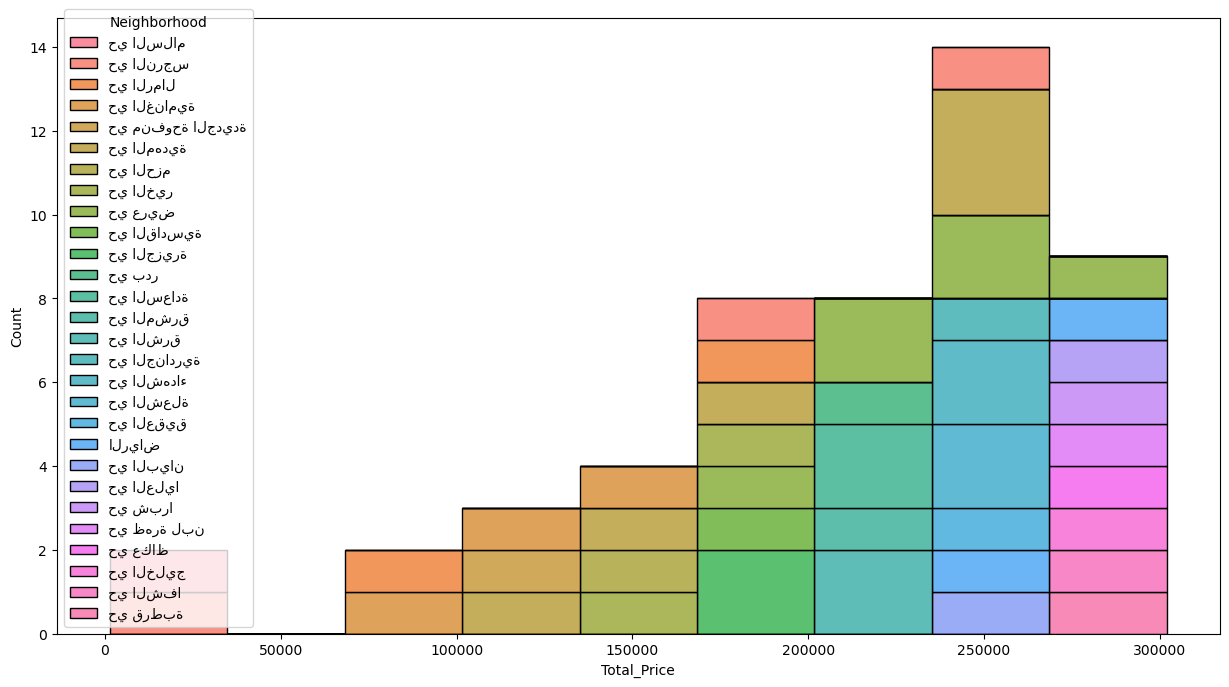

In [999]:
# Stacked Histogram for least expensive neighborhood prices  
plt.figure(figsize=(15,8))
sns.histplot(
    Least_expensive_la,
    x="Total_Price",
    hue="Neighborhood", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

### Visualizing all Datasets:

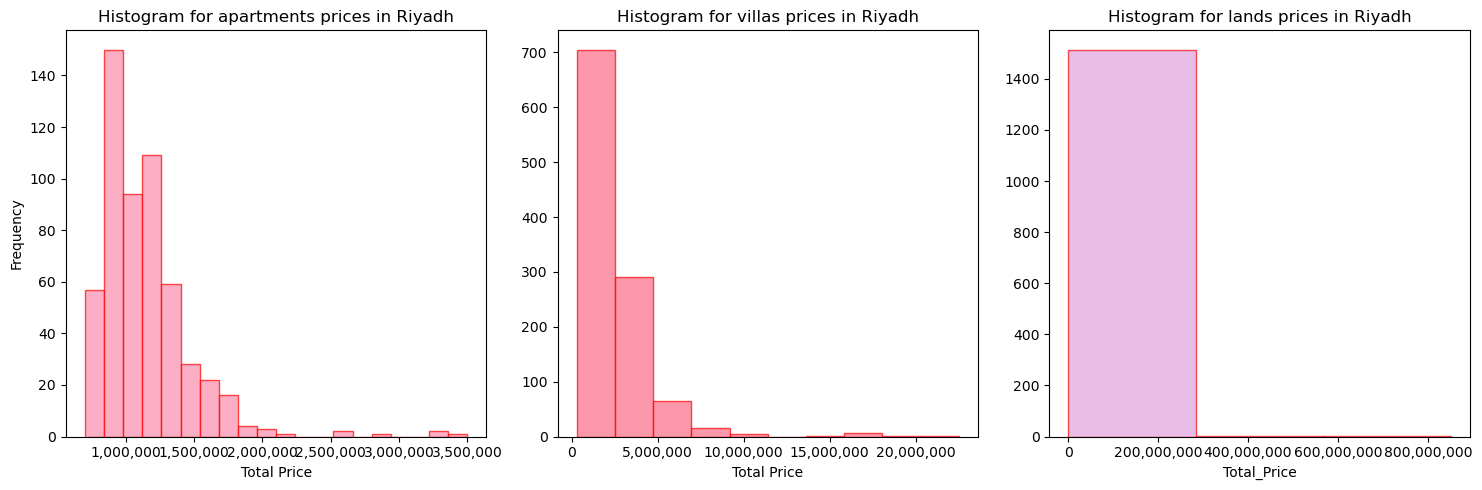

In [1002]:
# Create a figure and an array of axes with a subplot for each histogram
# Before cutting outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot a histogram for each dataset
# apartment dtatset
axes[0].hist(df_apartments['Total_Price'], edgecolor='red', bins=20, alpha=0.7, color='#fc8eac')
axes[0].set_title('Histogram for apartments prices in Riyadh')
axes[0].set_xlabel('Total Price')
axes[0].set_ylabel('Frequency')
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# villa dtatset
axes[1].hist(df_villas['Total_Price'], edgecolor='red', bins=10, alpha=0.7, color='#fc6c85')
axes[1].set_title('Histogram for villas prices in Riyadh')
axes[1].set_xlabel('Total Price')
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# land dtatset
axes[2].hist(df_land['Total_Price'], edgecolor='red', bins=3, alpha=0.7, color='#dda0dd')
axes[2].set_title('Histogram for lands prices in Riyadh')
axes[2].set_xlabel('Total_Price')
axes[2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [1003]:
#color pallete
#fc8eac 
#fc6c85   
#dda0dd  

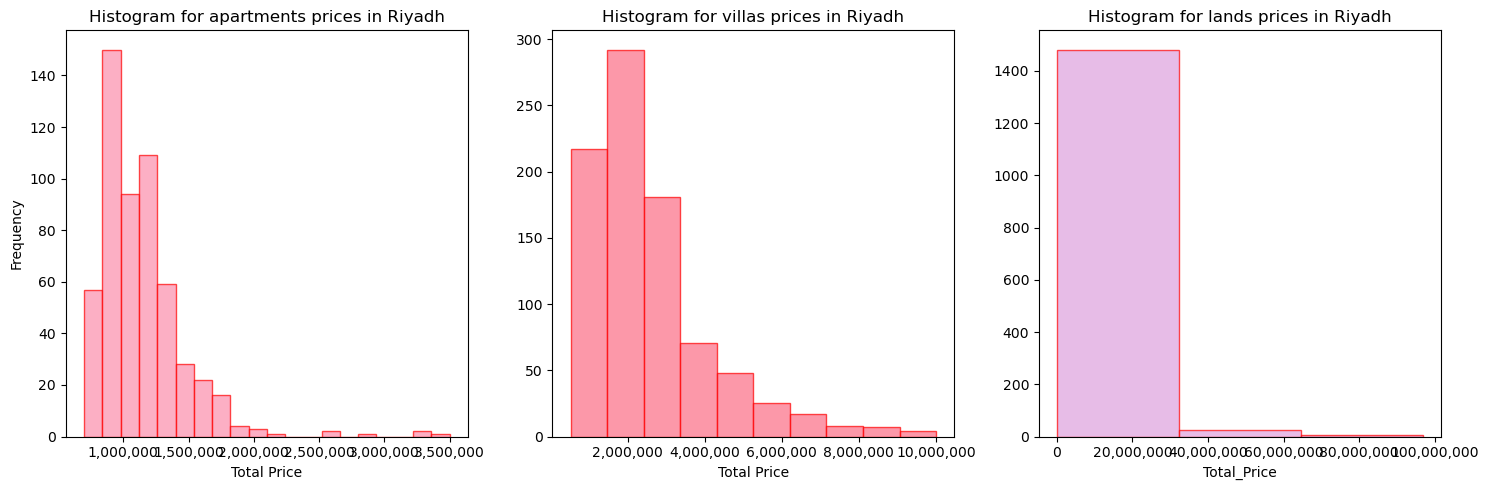

In [1006]:
# Create a figure and an array of axes with a subplot for each histogram
# After cutting outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot a histogram for each dataset
# apartment dtatset
axes[0].hist(df_apartments_no_miss_neighborhood['Total_Price'], edgecolor='red', bins=20, alpha=0.7, color='#fc8eac')
axes[0].set_title('Histogram for apartments prices in Riyadh')
axes[0].set_xlabel('Total Price')
axes[0].set_ylabel('Frequency')
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# villa dtatset
axes[1].hist(villas_no_null['Total_Price'], edgecolor='red', bins=10, alpha=0.7, color='#fc6c85')
axes[1].set_title('Histogram for villas prices in Riyadh')
axes[1].set_xlabel('Total Price')
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# land dtatset
axes[2].hist(df_land_less_20m['Total_Price'], edgecolor='red', bins=3, alpha=0.7, color='#dda0dd')
axes[2].set_title('Histogram for lands prices in Riyadh')
axes[2].set_xlabel('Total_Price')
axes[2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### Objective Questions:

In [1008]:
# Q1) In what neighborhood are the most expensive and least expensive villas located?

In [1105]:
villas_no_null['Neighborhood'] = villas_no_null['Neighborhood'].apply(arabic_text)

In [1107]:
Top = villas_no_null.nlargest(10, 'Total_Price')
Top

City Neighborhood        Facade Bedrooms Living_Rooms Baths    Area  \
30   الرياض    ﺎﻘﻠﻤﻟﺍ ﻲﺣ  شمالية غربية        5            4    5+   620.0   
31   الرياض    ﺎﻘﻠﻤﻟﺍ ﻲﺣ         غربية       7+            3    5+   800.0   
74   الرياض     ﻞﻔﻨﻟﺍ ﻲﺣ         شرقية       7+            4    5+   750.0   
393  الرياض     ﺔﺒﻃﺮﻗ ﻲﺣ        شمالية        5            1    5+  1080.0   
51   الرياض    ﺎﻘﻠﻤﻟﺍ ﻲﺣ         شرقية        5            3    5+   525.0   
130  الرياض    ﺎﻘﻠﻤﻟﺍ ﻲﺣ  شمالية غربية        5            3    5+   687.0   
404  الرياض   ﺀﺍﺮﻤﺤﻟﺍ ﻲﺣ         غربية        6            4    5+  1237.0   
11   الرياض    ﺎﻘﻠﻤﻟﺍ ﻲﺣ        جنوبية        6            3    5+   600.0   
14   الرياض    ﺎﻘﻠﻤﻟﺍ ﻲﺣ         شرقية        5            3    5+   437.0   
231  الرياض      ﻦﻴﻄﺣ ﻲﺣ         غربية        5            4    5+   505.0   

     Living_Room_Stairs  Kitchen  Maid_Room  Drivers_Room  Annex  Yard  \
30                    1        1          1             1      1     1   
31                    1        1          1             1      1     1   
74                    0        0          0             0      0     0   
393                   0        1          1             1      1     1   
51                    1        1          1             1      0     1   
130                   1        1          1             1      1     1   
404                   0        1          1             1      1     1   
11                    1        1          1             1      1     1   
14                    1        1          1             1      1     1   
231                   1        1          1             1      1     1   

     Swimming_Pool  Basement  Car_Entrance  Elevator  Total_Price  
30               1         0             1         1     10000000  
31               1         0             1         0     10000000  
74               0         0             0         1      9500000  
393              1         0             1         1      9500000  
51               1         1             1         1      9000000  
130              0         1             1         1      9000000  
404              1         0             1         1      8900000  
11               1         0             1         1      8500000  
14               0         0             1         1      8500000  
231              1         1             1         1      8300000

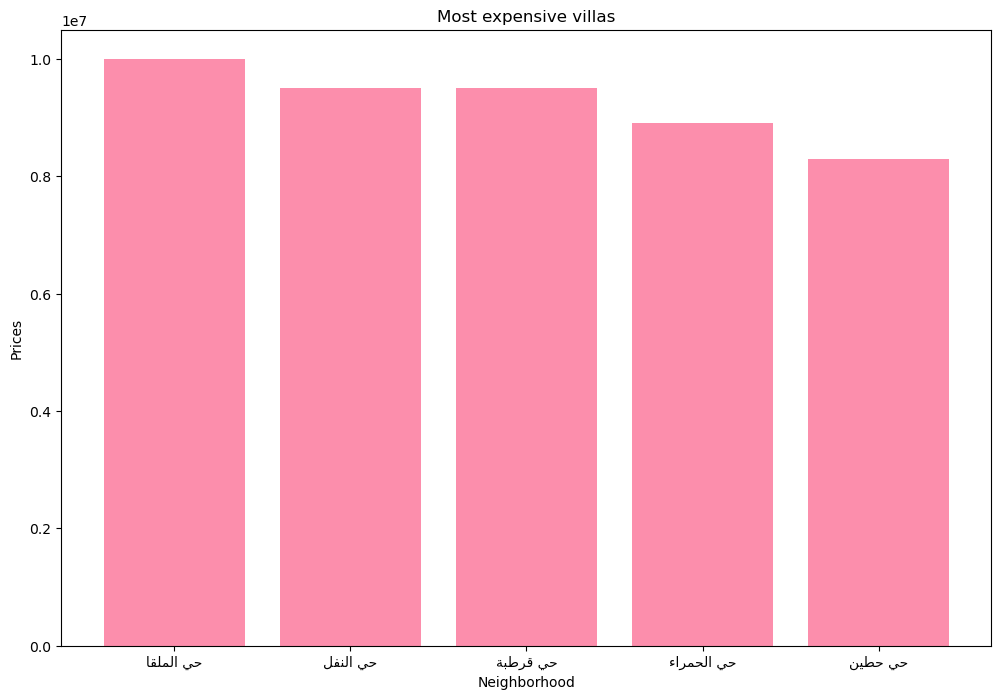

In [1109]:
plt.figure(figsize=(12, 8))
plt.bar(Top['Neighborhood'], 
        Top['Total_Price'],
        color=('#fc8eac')
       )

plt.xlabel('Neighborhood')
plt.ylabel('Prices')
plt.title('Most expensive villas')

#plt.grid()

plt.show
plt.savefig('Q01.png')

In [1111]:
Bottom = villas_no_null.nsmallest(10, 'Total_Price')
Bottom

City      Neighborhood  Facade Bedrooms Living_Rooms Baths   Area  \
690  الرياض  ﺀﺎﻀﻴﺒﻟﺍ ﺭﺍﺪﻟﺍ ﻲﺣ  شمالية        4            1     3  250.0   
634  الرياض            ﺭﺪﺑ ﻲﺣ   شرقية        4            1     4  303.0   
629  الرياض          ﺎﻔﺸﻟﺍ ﻲﺣ   شرقية       7+            1    5+  400.0   
603  الرياض           ﻅﺎﻜﻋ ﻲﺣ  شمالية        4            1     3  525.0   
604  الرياض            ﺭﺪﺑ ﻲﺣ   شرقية       7+            2    5+  480.0   
607  الرياض            ﺭﺪﺑ ﻲﺣ  شمالية        4            2     4  225.0   
608  الرياض          ﺎﻔﺸﻟﺍ ﻲﺣ   غربية        5            1    5+  218.0   
611  الرياض            ﺭﺪﺑ ﻲﺣ  شمالية        5            5    5+  225.0   
616  الرياض          ﺎﻔﺸﻟﺍ ﻲﺣ   غربية        5            1    5+  218.0   
655  الرياض  ﺀﺎﻀﻴﺒﻟﺍ ﺭﺍﺪﻟﺍ ﻲﺣ  شمالية        5            1    5+  218.0   

     Living_Room_Stairs  Kitchen  Maid_Room  Drivers_Room  Annex  Yard  \
690                   0        1          0             0      0     0   
634                   0        1          0             0      1     1   
629                   0        1          0             0      0     1   
603                   0        1          0             0      0     1   
604                   0        1          0             0      1     1   
607                   0        0          0             0      1     1   
608                   1        1          1             0      0     1   
611                   0        0          0             0      0     1   
616                   1        1          0             0      0     1   
655                   1        1          0             0      0     1   

     Swimming_Pool  Basement  Car_Entrance  Elevator  Total_Price  
690              0         0             0         0       525000  
634              0         0             1         0       640000  
629              0         0             1         0       720000  
603              0         0             1         0       750000  
604              0         0             1         0       750000  
607              0         0             1         0       750000  
608              0         0             1         0       750000  
611              0         0             1         0       750000  
616              0         0             1         0       750000  
655              0         0             1         0       750000

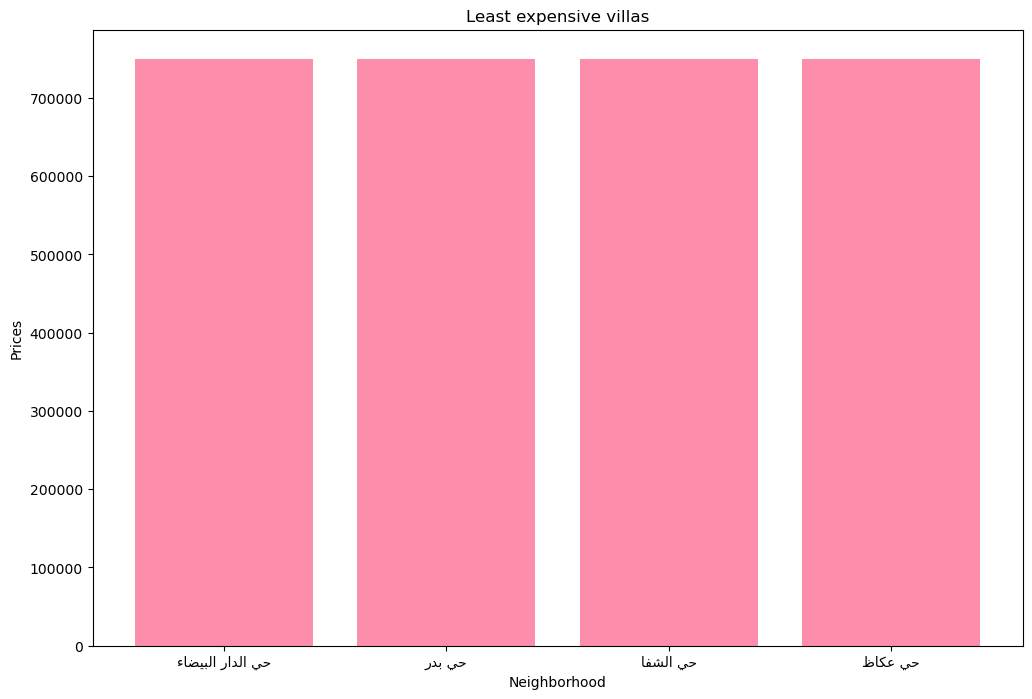

In [1112]:
plt.figure(figsize=(12, 8))
plt.bar(Bottom['Neighborhood'], 
        Bottom['Total_Price'],
        color=('#fc8eac')
       )

plt.xlabel('Neighborhood')
plt.ylabel('Prices')
plt.title('Least expensive villas')

#plt.grid()

plt.show
plt.savefig('Q11.png')

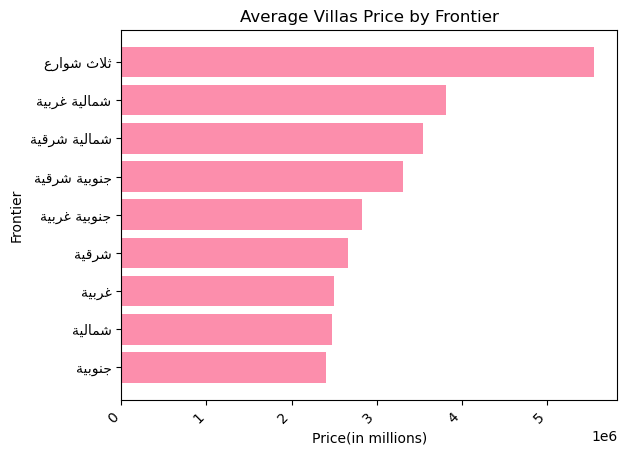

<Figure size 640x480 with 0 Axes>

In [1021]:
# Q2: Does the frontier location of a villa can affect its price?
# Investigate whether the location and orientation of a villa (such as facing north, south, east, or west) have any significant impact on its price
# Answer: it looks like the villas with  3 streets more expensive than the others

average_price_facade = df_villas.groupby('Facade')['Total_Price'].mean()

sorted_facade = average_price_facade.sort_values()

facade_labels = [arabic_text(facade) for facade in sorted_facade.index]

plt.barh(facade_labels, 
         sorted_facade,
         color=('#fc8eac')
        )
plt.title('Average Villas Price by Frontier')
plt.xlabel('Price(in millions)')
plt.ylabel('Frontier')
plt.xticks(rotation=45, ha='right')
#plt.gca().invert_yaxis()
plt.show()
plt.savefig('Q2.png')

In [1065]:
lands_commer_resi = df_land[df_land['Purpose'] != 'سكني']
lands_commer_resi.head(30)

Purpose    City      Neighborhood        Facade  Area  \
5   تجاري وسكني  الرياض         حي الرمال        جنوبية  2400   
6   تجاري وسكني  الرياض         حي الرمال        شمالية   900   
7   تجاري وسكني  الرياض     حي الملك فيصل         شرقية   750   
8   تجاري وسكني  الرياض        حي اليرموك        جنوبية  1089   
11  تجاري وسكني  الرياض        حي اليرموك         شرقية   450   
12  تجاري وسكني  الرياض         حي الرمال         شرقية   450   
13  تجاري وسكني  الرياض        حي اليرموك        جنوبية  1089   
15  تجاري وسكني  الرياض       حي المعيزلة        جنوبية   550   
16  تجاري وسكني  الرياض        حي اليرموك        جنوبية  1089   
17  تجاري وسكني  الرياض        حي اليرموك        جنوبية  1089   
18  تجاري وسكني  الرياض       حي المعيزلة        جنوبية   550   
19  تجاري وسكني  الرياض        حي اليرموك        جنوبية  1089   
20  تجاري وسكني  الرياض         حي الرمال  شمالية شرقية  3092   
21  تجاري وسكني  الرياض         حي الرمال        شمالية   381   
23  تجاري وسكني  الرياض          حي الشرق        شمالية   361   
24  تجاري وسكني  الرياض         حي الرمال        جنوبية   412   
25        تجاري  الرياض       حي المونسية         شرقية   750   
26        تجاري  الرياض       حي المونسية         شرقية  2115   
27        تجاري  الرياض         حي الرمال         شرقية  1560   
28        تجاري  الرياض         حي الروضة        شمالية  1798   
29        تجاري  الرياض         حي الرمال    ثلاث شوارع  3000   
30        تجاري  الرياض         حي الرمال         شرقية   360   
82  تجاري وسكني  الرياض        حي السعادة        شمالية  2100   
83        تجاري  الرياض      حي الجنادرية         غربية  8400   
84        تجاري  الرياض       حي القادسية         شرقية   900   
85        تجاري  الرياض  حي النسيم الشرقي         غربية   750   
86        تجاري  الرياض          حي الشرق  جنوبية غربية   475   
88        تجاري  الرياض  حي النسيم الغربي        شمالية   514   
89        تجاري  الرياض  حي النسيم الغربي         شرقية   440   
90        تجاري  الرياض          حي الشرق        جنوبية   437   

    Price_per_Meter  Total_Price  
5            3300.0    7920000.0  
6            3300.0    2970000.0  
7            3350.0    2512500.0  
8            3300.0    3593700.0  
11           3500.0    1575000.0  
12           3500.0    1575000.0  
13           3300.0    3593700.0  
15           2500.0    1375000.0  
16           3200.0    3484800.0  
17           3250.0    3539250.0  
18           3000.0    1650000.0  
19           3200.0    3484800.0  
20           3200.0    9894400.0  
21           2500.0     952500.0  
23           2500.0     902500.0  
24           3100.0    1277200.0  
25           4200.0    3150000.0  
26           4200.0    8883000.0  
27           6410.0    9999600.0  
28           1500.0    2697000.0  
29           1500.0    4500000.0  
30           2900.0    1044000.0  
82           2500.0    5250000.0  
83           2300.0   19320000.0  
84           3333.0    2999700.0  
85           2600.0    1950000.0  
86           2400.0    1140000.0  
88           1700.0     873800.0  
89           1700.0     748000.0  
90           1700.0     742900.0

In [1099]:
# Q3) What is the most common purpose indicated by the data for land use
df_land['Purpose'] = df_land['Purpose'].apply(arabic_text)

C:\Users\almal\AppData\Local\Temp\ipykernel_6968\1311014733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_land['Purpose'] = df_land['Purpose'].apply(arabic_text)


In [1101]:
category_counts = df_land["Purpose"].value_counts()
category_counts

Purpose
ﻲﻨﻜﺳ           1002
ﻲﻨﻜﺳﻭ ﻱﺭﺎﺠﺗ     346
ﻱﺭﺎﺠﺗ           169
Name: count, dtype: int64

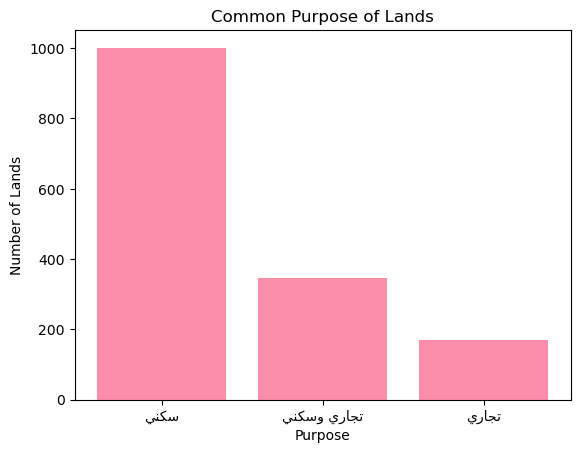

In [1103]:
# we can see that the most common purpose in the dataset is residential purpose
plt.bar(category_counts.index,
        category_counts.values,
        color=('#fc8eac')
       )
plt.title('Common Purpose of Lands')
plt.xlabel('Purpose')
plt.ylabel('Number of Lands')
# plt.grid()
plt.show
plt.savefig('Q3.png')

In [1053]:
lands_commer_resi['Purpose'] = lands_commer_resi['Purpose'].apply(arabic_text) 

C:\Users\almal\AppData\Local\Temp\ipykernel_6968\618491738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lands_commer_resi['Purpose'] = lands_commer_resi['Purpose'].apply(arabic_text)


In [1067]:
# Q4) What are the average prices of lands intended for investment purposes?
# 
commer_resi = lands_commer_resi[lands_commer_resi['Purpose'] == 'تجاري وسكني']
commer = lands_commer_resi[lands_commer_resi['Purpose'] == 'تجاري']

In [1069]:
commer.shape

(169, 7)

In [1037]:
#To have the same number for each category
commer_resi = commer_resi.head(169)
commer_resi.shape

(169, 7)

In [1041]:
commer_resi['Total_Price'].mean()

3808917.3905325443

In [1071]:
commer['Total_Price'].mean()

5211987.8284023665

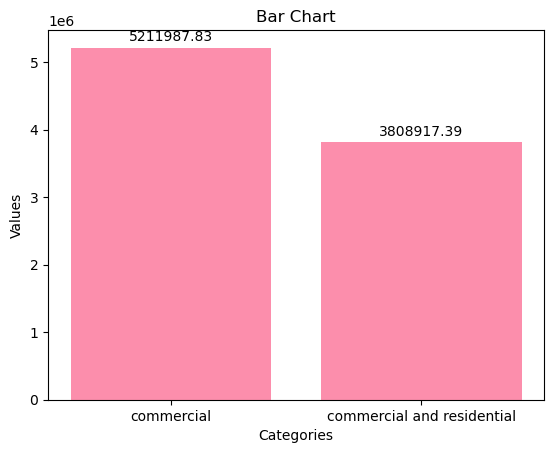

In [1073]:
values = ["commercial", "commercial and residential"]
average = [5211987.8284023665, 3808917.3905325443] 

plt.bar(values, average, 
       color=('#fc8eac'))
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart')
for i, v in enumerate(average):
    plt.text(i, v + 100000, str(round(v, 2)), ha='center')
plt.show()

## Streamlit charts: 'not all of them'

In [1075]:
top5_apt = df_apartments_no_miss_neighborhood[df_apartments_no_miss_neighborhood['Neighborhood'] != 'unknown']

In [1077]:
top5_apt['Neighborhood'] = top5_apt['Neighborhood'].apply(arabic_text) 

C:\Users\almal\AppData\Local\Temp\ipykernel_6968\961541473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_apt['Neighborhood'] = top5_apt['Neighborhood'].apply(arabic_text)


In [1079]:
Top_apt = top5_apt.nlargest(10, 'Total_Price')
Top_apt

Neighborhood  Bedrooms  Living_Rooms  Baths  Area Kitchen  \
65                   ﺎﻴﻠﻌﻟﺍ ﻲﺣ         4           2.0      5   217       1   
16                   ﻞﻴﺨﻨﻟﺍ ﻲﺣ         2           1.0      3   140       0   
137                  ﻞﻴﺨﻨﻟﺍ ﻲﺣ         2           1.0      3   140       0   
534  ﻲﻟﻭﺪﻟﺍ ﺪﻟﺎﺧ ﻚﻠﻤﻟﺍ ﺭﺎﻄﻣ ﻲﺣ         4           2.0      3   180       1   
47                  ﺔﻓﺎﺤﺼﻟﺍ ﻲﺣ         3           1.0      3   143       0   
524                  ﺎﻴﻠﻌﻟﺍ ﻲﺣ         1           1.0      2    92       1   
21                  ﺔﻓﺎﺤﺼﻟﺍ ﻲﺣ         2           1.0      3   142       1   
199                 ﺔﻓﺎﺤﺼﻟﺍ ﻲﺣ         2           1.0      3   142       1   
291                 ﺔﻓﺎﺤﺼﻟﺍ ﻲﺣ         2           1.0      3   142       1   
24                 ﻥﺍﻭﺮﻴﻘﻟﺍ ﻲﺣ         3           2.0      3   228       1   

    Car_Entrance Elevator  Age furnished  Total_Price  
65             1        1    5         1      3500000  
16             1        1    0         0      3300000  
137            1        1    0         0      3300000  
534            1        0    0         0      2900000  
47             0        0    9         1      2630000  
524            1        1   11         1      2100000  
21             1        1    7         0      1980000  
199            1        1    7         0      1980000  
291            1        1    7         0      1980000  
24             1        1    0         1      1850000

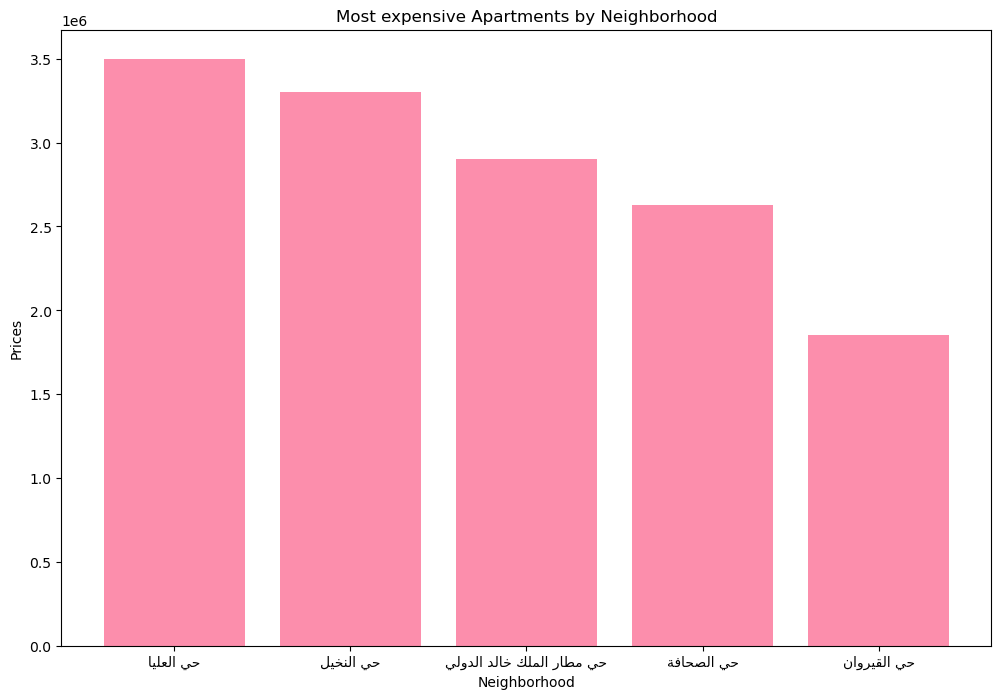

In [1081]:
plt.figure(figsize=(12, 8))
plt.bar(Top_apt['Neighborhood'], 
        Top_apt['Total_Price'],
        color=('#fc8eac')
       )

plt.xlabel('Neighborhood')
plt.ylabel('Prices')
plt.title('Most expensive Apartments by Neighborhood')

#plt.grid()

plt.show
plt.savefig('st02.png')

In [1083]:
bottom_apt = df_apartments_no_miss_neighborhood[df_apartments_no_miss_neighborhood['Neighborhood'] != 'unknown']

In [1085]:
bottom_apt['Neighborhood'] = bottom_apt['Neighborhood'].apply(arabic_text) 

C:\Users\almal\AppData\Local\Temp\ipykernel_6968\3655791938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_apt['Neighborhood'] = bottom_apt['Neighborhood'].apply(arabic_text)


In [1087]:
bot_apt = bottom_apt.nsmallest(10, 'Total_Price')
bot_apt

Neighborhood  Bedrooms  Living_Rooms  Baths  Area Kitchen Car_Entrance  \
193    ﻖﻴﻘﻌﻟﺍ ﻲﺣ         3           1.0      3   162       1            1   
260    ﻖﻴﻘﻌﻟﺍ ﻲﺣ         3           1.0      3   162       1            1   
374    ﻖﻴﻘﻌﻟﺍ ﻲﺣ         3           1.0      3   162       1            1   
488    ﻖﻴﻘﻌﻟﺍ ﻲﺣ         3           2.0      3   123       1            0   
114      ﻦﻴﻄﺣ ﻲﺣ         2           2.0      2   104       1            1   
83       ﻦﻴﻄﺣ ﻲﺣ         3           1.0      2   104       1            1   
520  ﻦﻴﻤﺳﺎﻴﻟﺍ ﻲﺣ         2           1.0      2   100       1            1   
102    ﻒﻴﺼﻤﻟﺍ ﻲﺣ         3           1.0      2   107       1            1   
115    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         2           1.0      3    61       1            0   
183    ﺽﺭﺎﻌﻟﺍ ﻲﺣ         4           1.0      3   138       1            0   

    Elevator  Age furnished  Total_Price  
193        1    0         0       700000  
260        1    0         0       700000  
374        1    0         0       700000  
488        1   11         0       700000  
114        1    0         0       715000  
83         1    0         0       745000  
520        0    2         0       745000  
102        1    7         0       750000  
115        0    0         0       750000  
183        0    3         0       750000

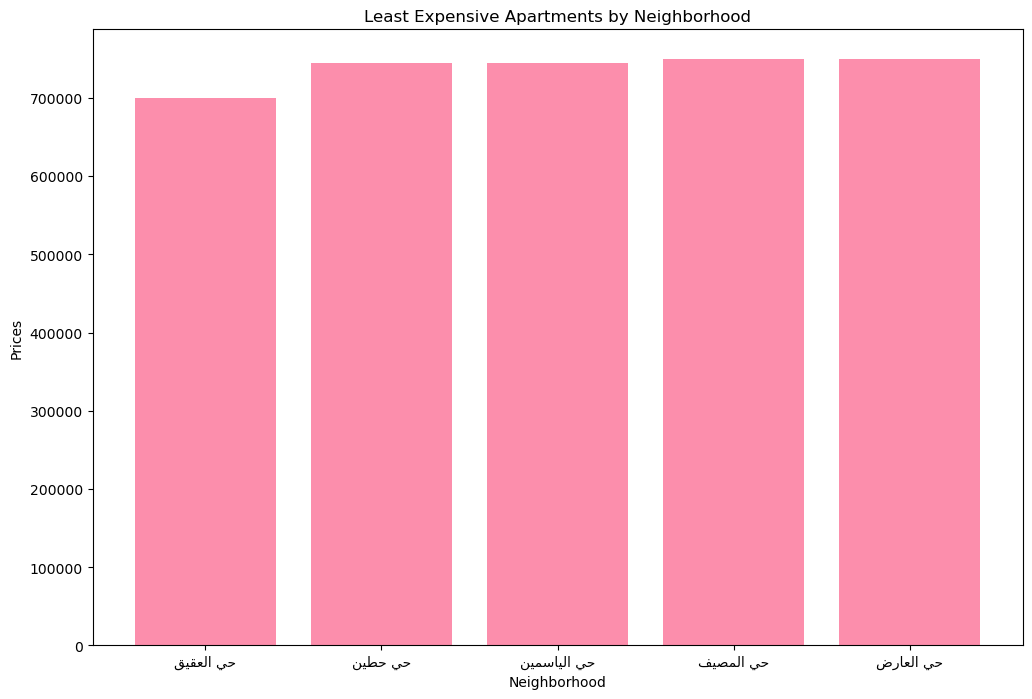

In [1089]:
plt.figure(figsize=(12, 8))
plt.bar(bot_apt['Neighborhood'], 
        bot_apt['Total_Price'],
        color=('#fc8eac')
       )

plt.xlabel('Neighborhood')
plt.ylabel('Prices')
plt.title('Least Expensive Apartments by Neighborhood')

#plt.grid()

plt.show
plt.savefig('st12.png')

In [1091]:
df_apartments_with_miss_neighborhood['Neighborhood'] = df_apartments_with_miss_neighborhood['Neighborhood'].apply(arabic_text) 

In [1093]:
price_by_neighborhood = df_apartments_with_miss_neighborhood.groupby('Neighborhood')['Total_Price'].mean()

In [1095]:
price_by_neighborhood_sorted = price_by_neighborhood.sort_values(ascending=False)


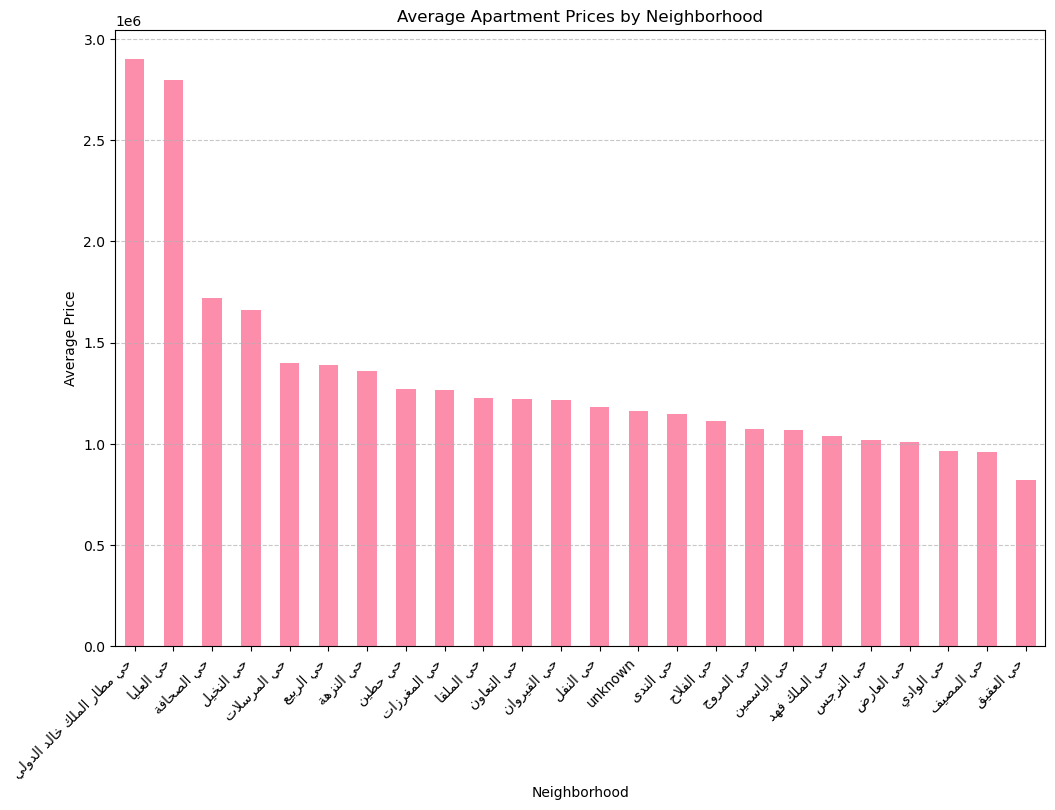

<Figure size 640x480 with 0 Axes>

In [1097]:
plt.figure(figsize=(12, 8))
price_by_neighborhood_sorted.plot(kind='bar', color='#fc8eac')
plt.title('Average Apartment Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.savefig('Q1.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e3231f8-d4a5-459d-9a0c-75042b7acdab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>